rowid  sy_snum  sy_pnum  cb_flag  disc_year  rv_flag  pul_flag  ptv_flag  \
0      1        2        1        0       2007        1         0         0   
1      2        1        1        0       2009        1         0         0   
2      3        1        1        0       2008        1         0         0   
3      4        1        2        0       2002        1         0         0   
4      5        3        1        0       1996        1         0         0   

   tran_flag  ast_flag  ...  sy_kepmag  sy_kepmagerr1  sy_kepmagerr2  \
0          0         0  ...        NaN            NaN            NaN   
1          0         0  ...        NaN            NaN            NaN   
2          0         0  ...        NaN            NaN            NaN   
3          0         0  ...        NaN            NaN            NaN   
4          0         0  ...      6.095            NaN            NaN   

   pl_nnotes  st_nphot  st_nrvc  st_nspec  pl_nespec  pl_ntranspec  pl_ndispec  
0        2.0         1        2         0          0             0           0  
1        0.0         1        1         0          0             0           0  
2        0.0         1        1         0          0             0           0  
3        0.0         1        4         1          0             0           0  
4        5.0         1        4         3          0             0           0  

[5 rows x 239 columns]

Tamaño del dataframe: (5893, 239)


count         mean          std     min     25%     50%  \
rowid         5893.0  2947.000000  1701.306900     1.0  1474.0  2947.0   
sy_snum       5893.0     1.104870     0.346937     1.0     1.0     1.0   
sy_pnum       5893.0     1.766672     1.150000     1.0     1.0     1.0   
cb_flag       5893.0     0.008315     0.090814     0.0     0.0     0.0   
disc_year     5893.0  2016.625827     4.766830  1992.0  2014.0  2016.0   
...              ...          ...          ...     ...     ...     ...   
st_nrvc       5893.0     0.213474     0.888511     0.0     0.0     0.0   
st_nspec      5893.0     0.184117     0.932483     0.0     0.0     0.0   
pl_nespec     5893.0     0.050399     0.594160     0.0     0.0     0.0   
pl_ntranspec  5893.0     0.104361     1.041307     0.0     0.0     0.0   
pl_ndispec    5893.0     0.008485     0.186790     0.0     0.0     0.0   

                 75%     max  
rowid         4420.0  5893.0  
sy_snum          1.0     4.0  
sy_pnum          2.0     8.0  
cb_flag          0.0     1.0  
disc_year     2021.0  2025.0  
...              ...     ...  
st_nrvc          0.0    12.0  
st_nspec         0.0    13.0  
pl_nespec        0.0    19.0  
pl_ntranspec     0.0    32.0  
pl_ndispec       0.0     6.0  

[239 rows x 8 columns]

rowid  sy_snum  sy_pnum  cb_flag  disc_year  rv_flag  pul_flag  \
0         1        2        1        0       2007        1         0   
1         2        1        1        0       2009        1         0   
2         3        1        1        0       2008        1         0   
3         4        1        2        0       2002        1         0   
4         5        3        1        0       1996        1         0   
...     ...      ...      ...      ...        ...      ...       ...   
5888   5889        2        3        0       1996        1         0   
5889   5890        2        3        0       1999        1         0   
5890   5891        2        3        0       1999        1         0   
5891   5892        1        1        0       2021        1         0   
5892   5893        1        1        0       2007        1         0   

      ptv_flag  tran_flag  ast_flag  
0            0          0         0  
1            0          0         0  
2            0          0         0  
3            0          0         0  
4            0          0         0  
...        ...        ...       ...  
5888         0          0         0  
5889         0          0         0  
5890         0          0         0  
5891         0          0         0  
5892         0          0         0  

[5893 rows x 10 columns]

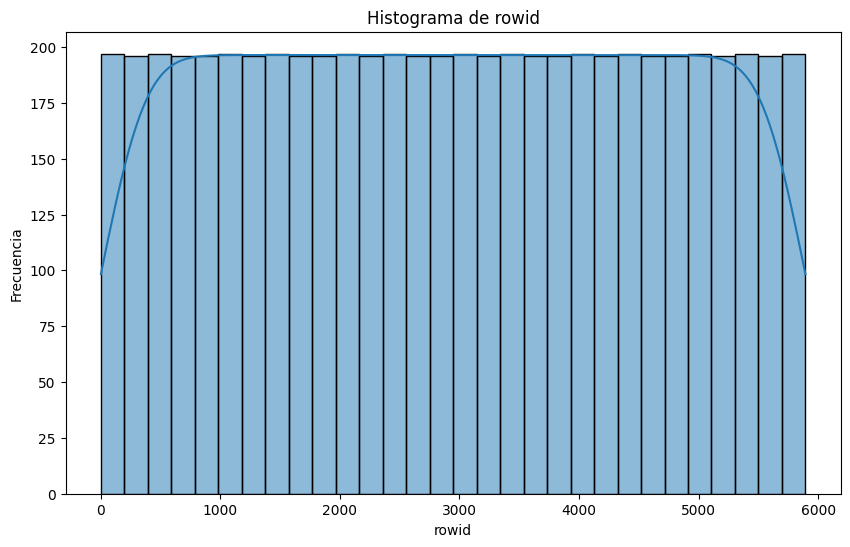

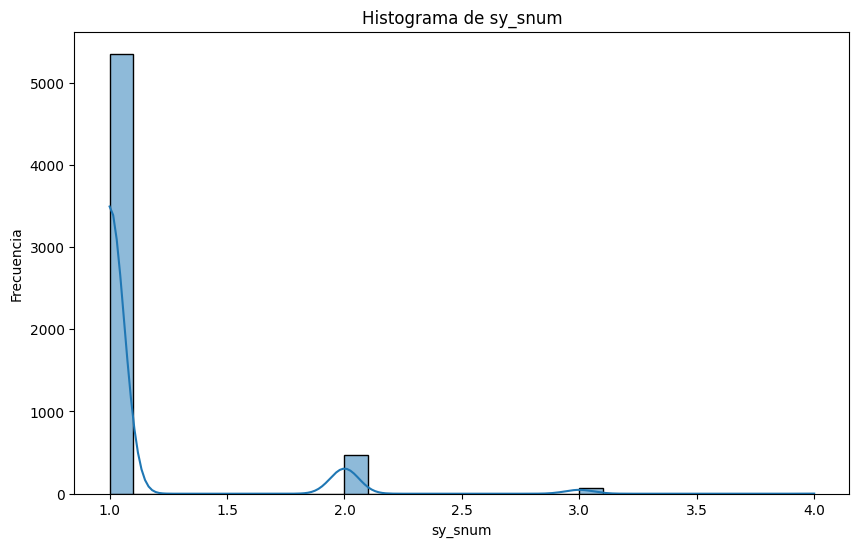

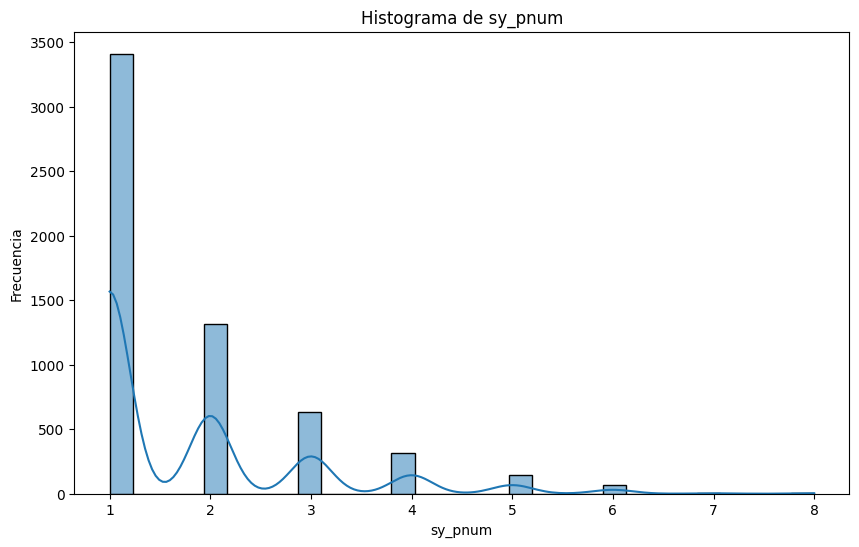

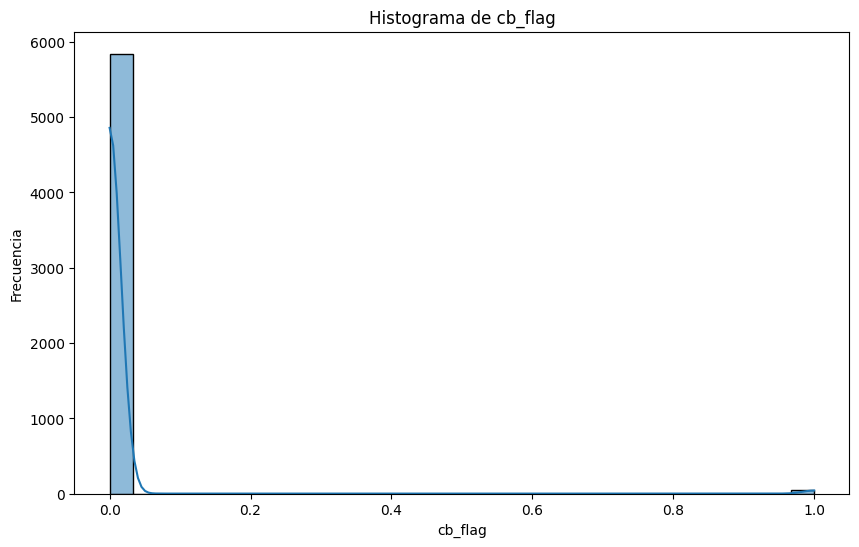

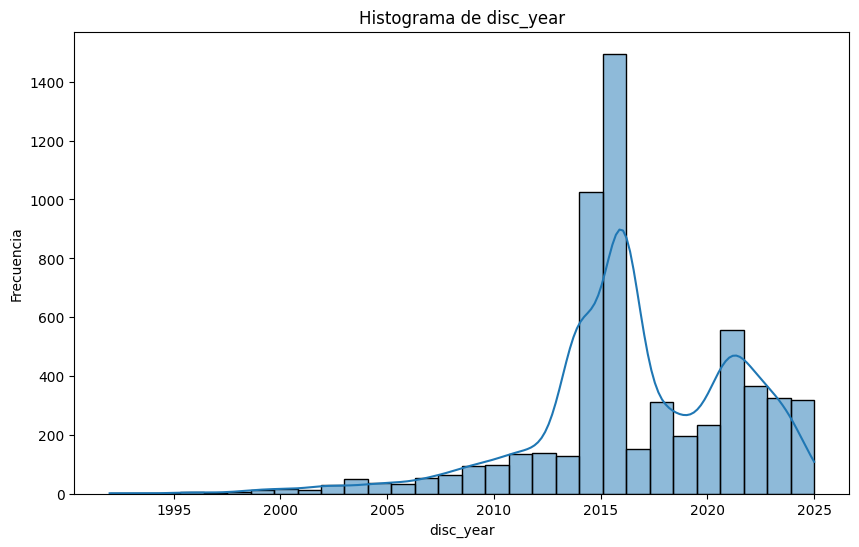

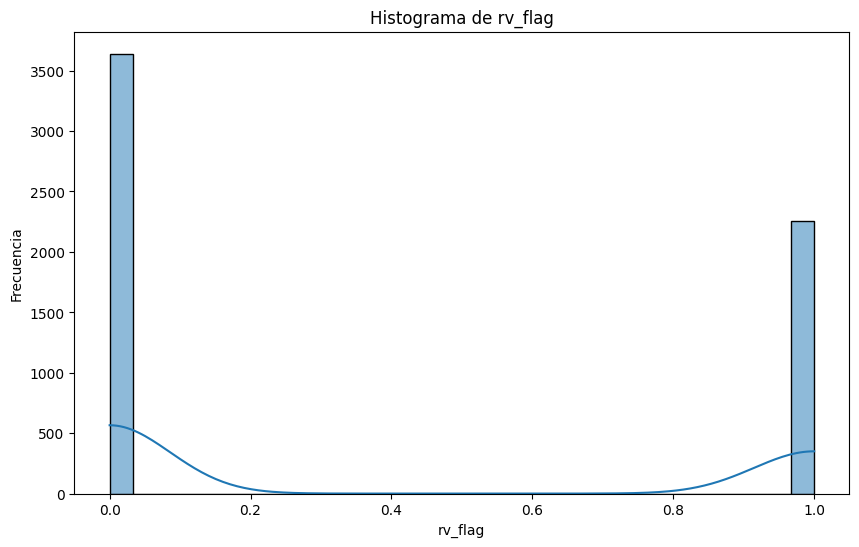

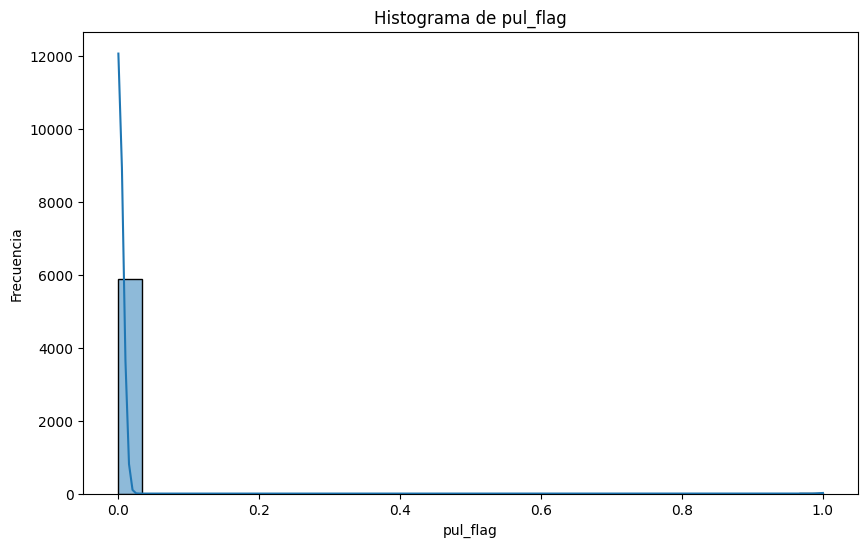

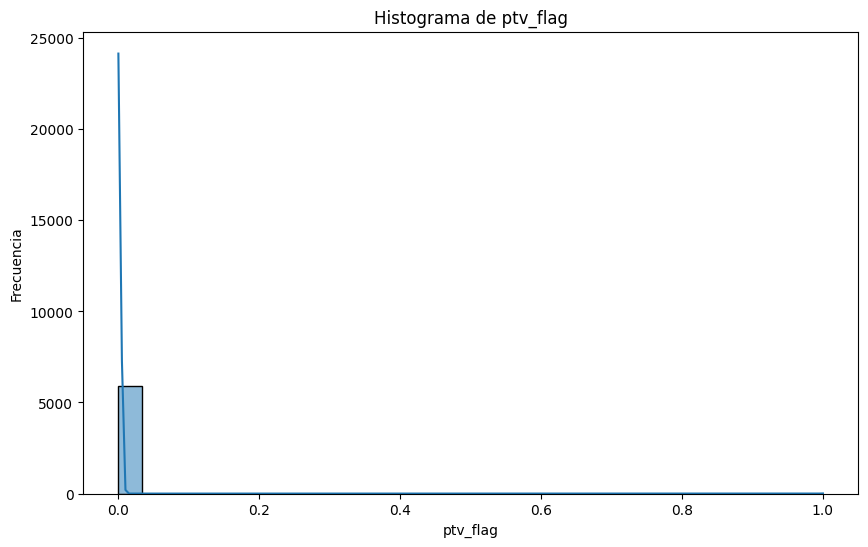

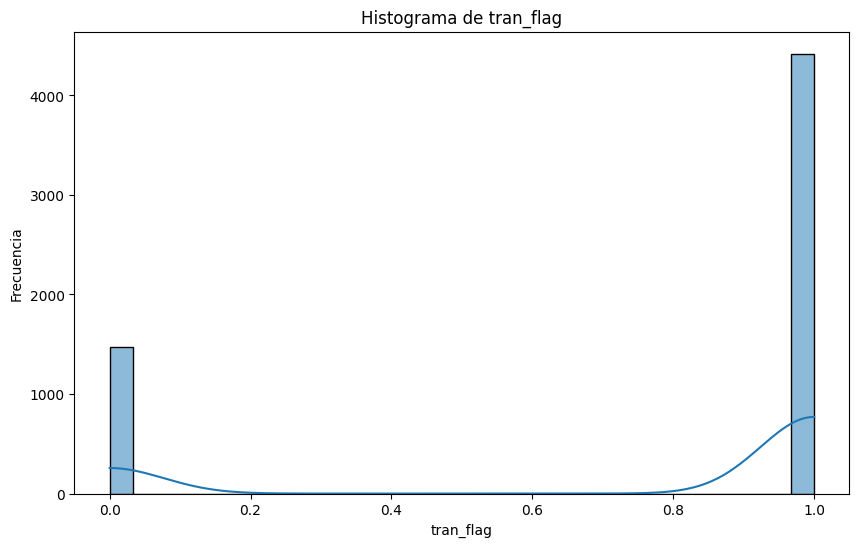

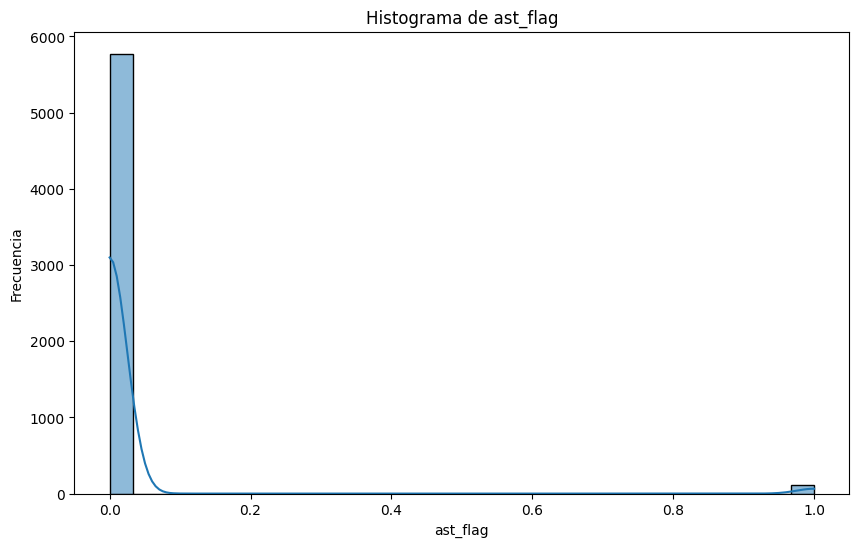

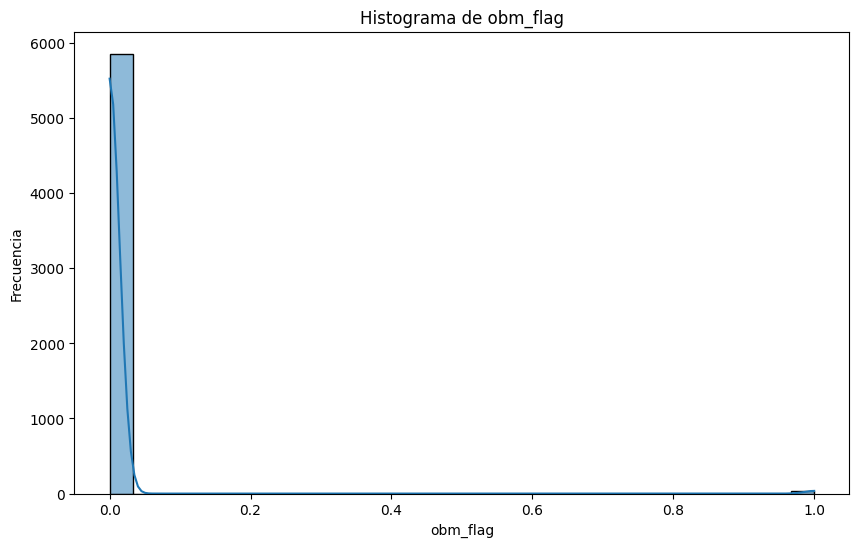

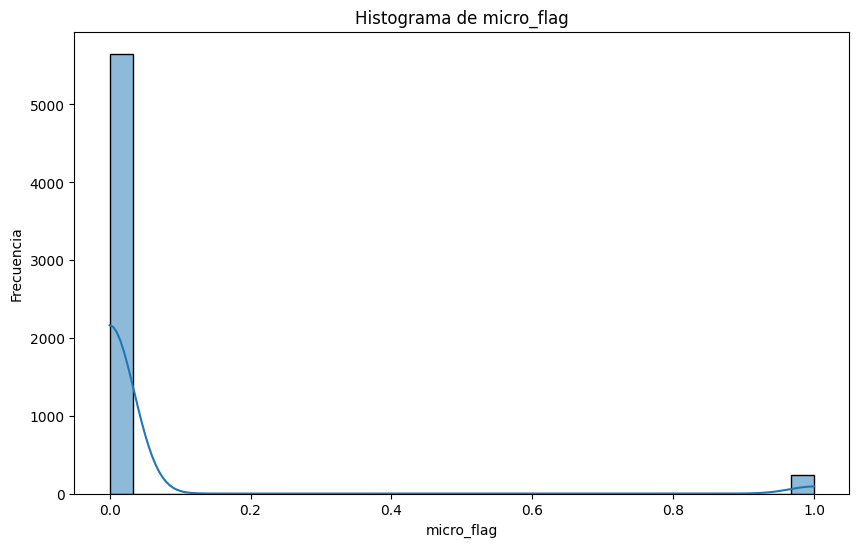

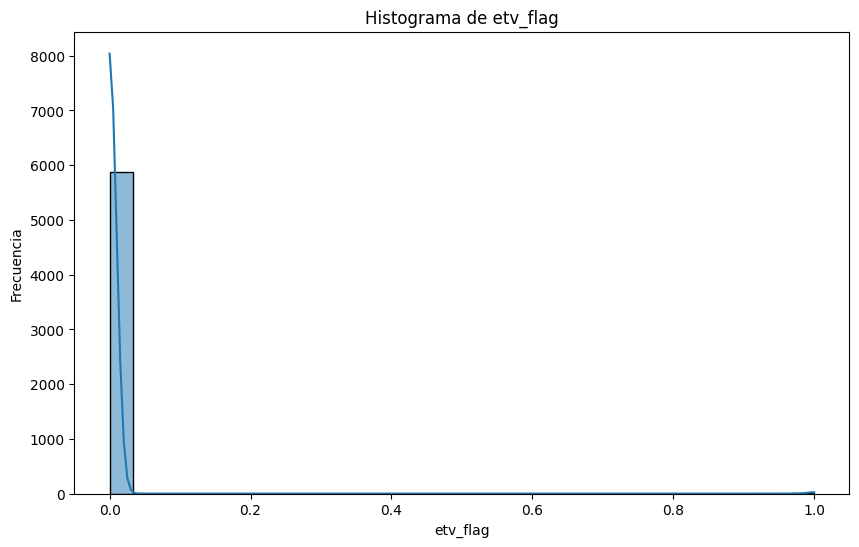

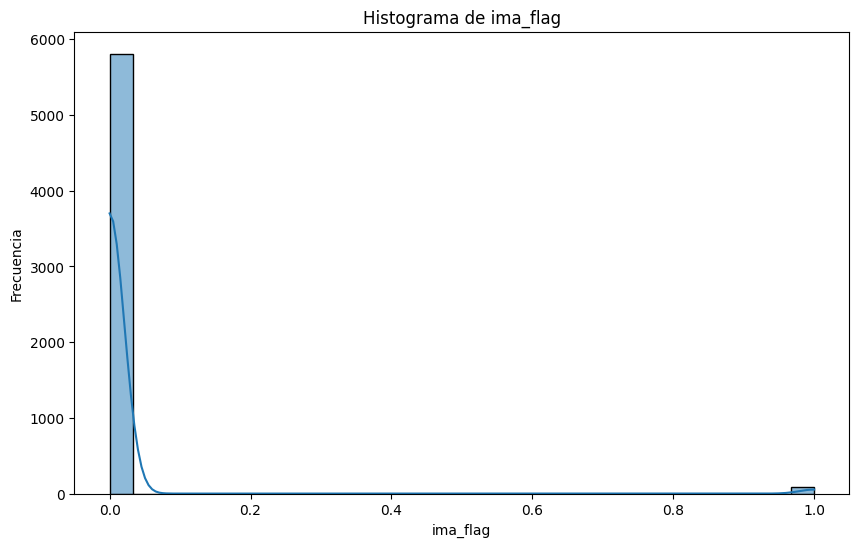

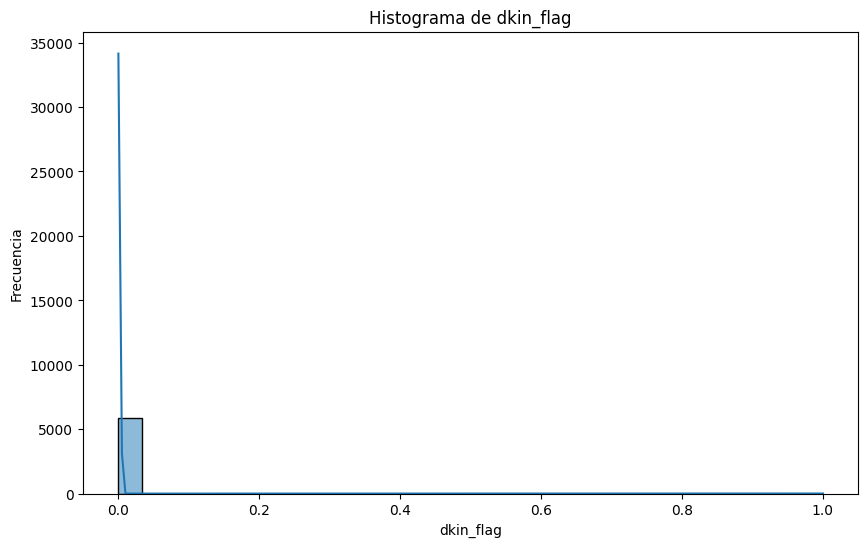

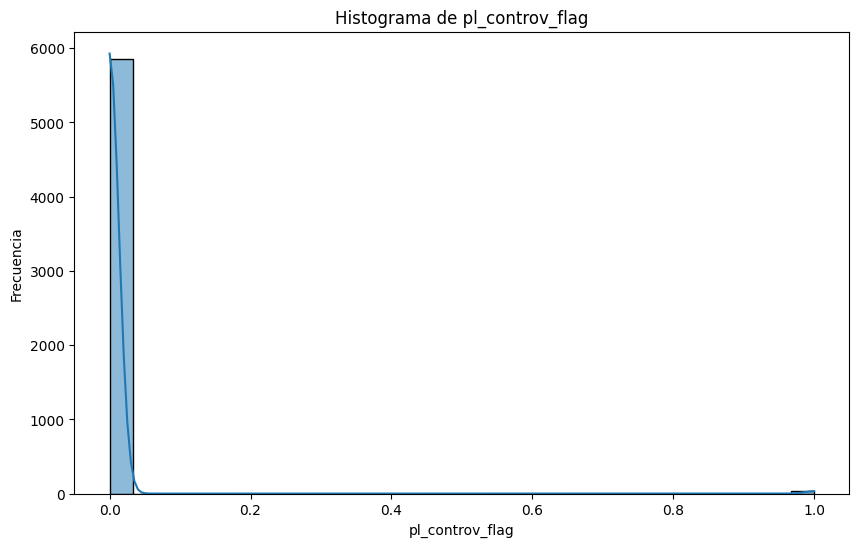

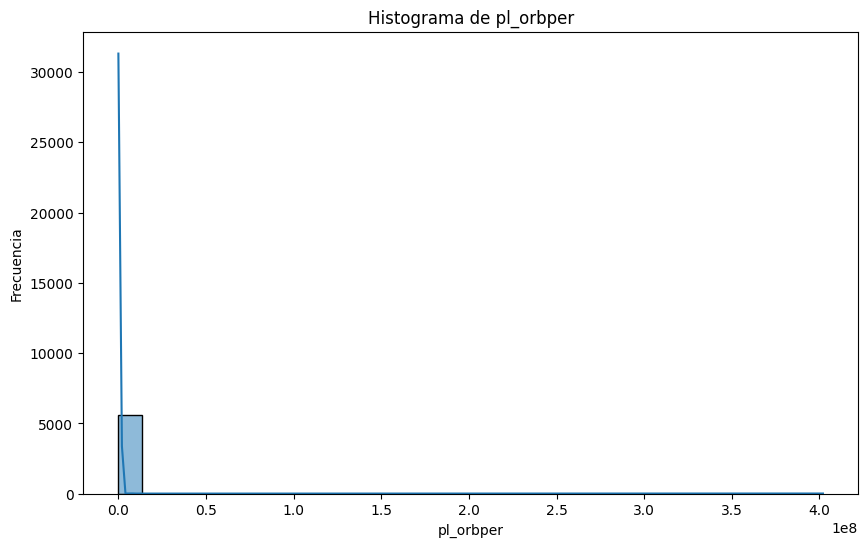

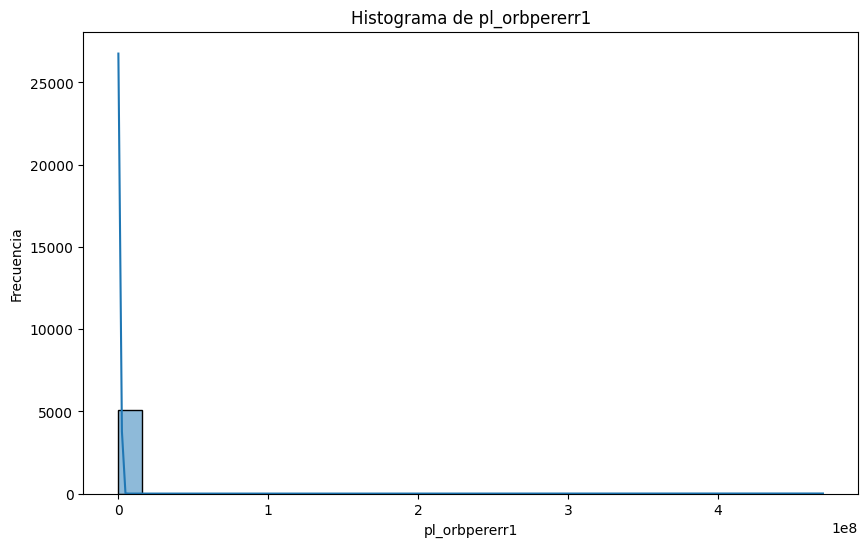

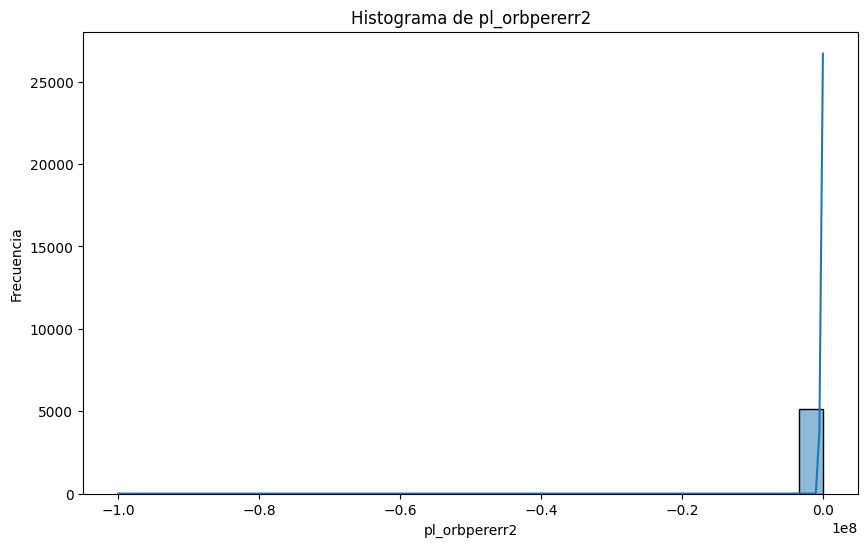

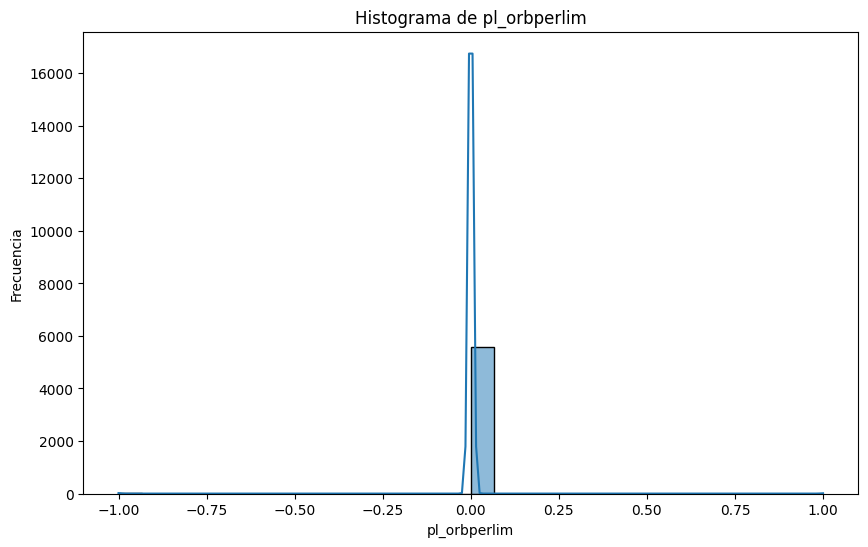

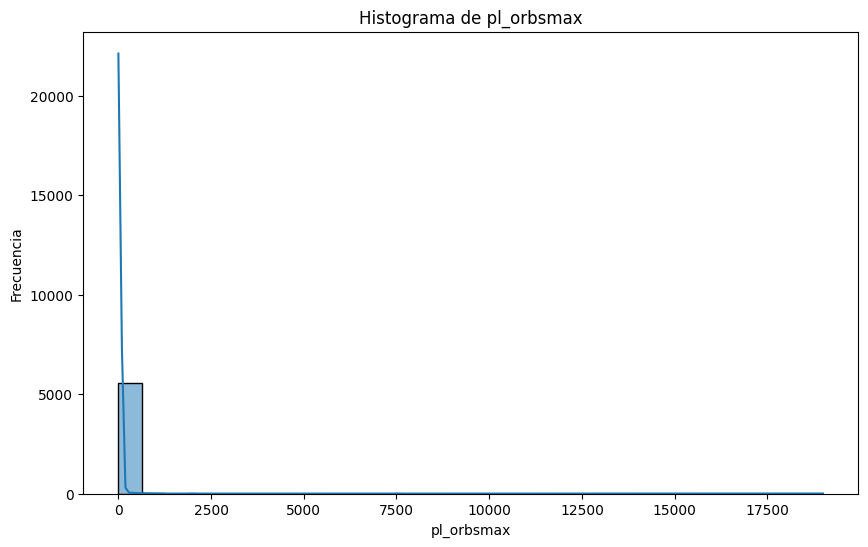

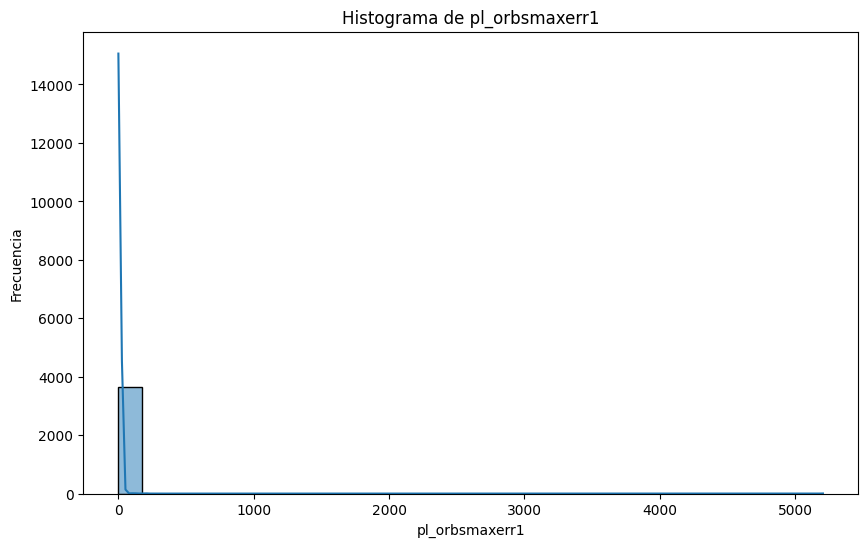

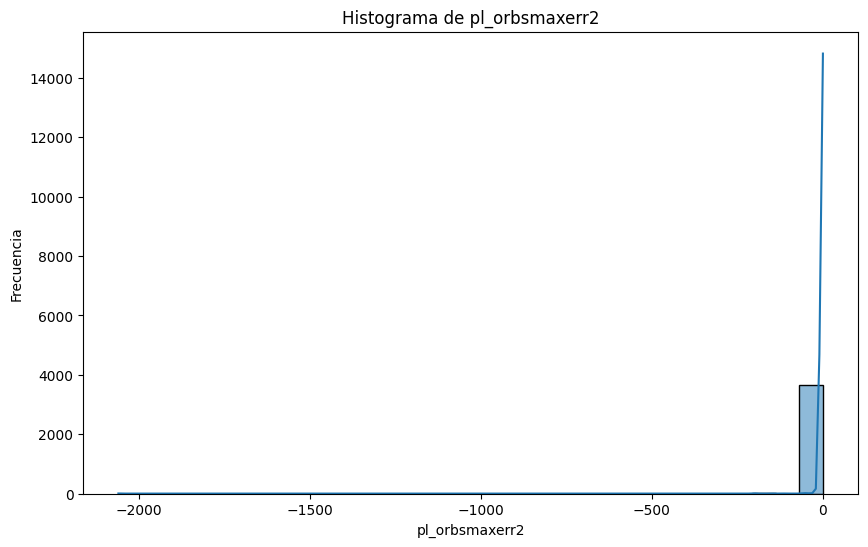

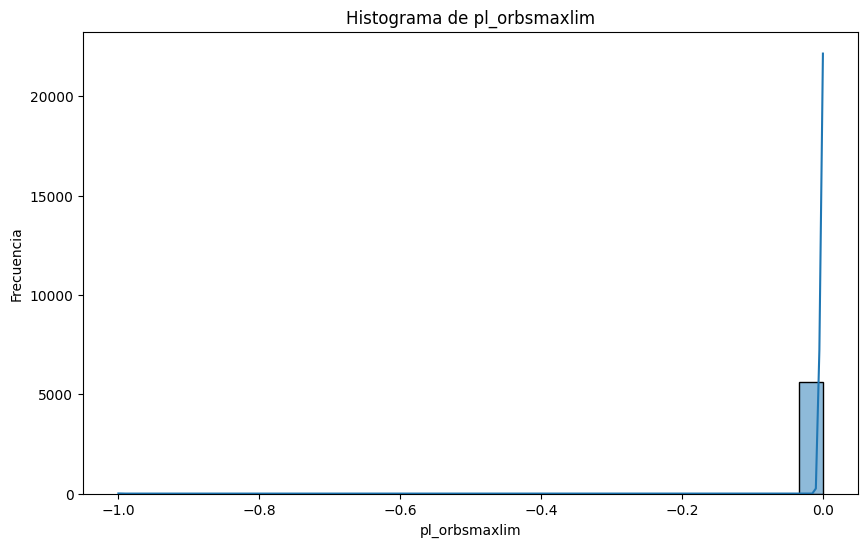

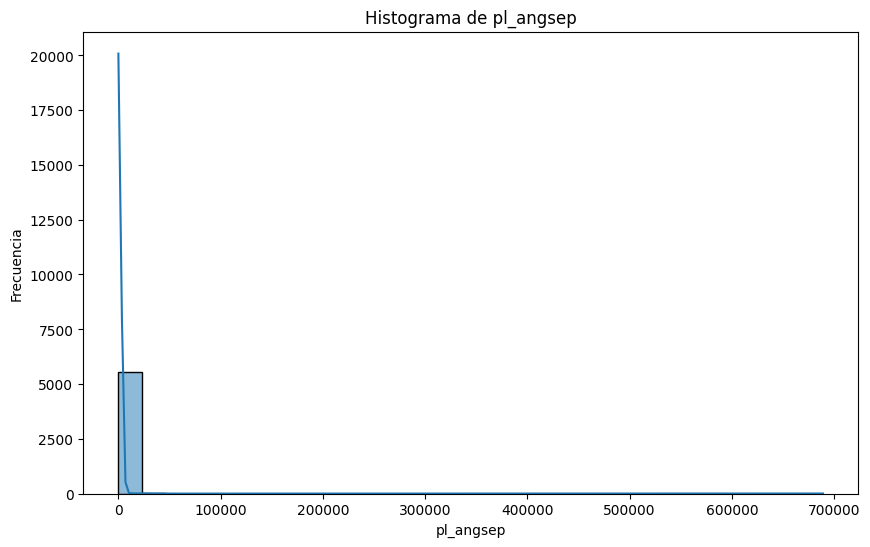

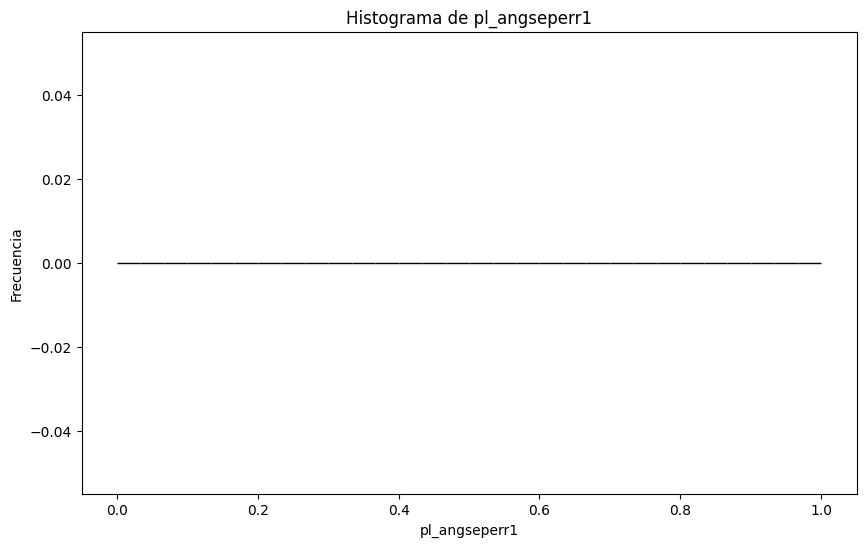

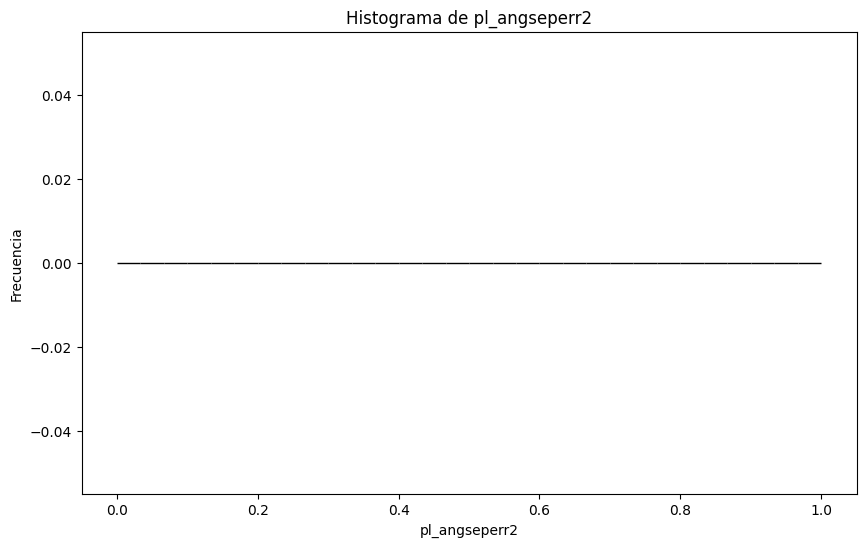

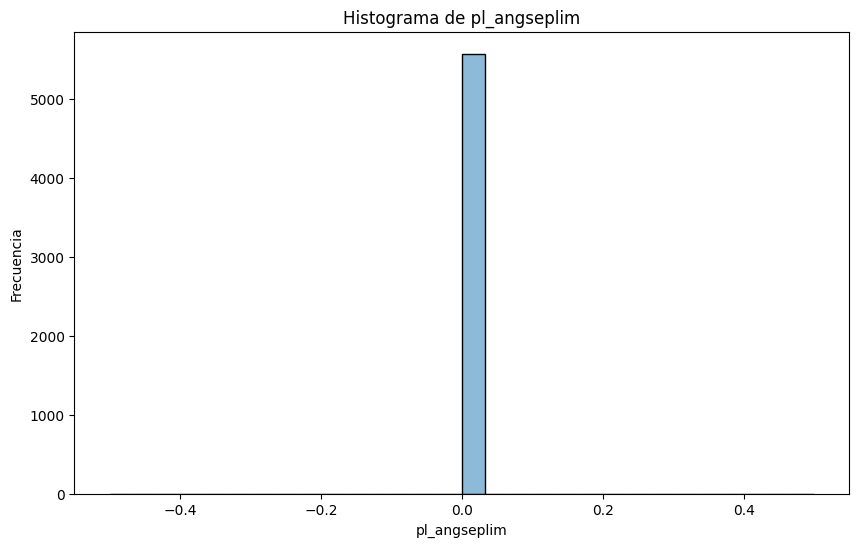

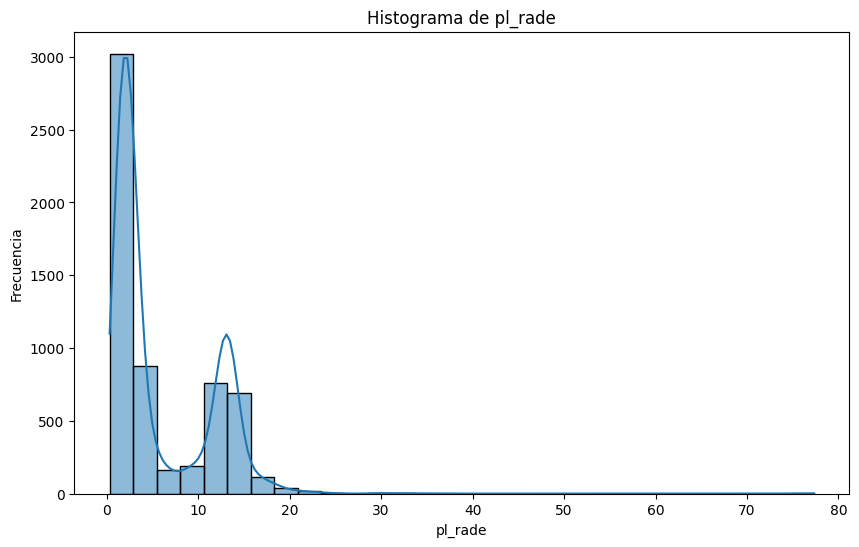

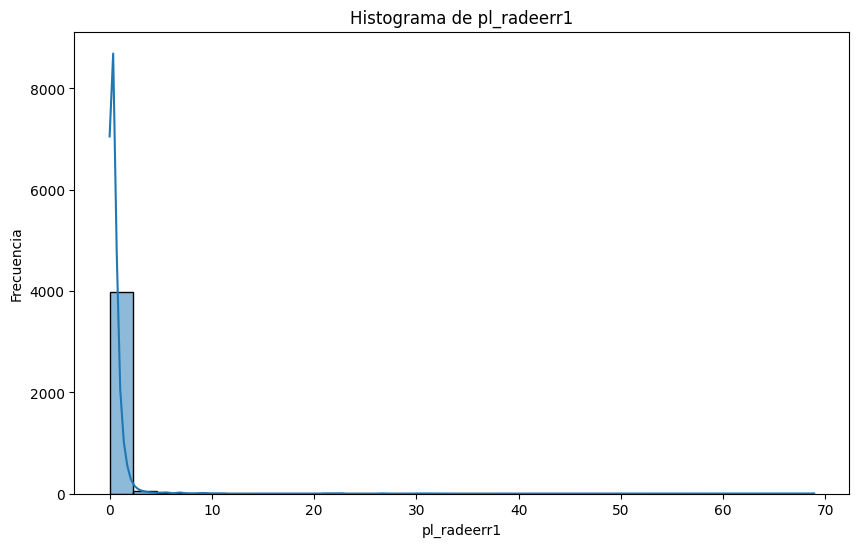

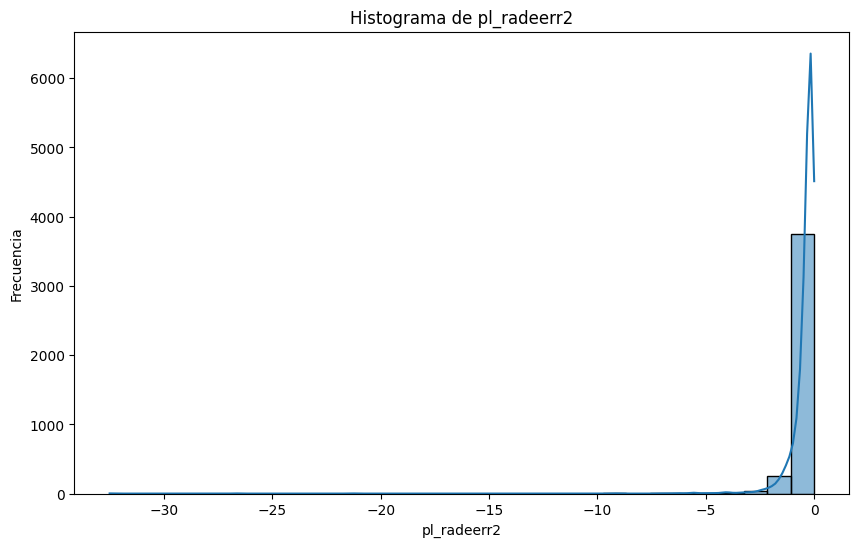

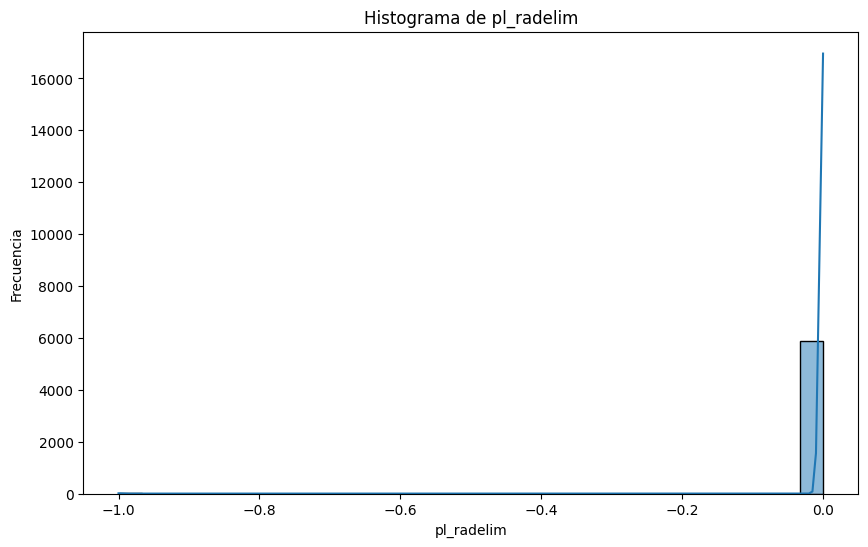

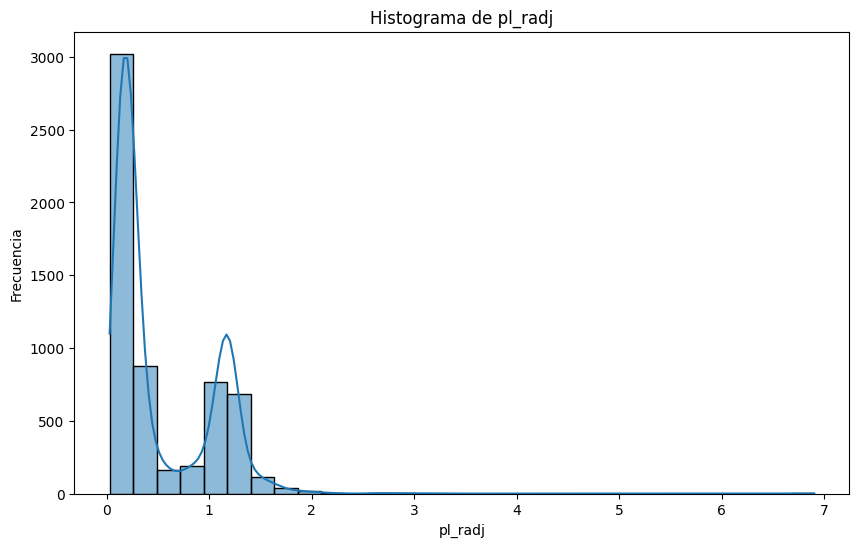

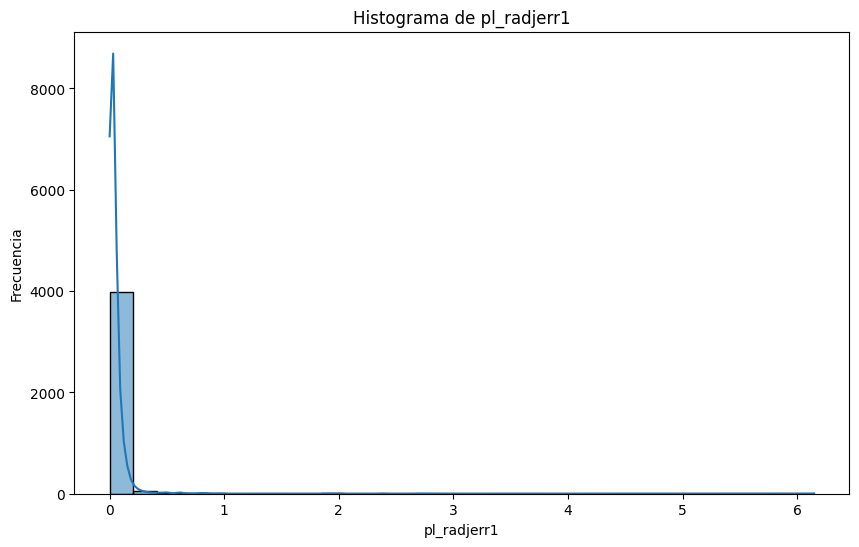

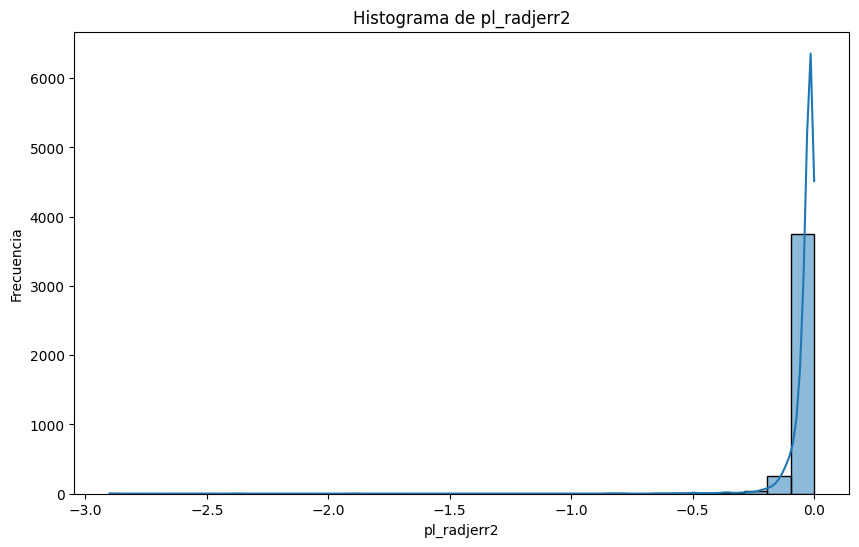

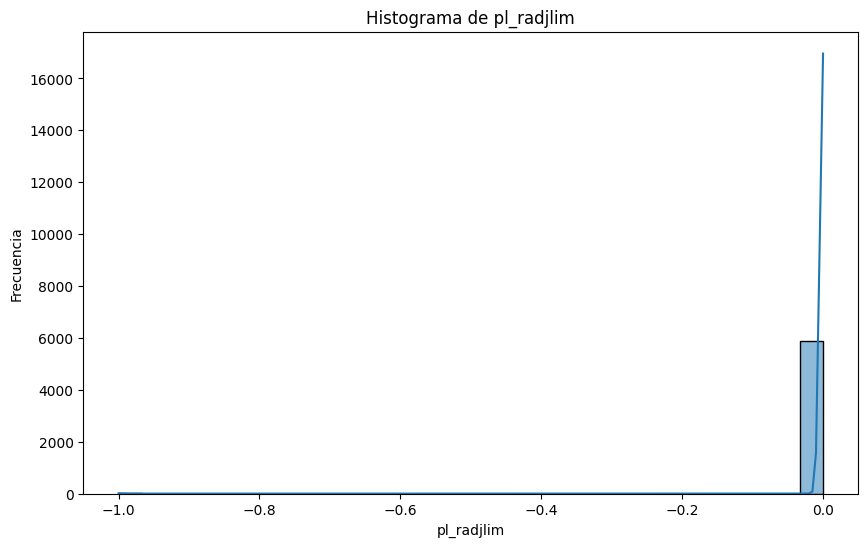

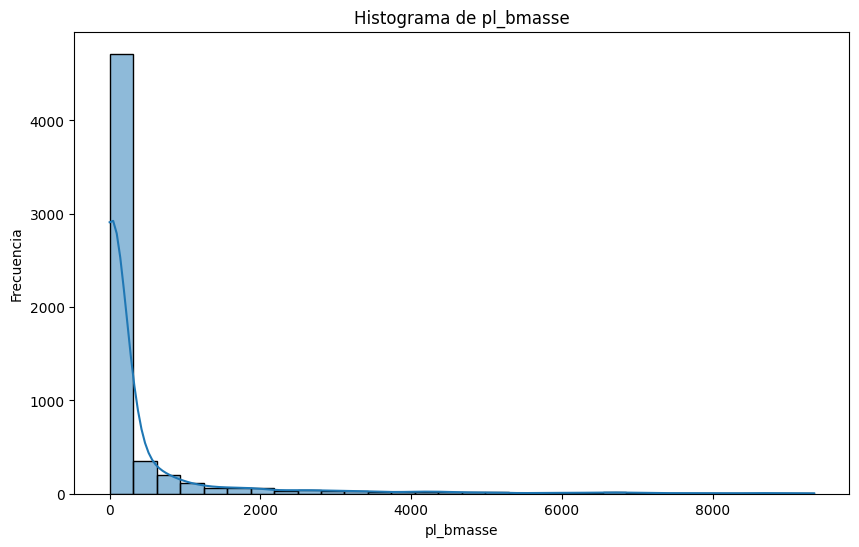

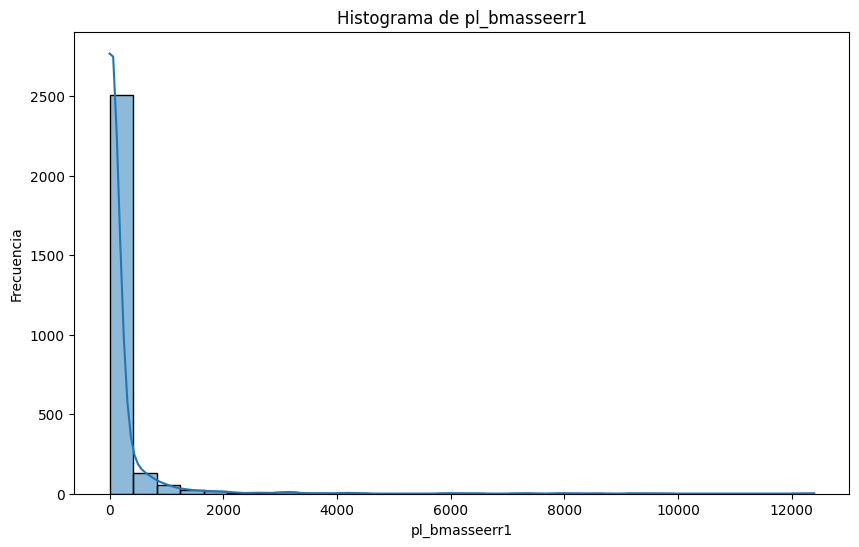

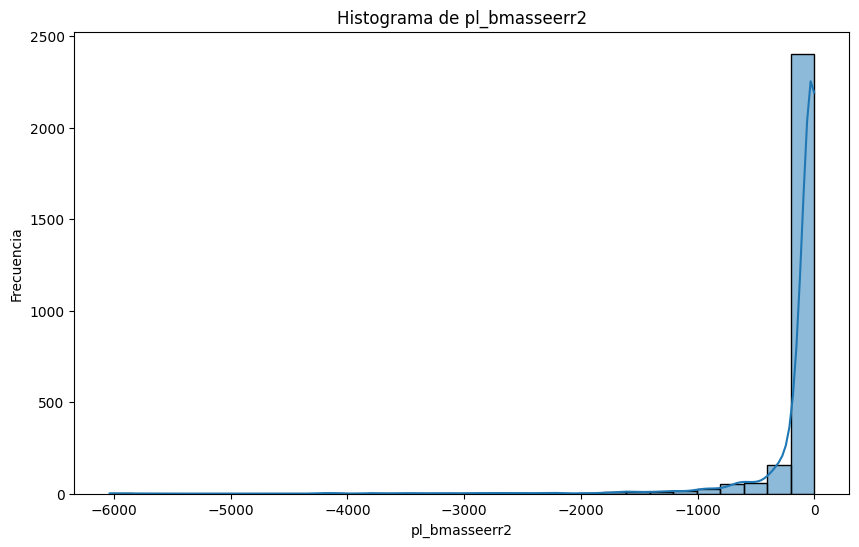

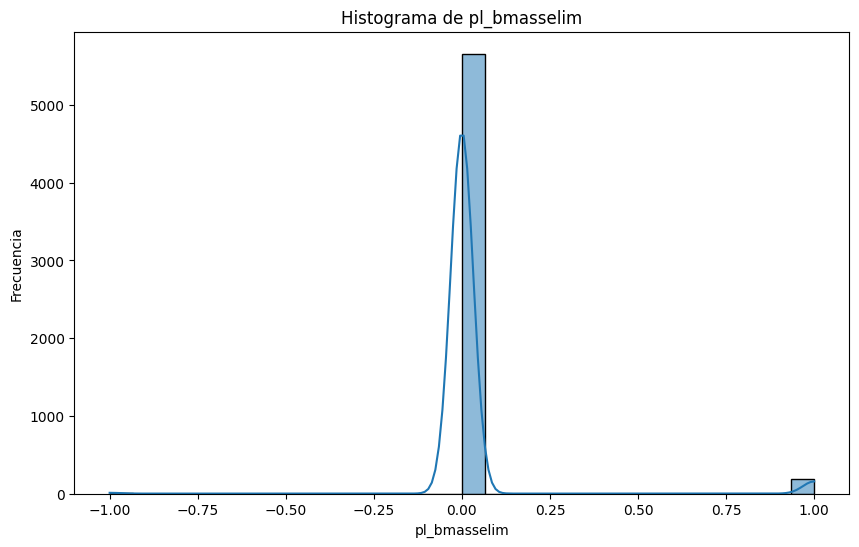

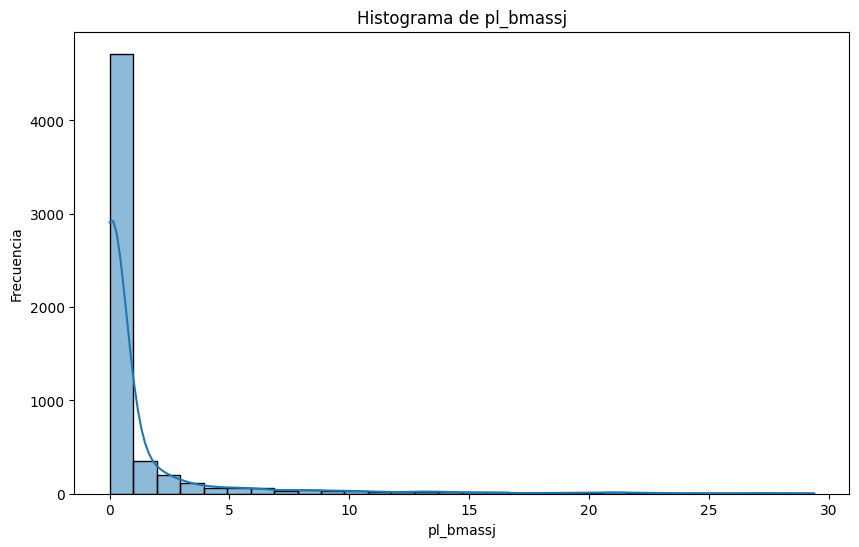

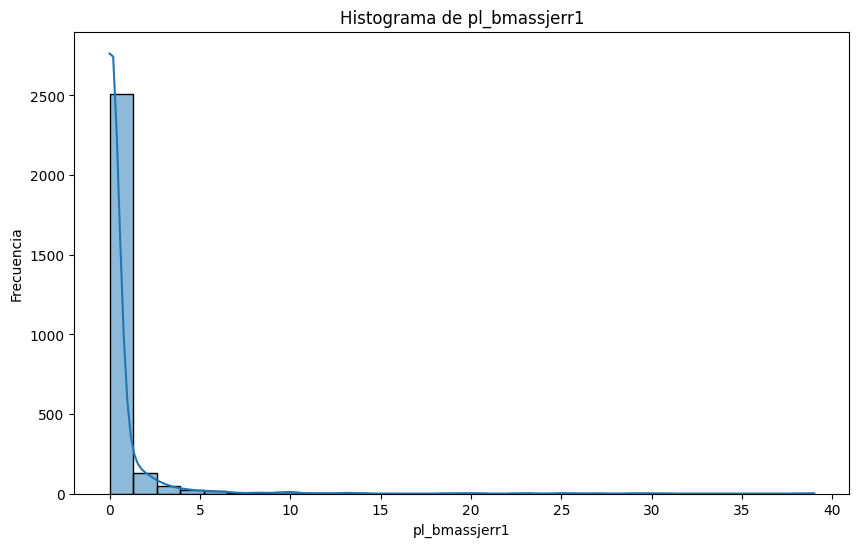

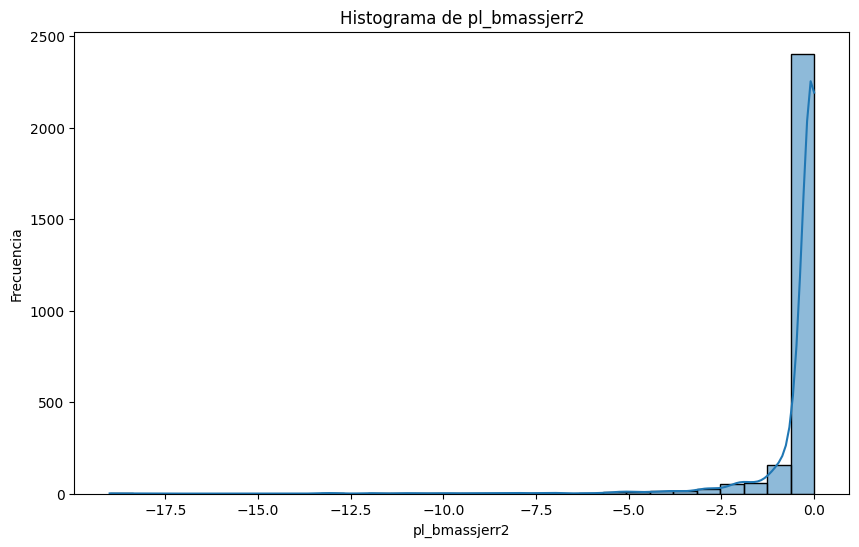

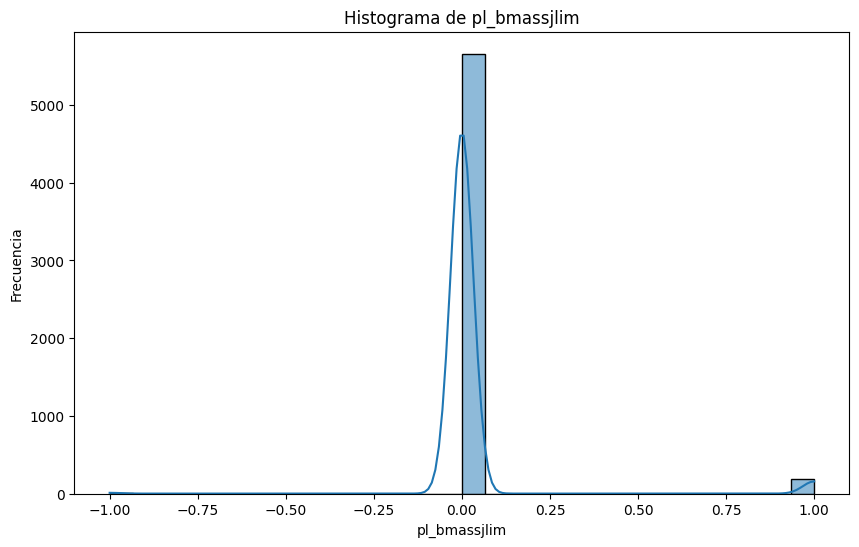

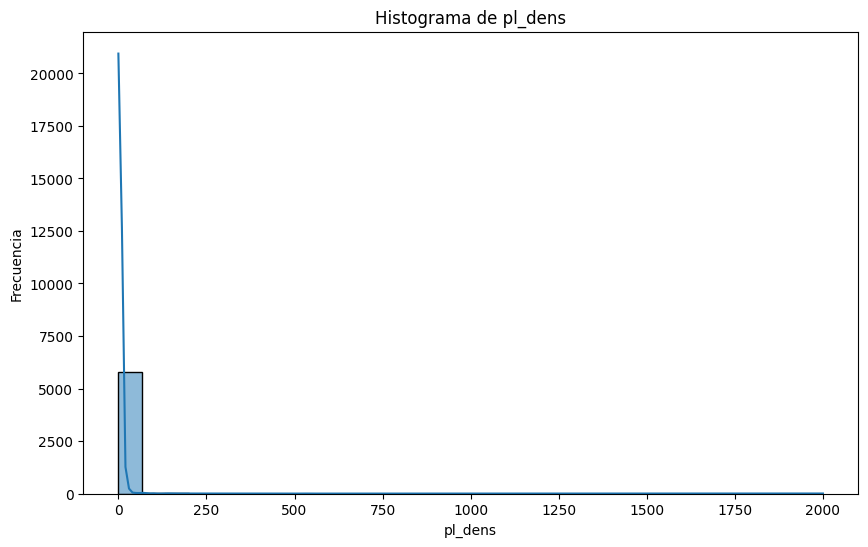

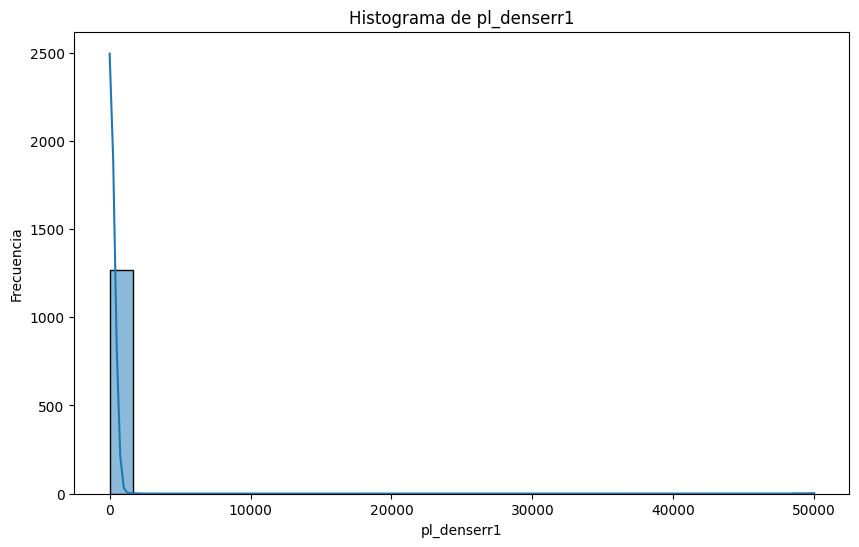

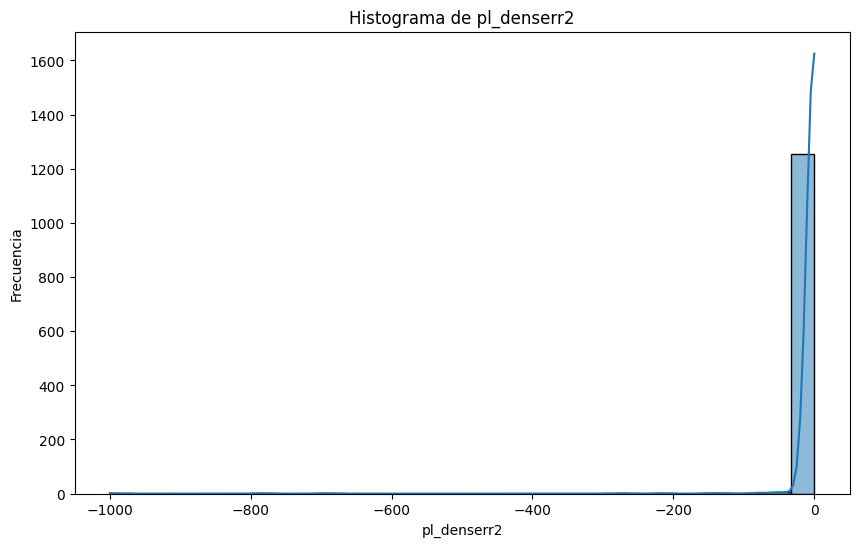

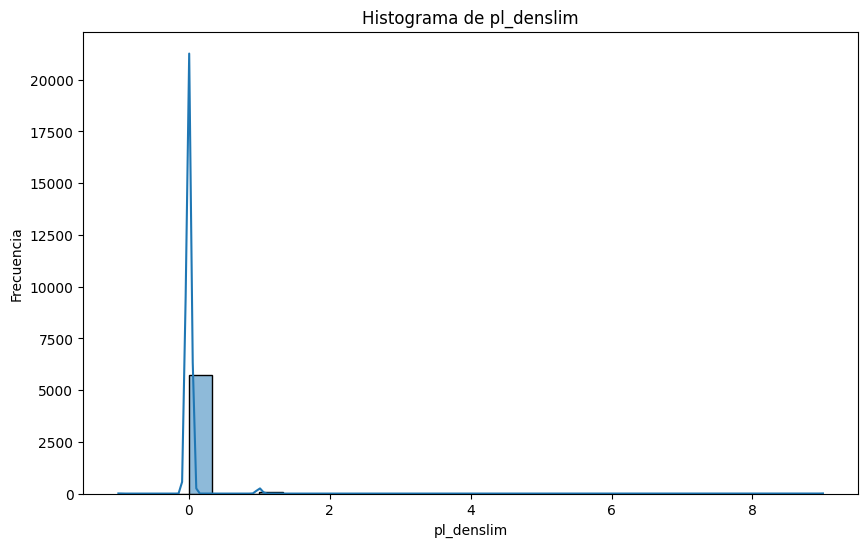

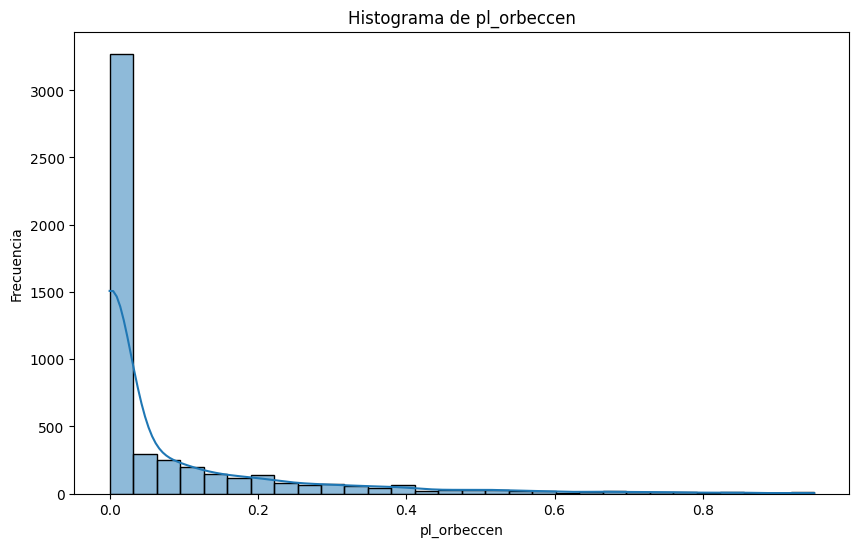

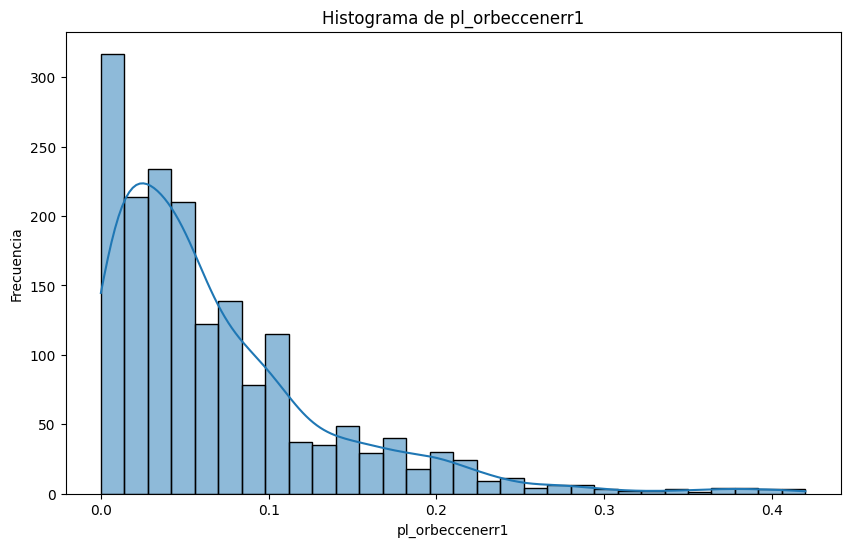

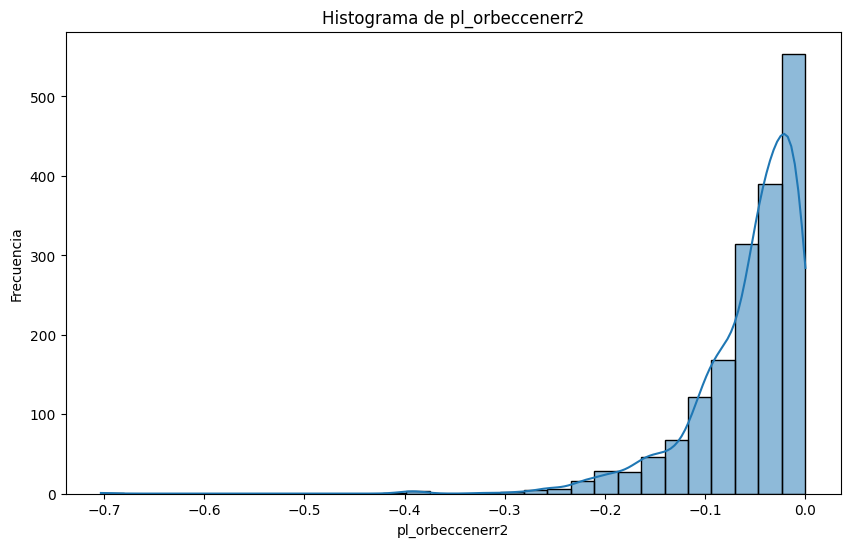

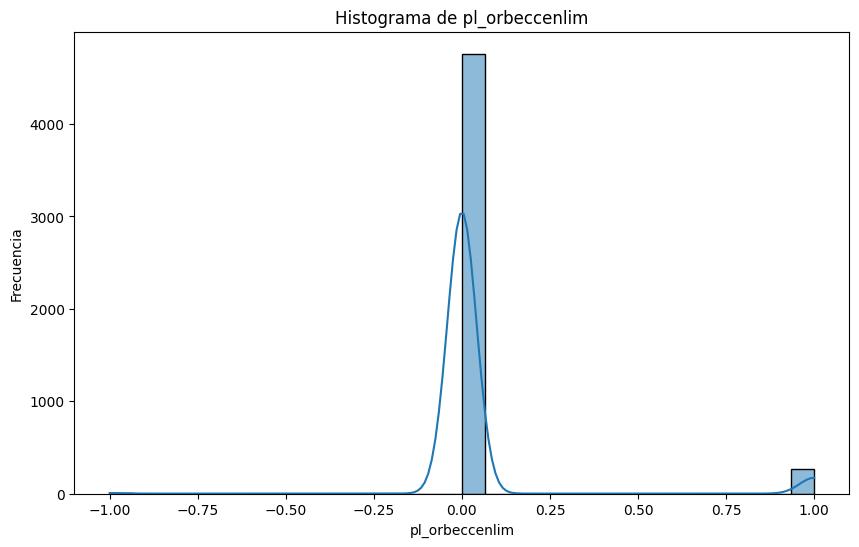

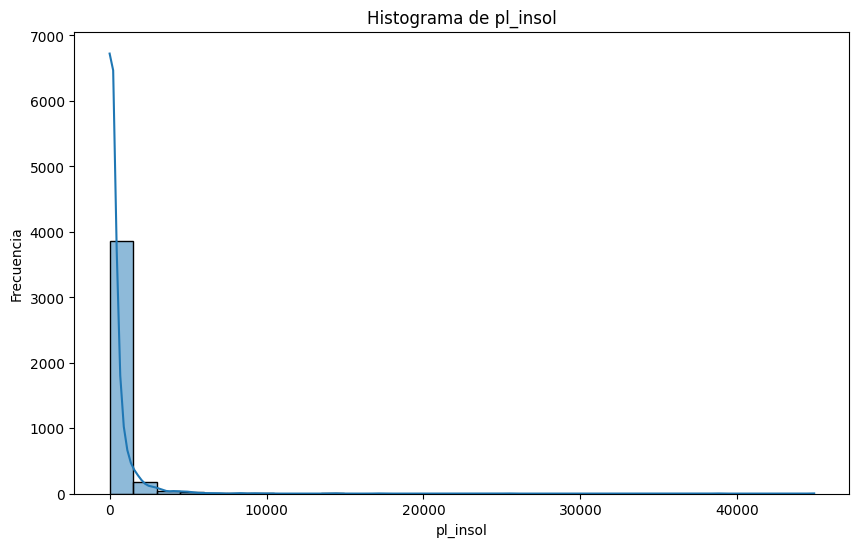

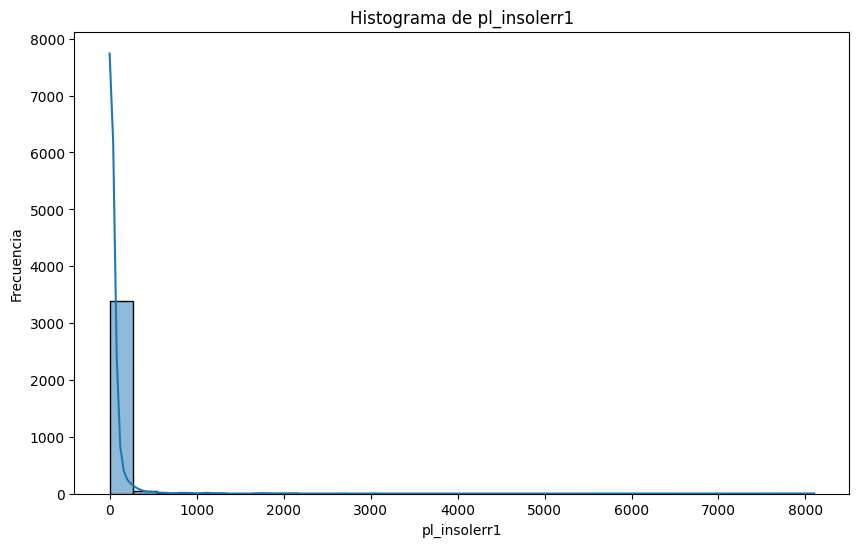

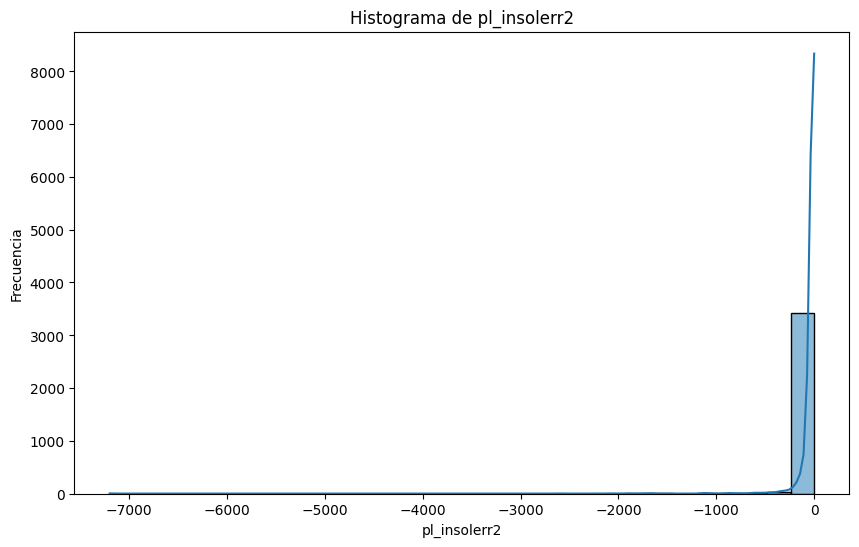

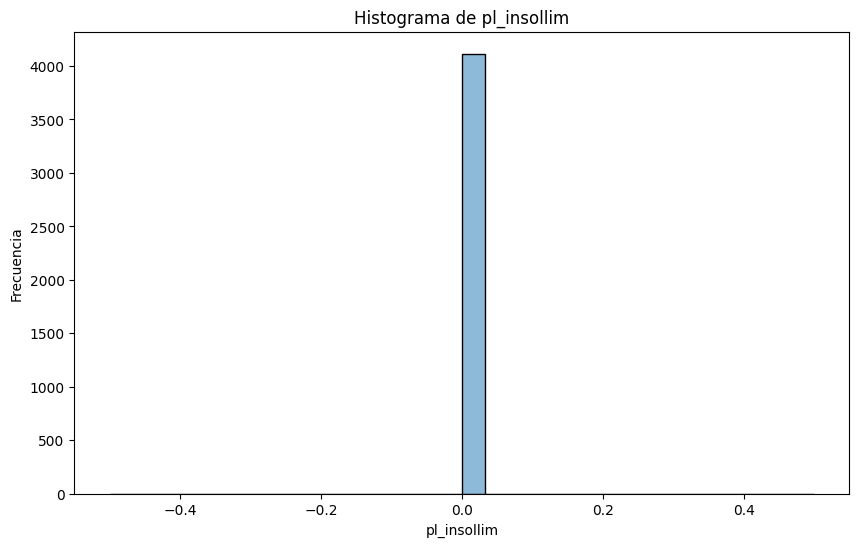

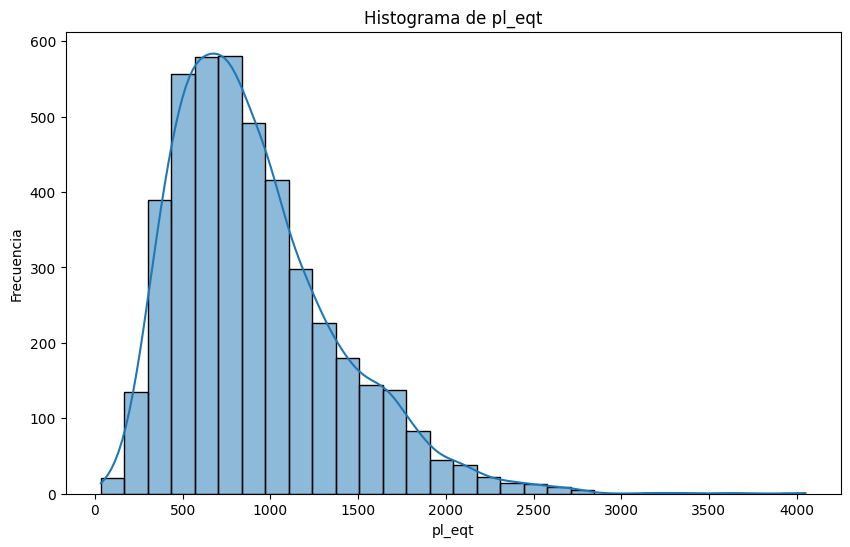

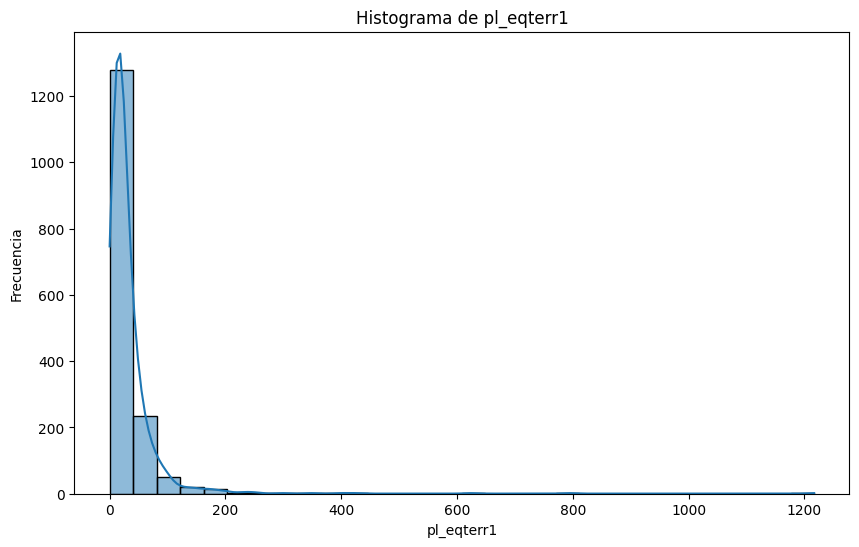

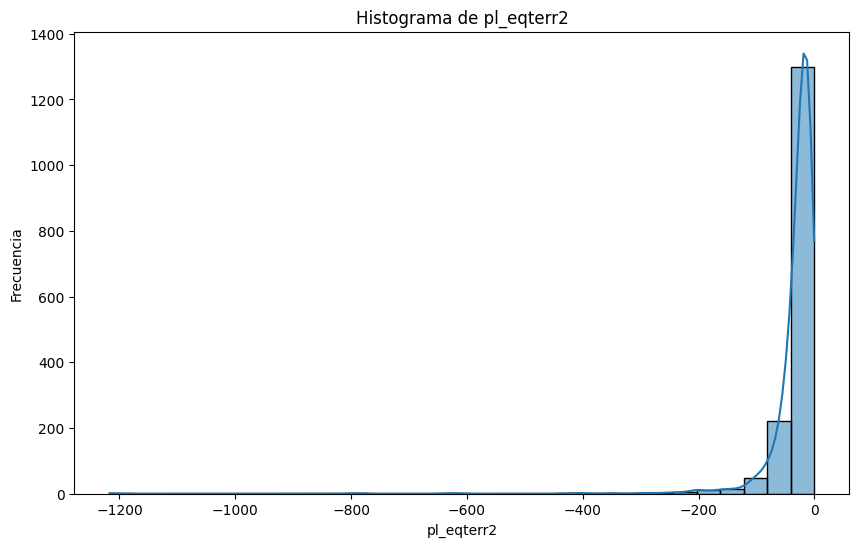

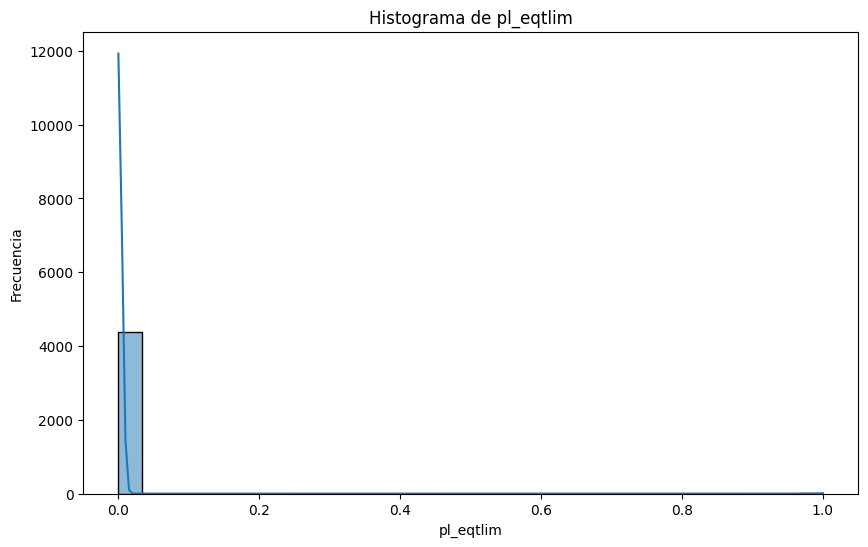

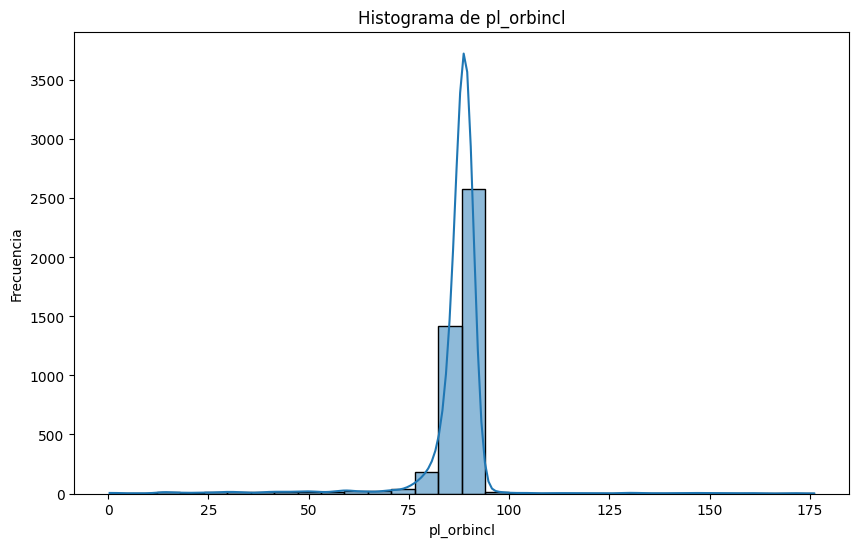

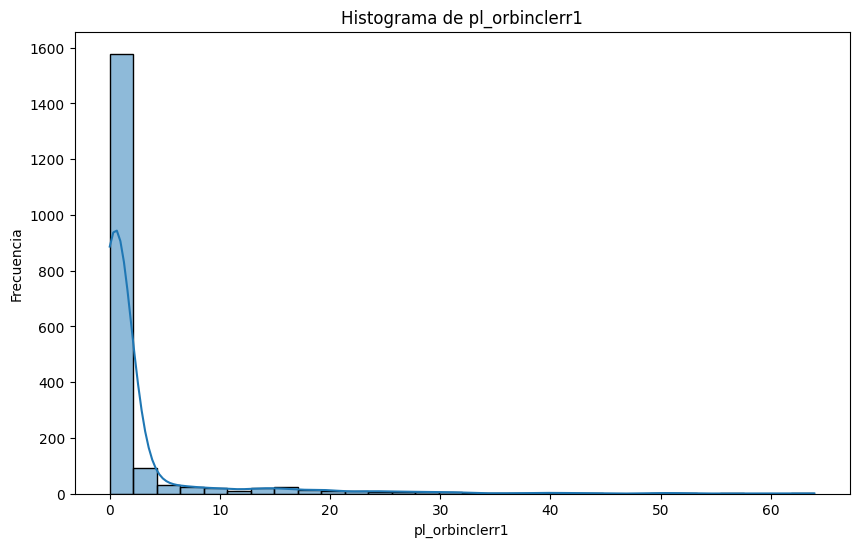

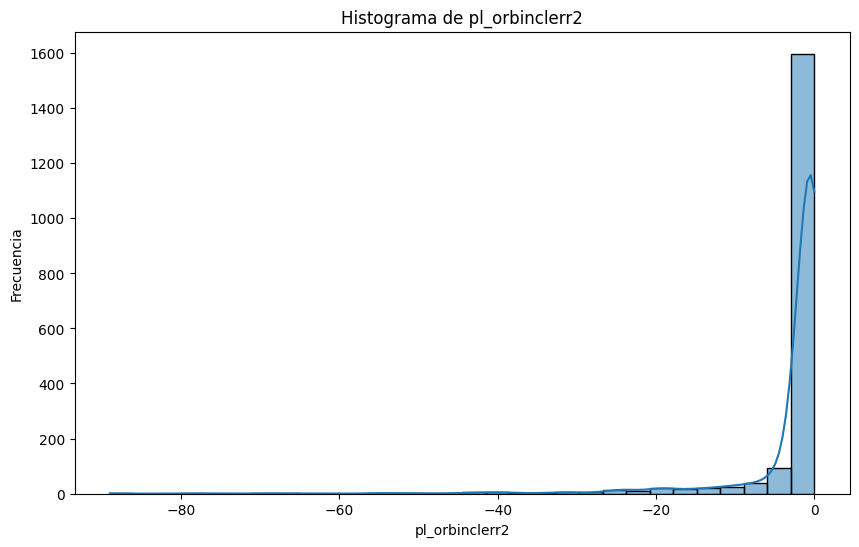

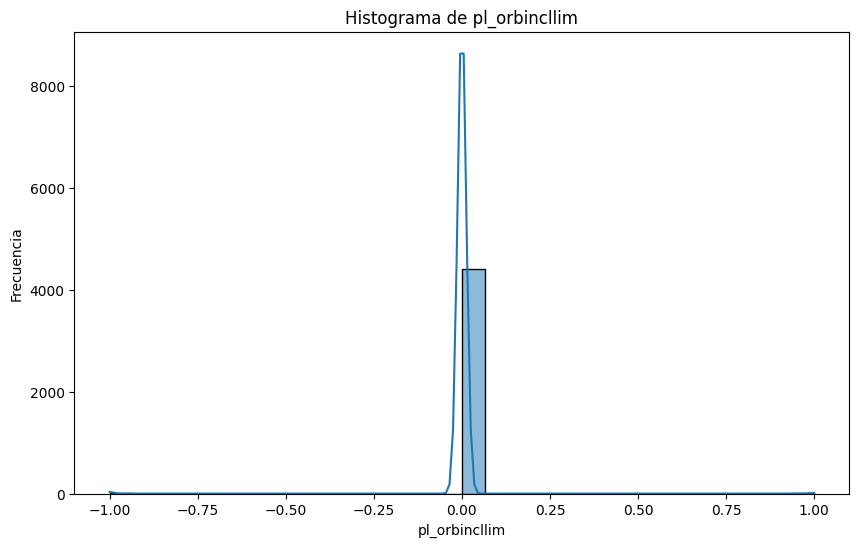

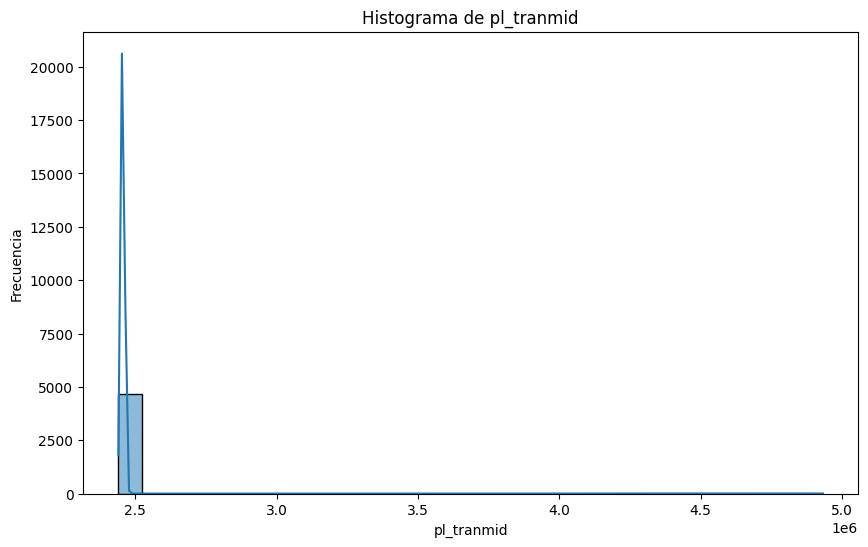

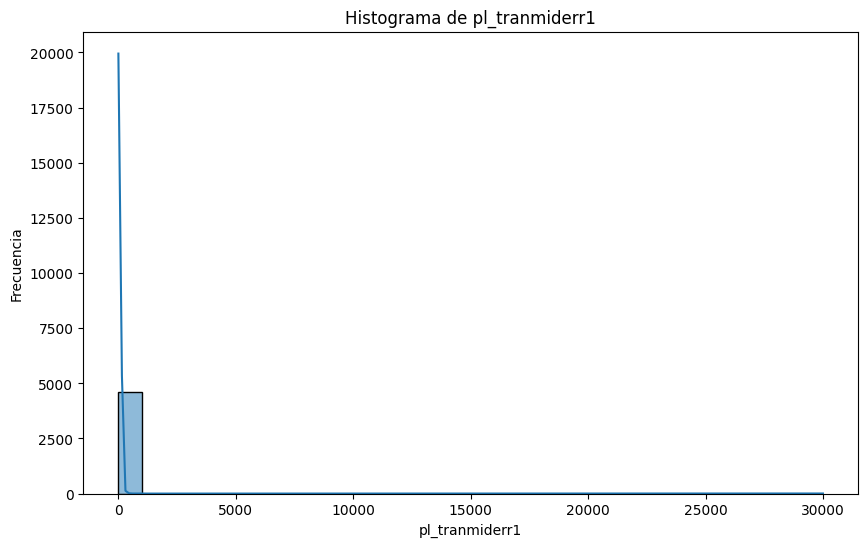

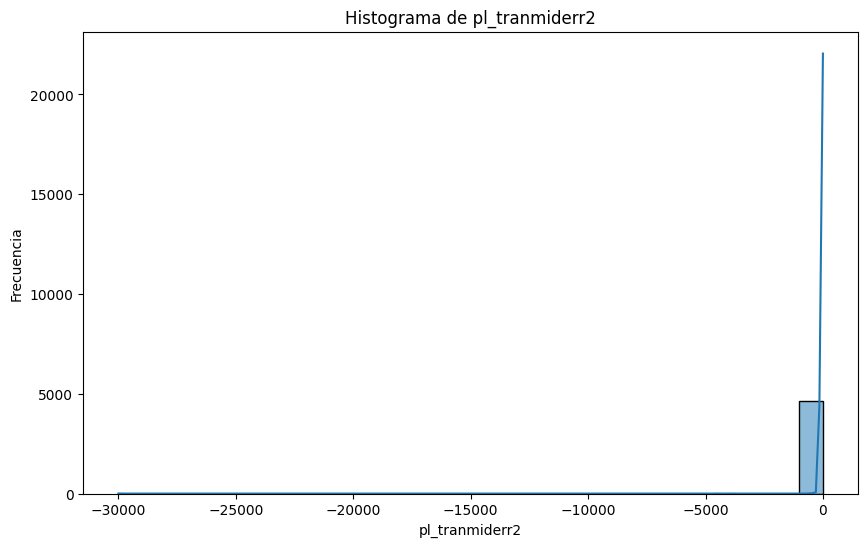

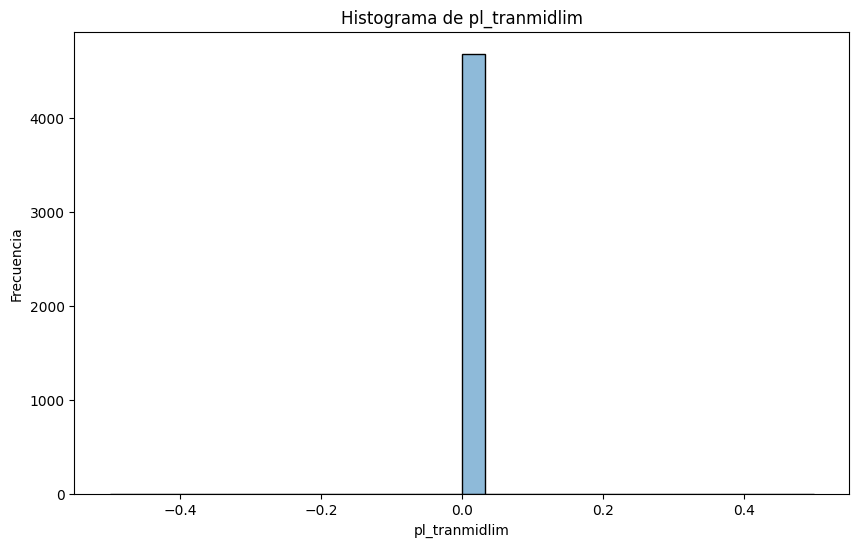

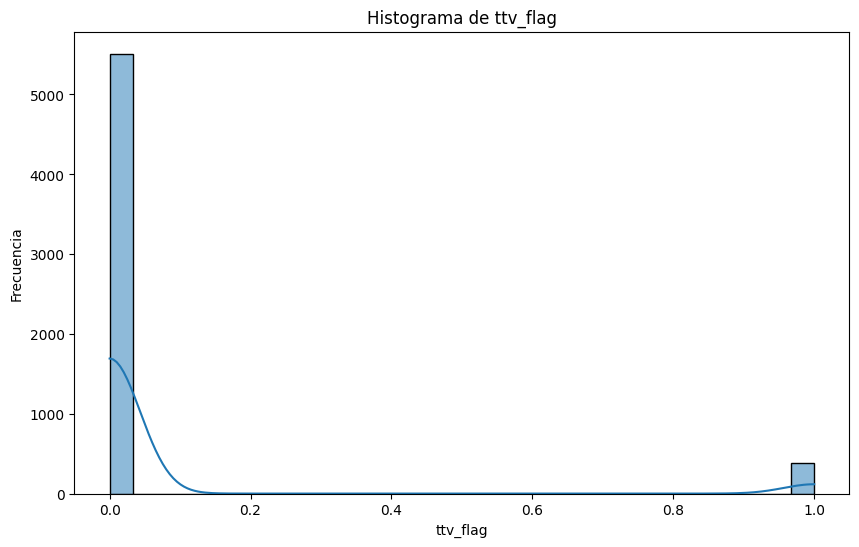

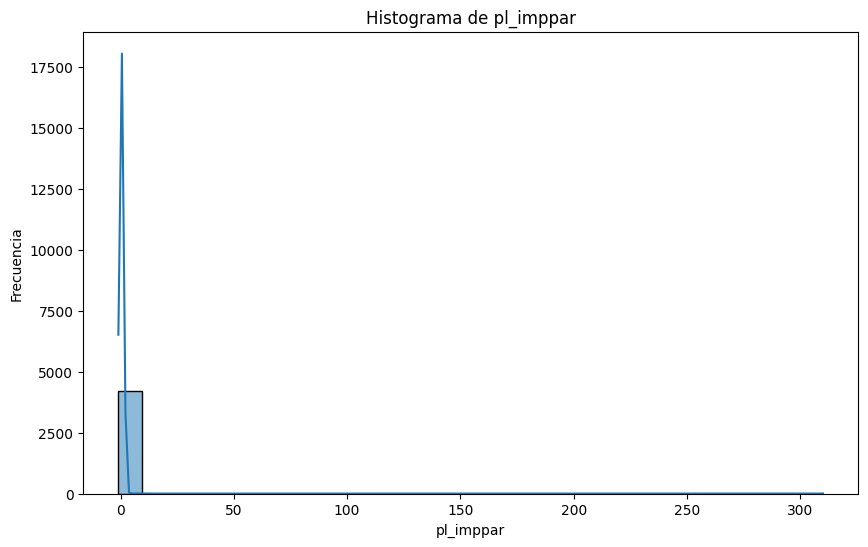

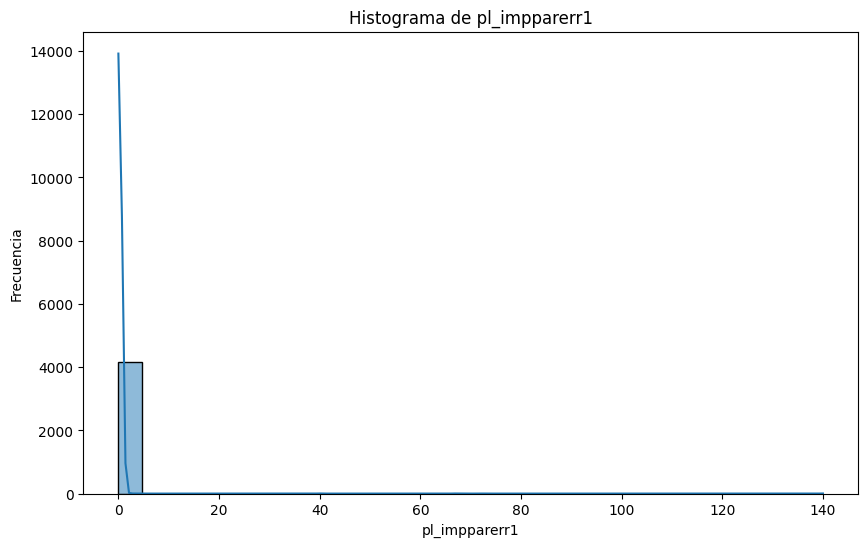

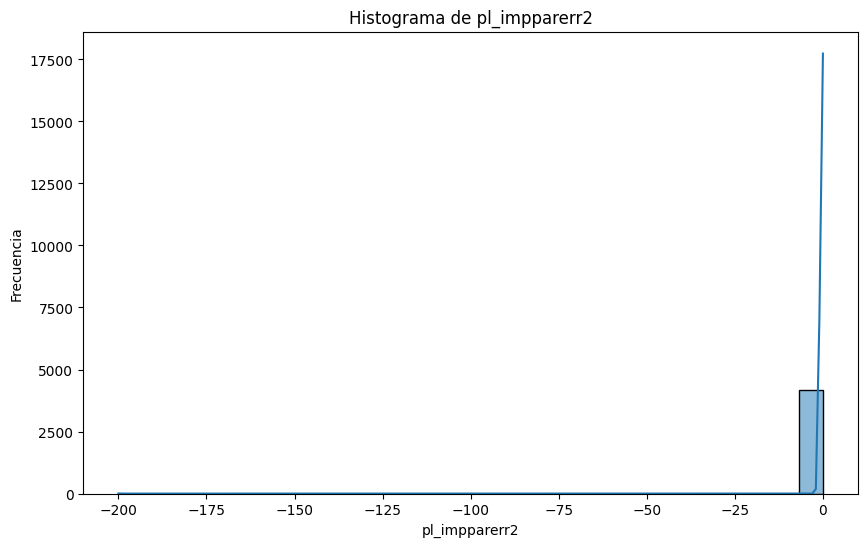

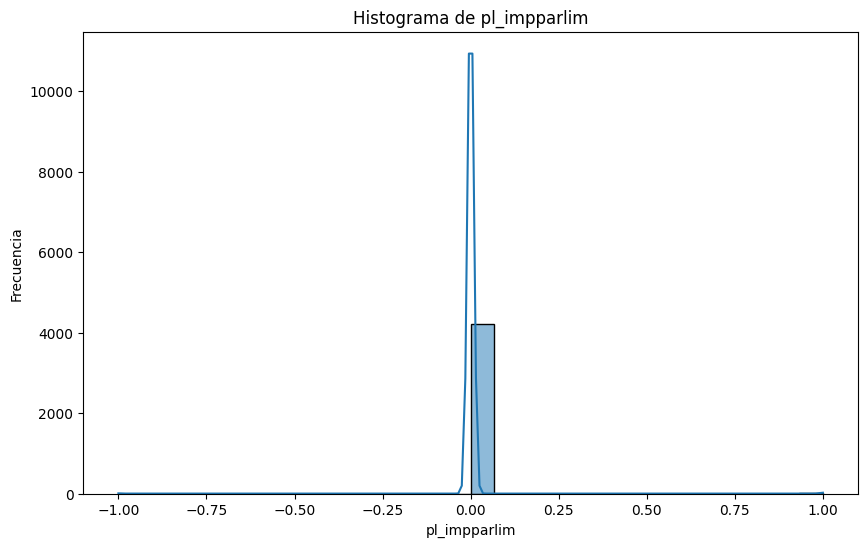

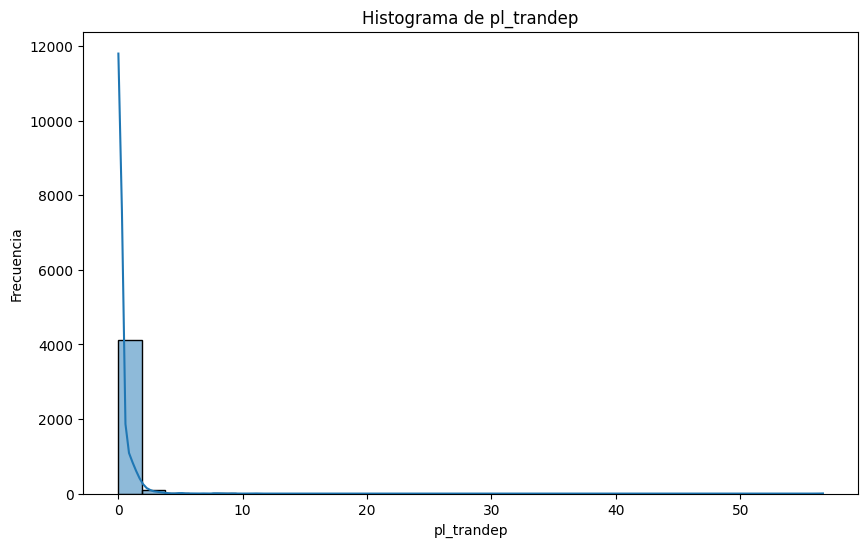

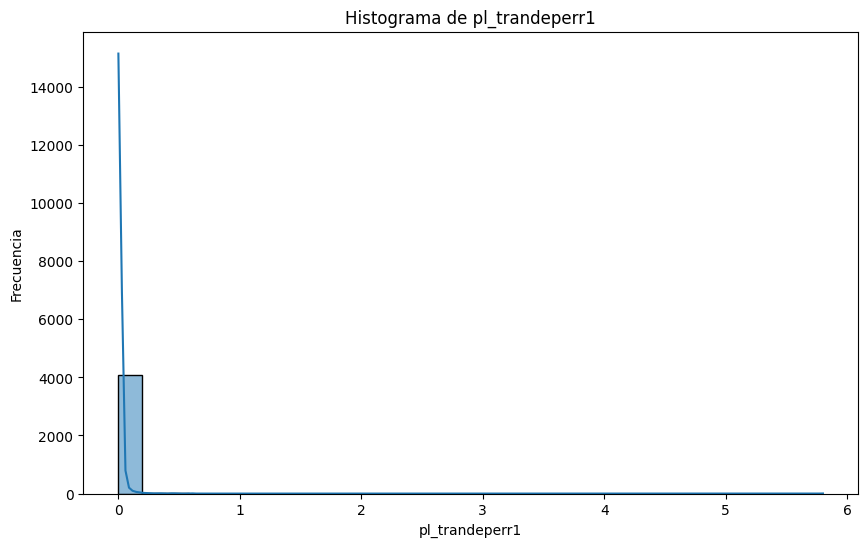

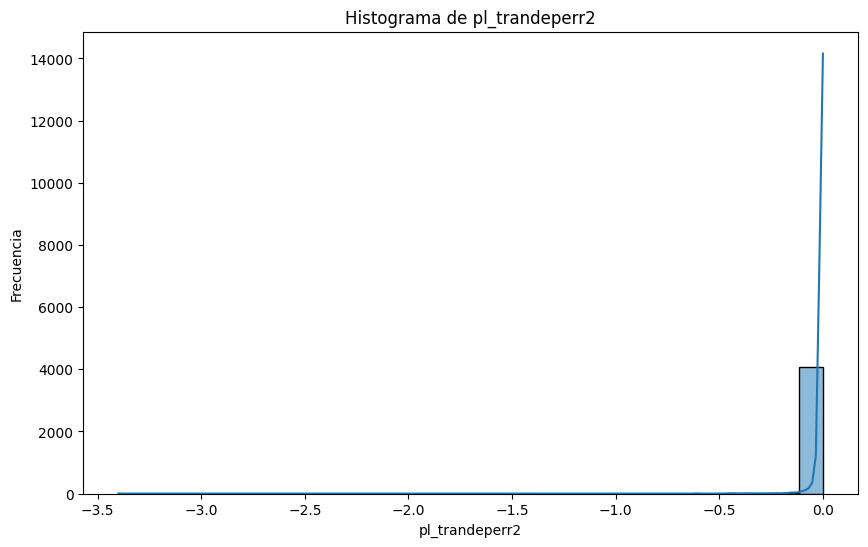

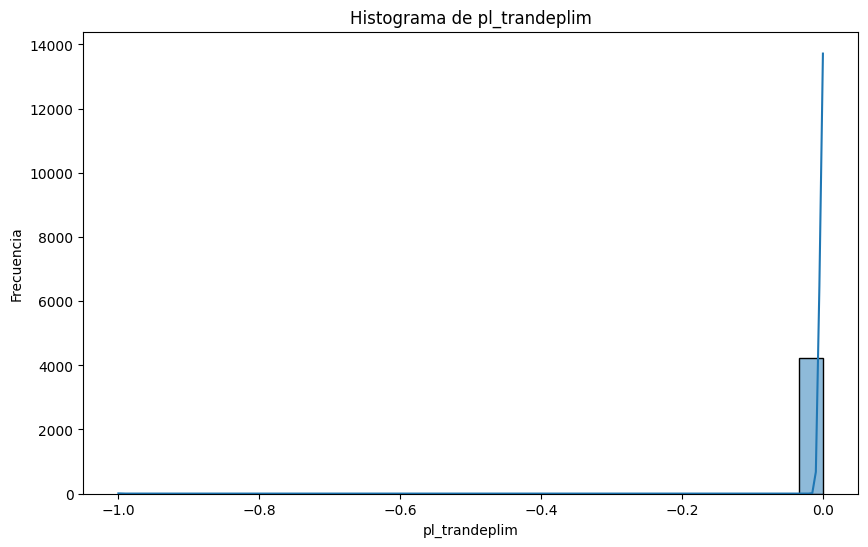

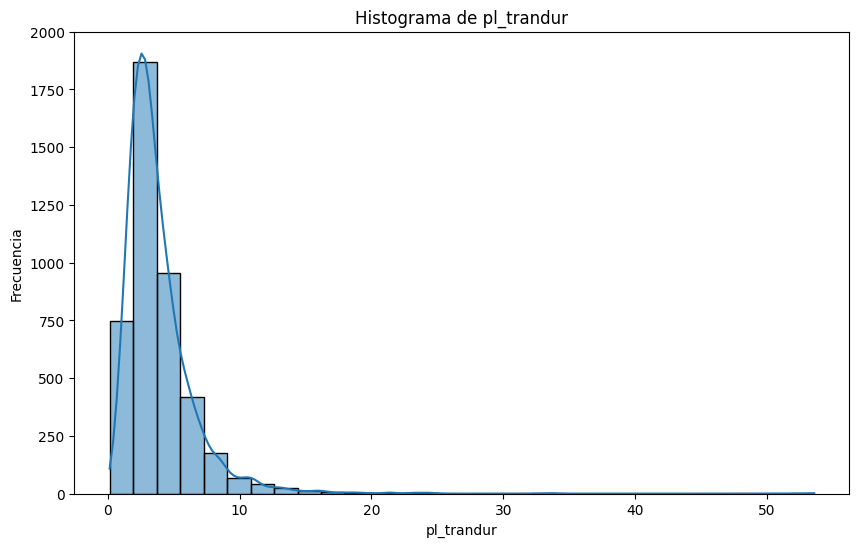

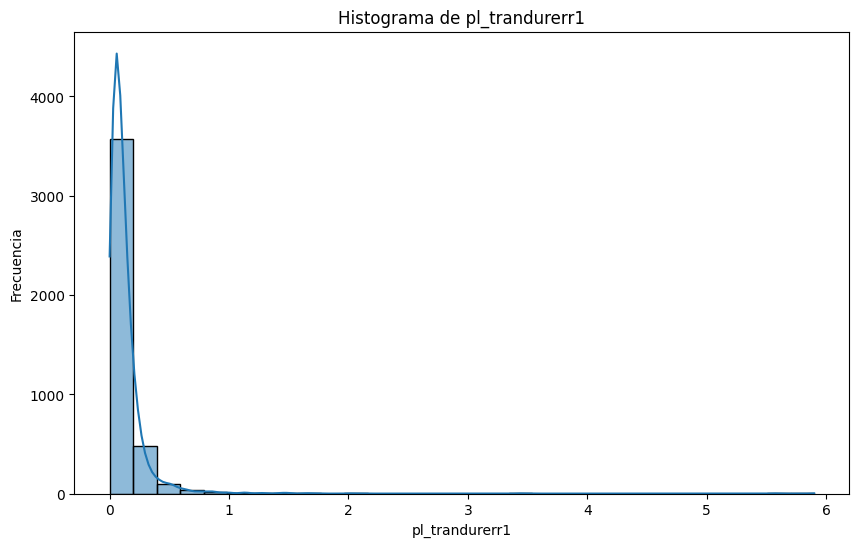

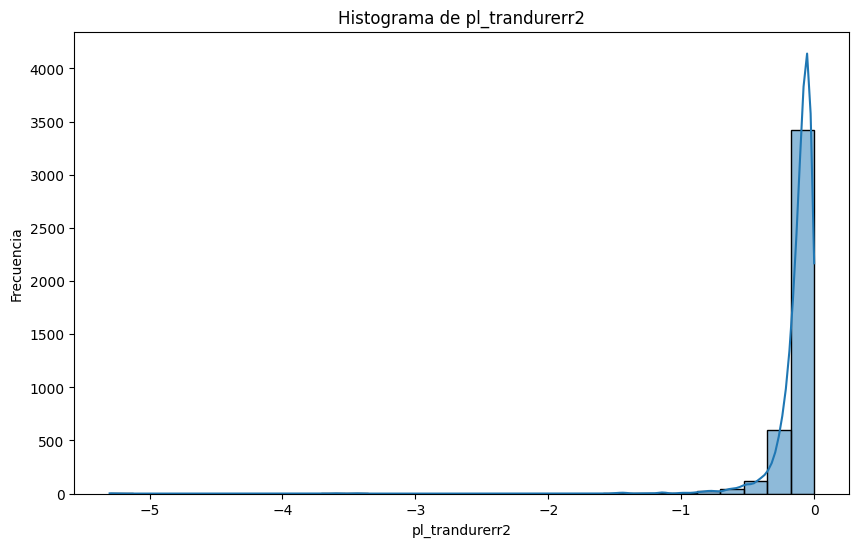

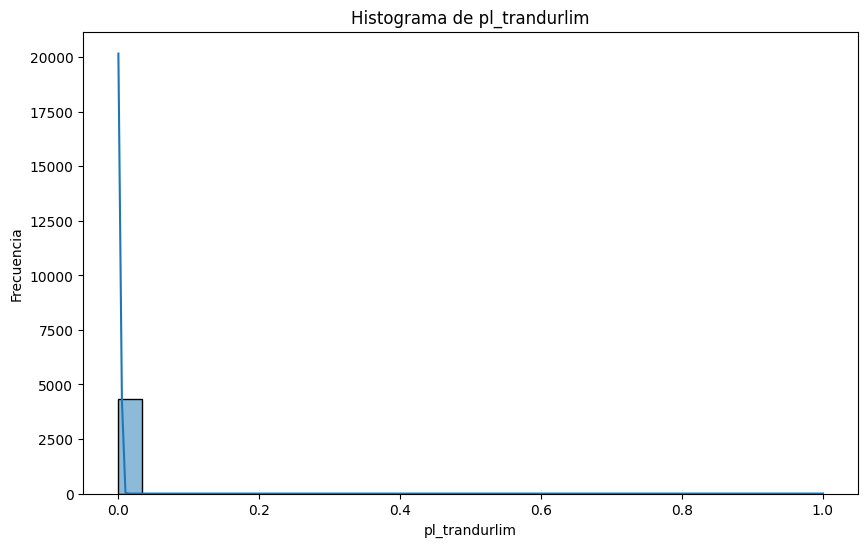

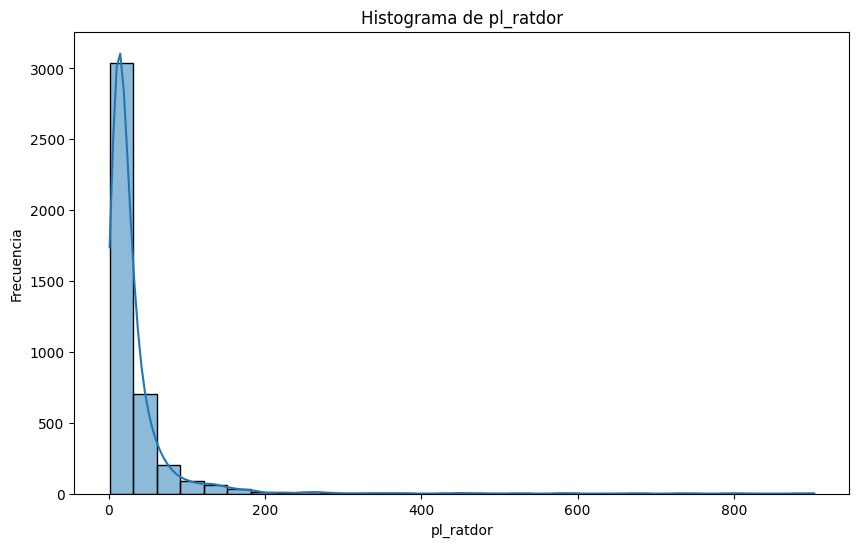

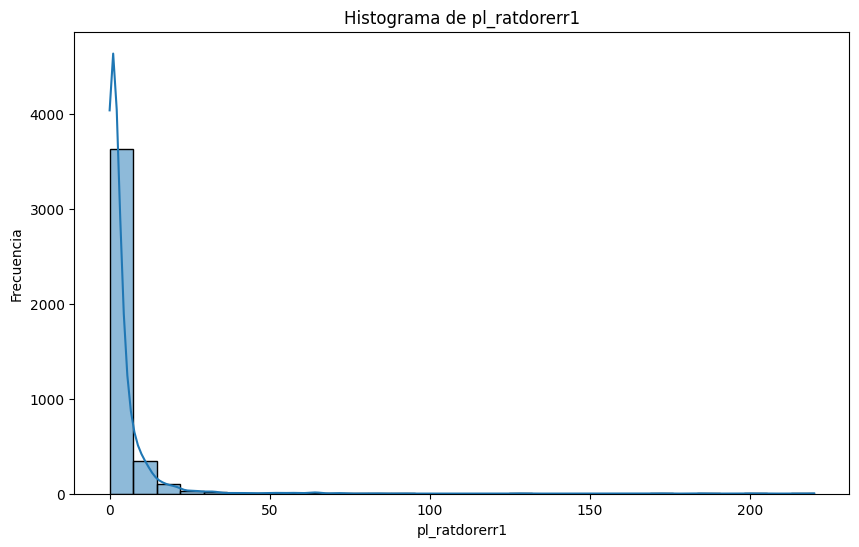

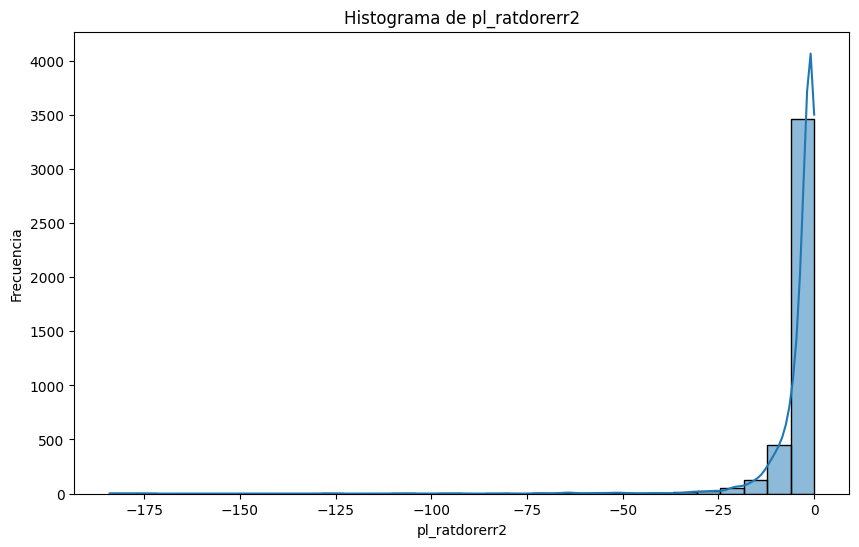

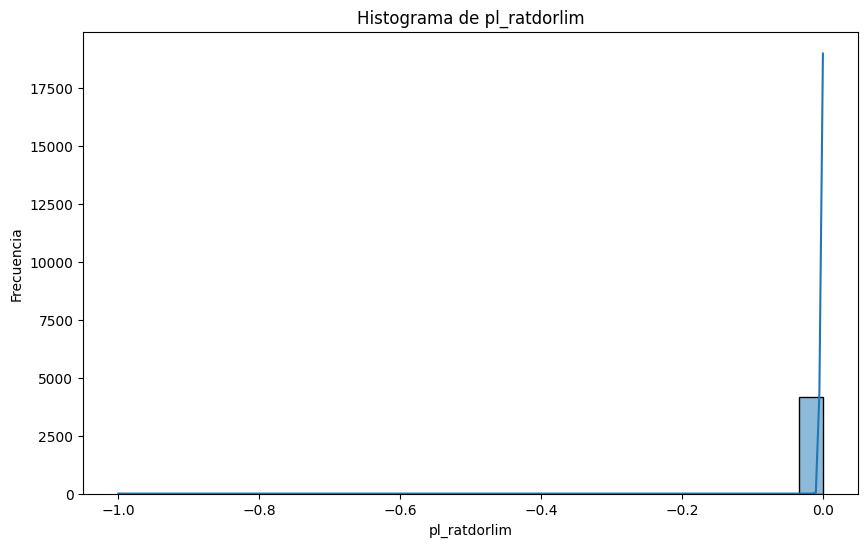

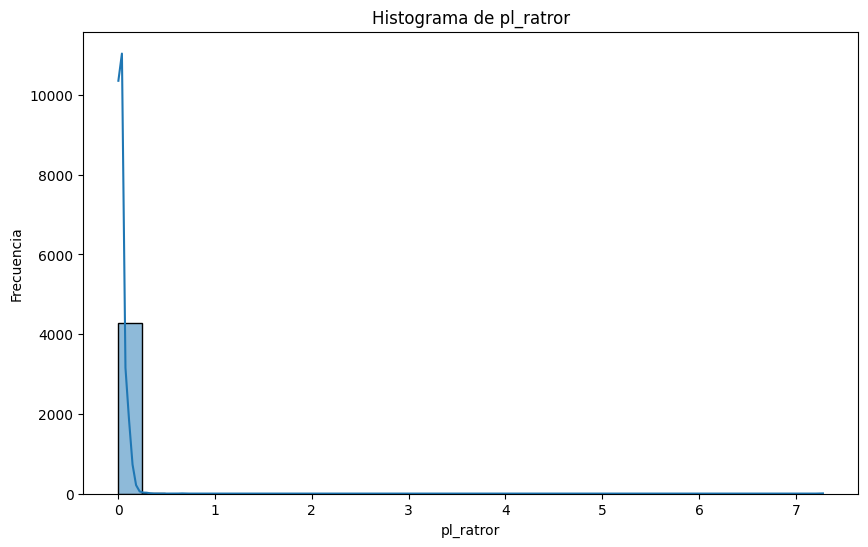

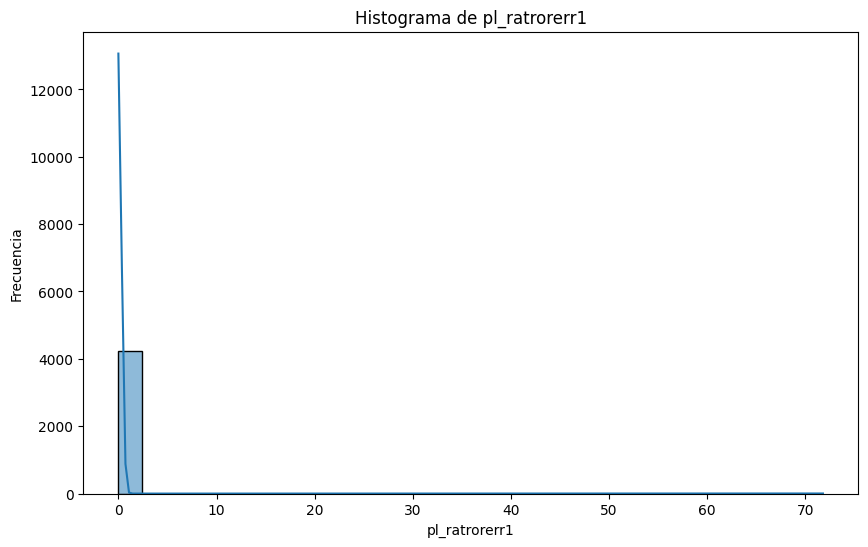

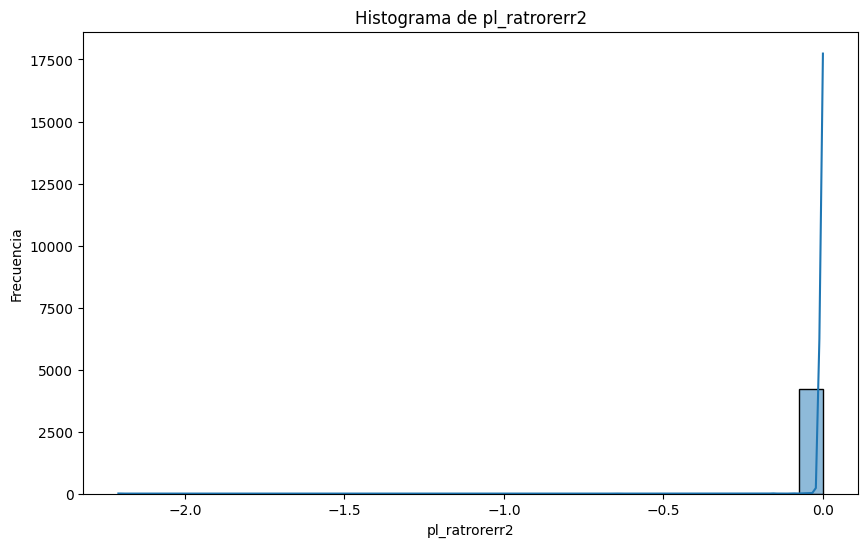

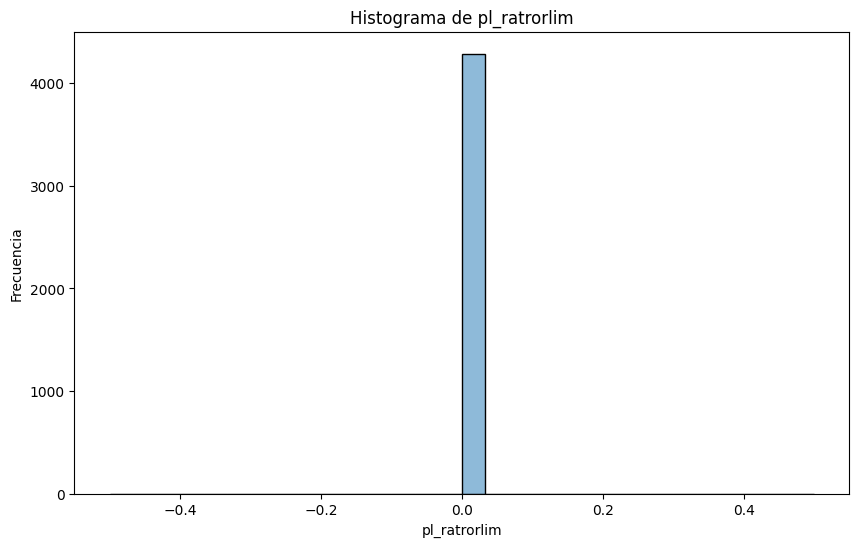

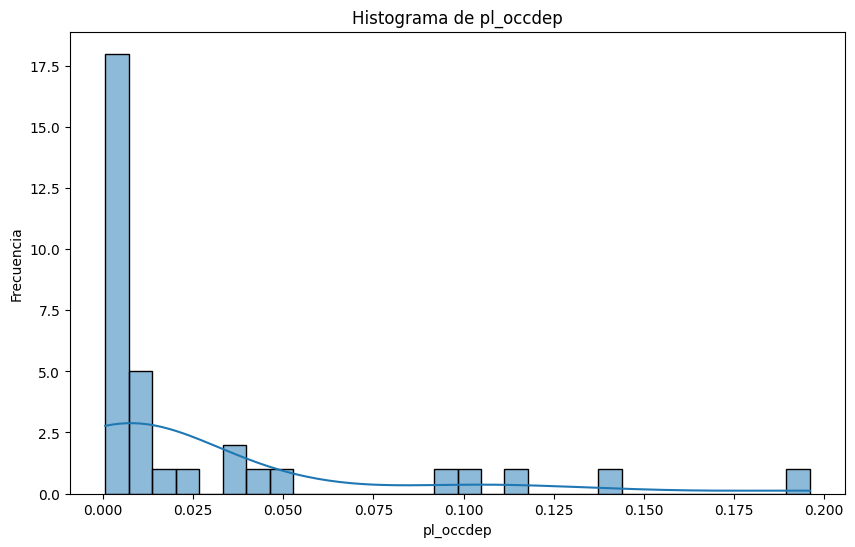

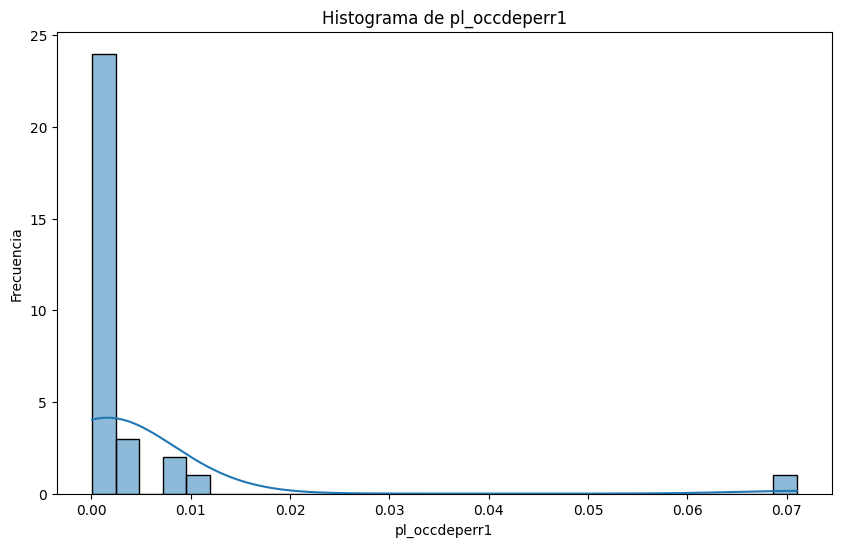

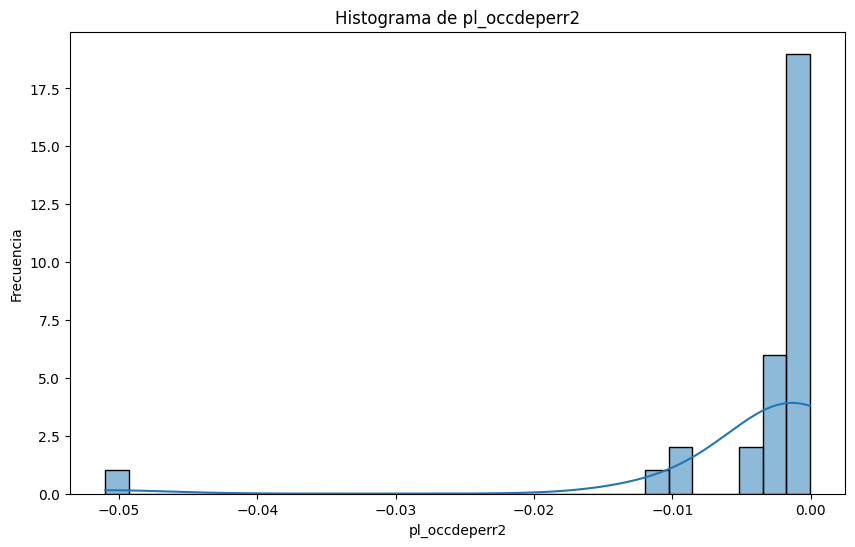

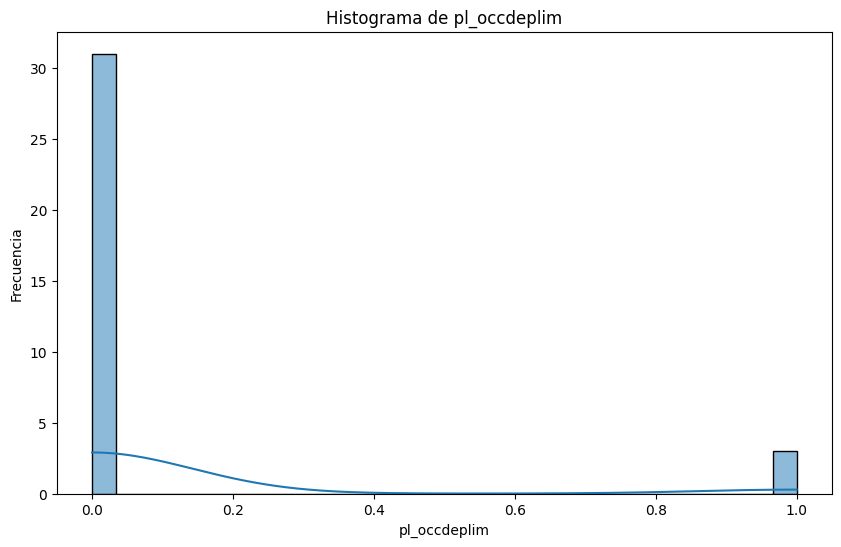

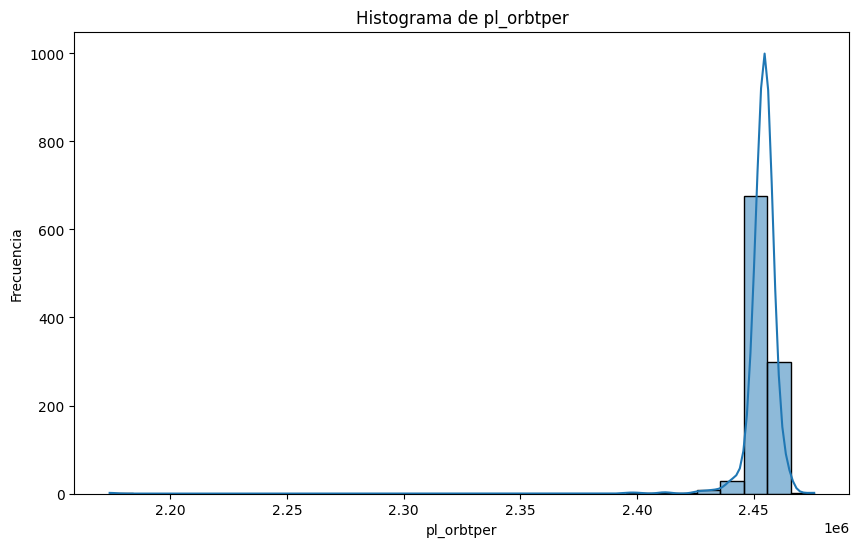

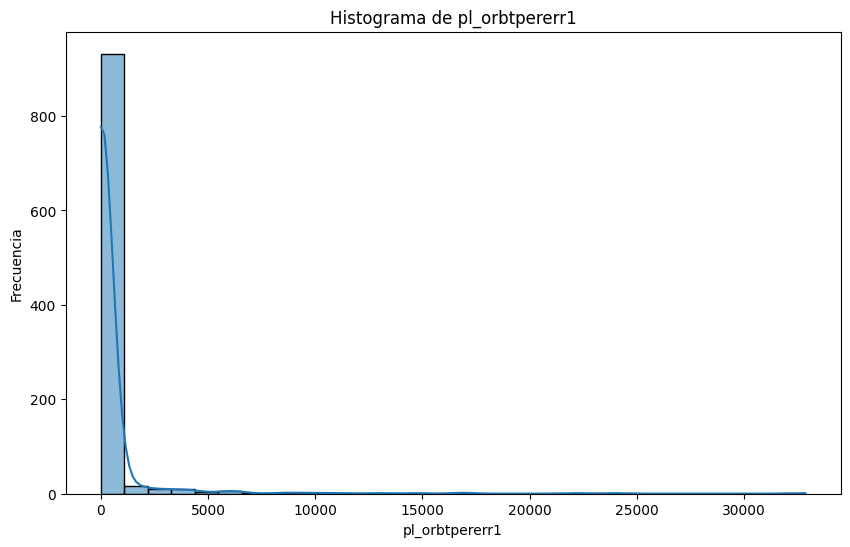

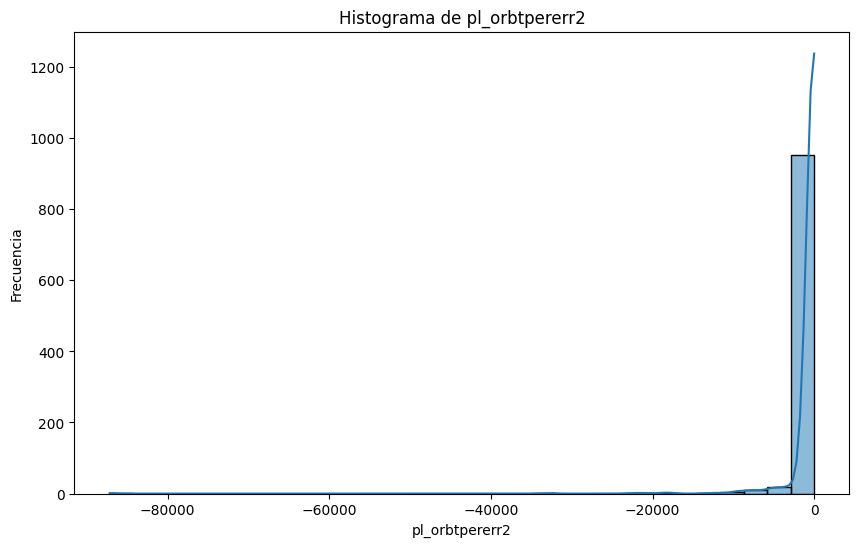

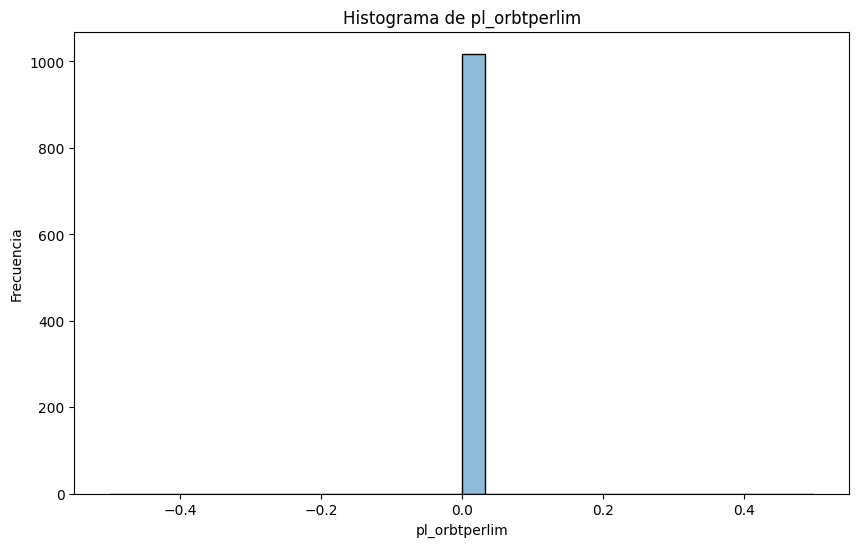

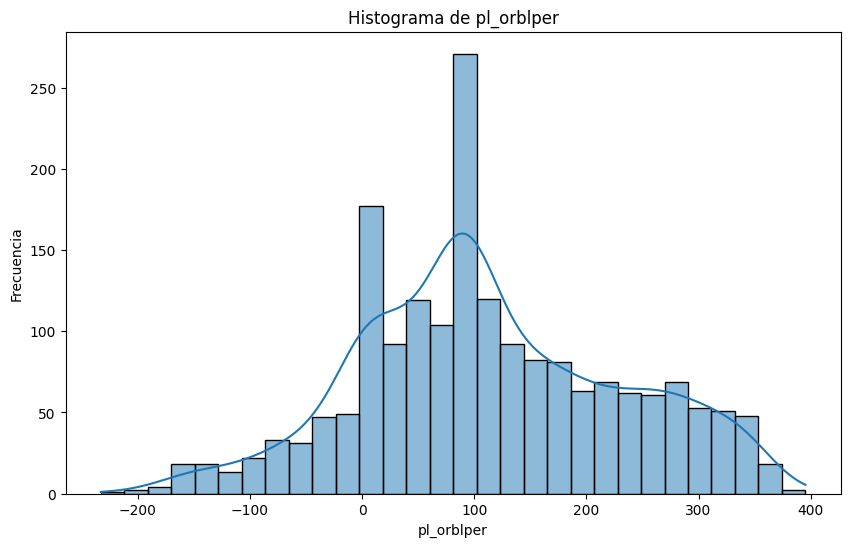

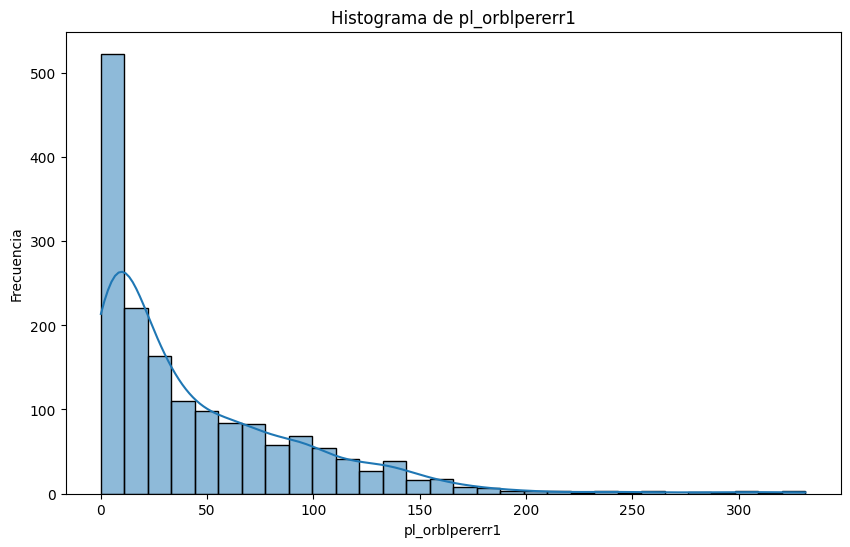

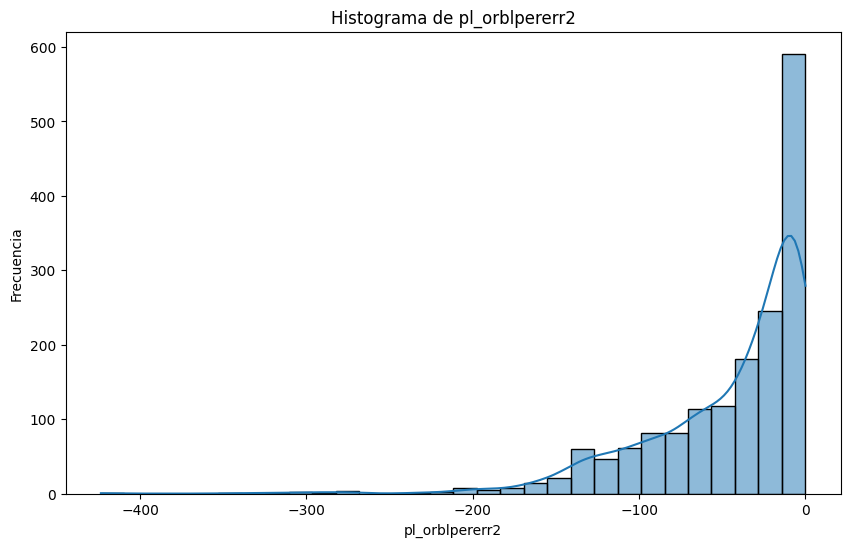

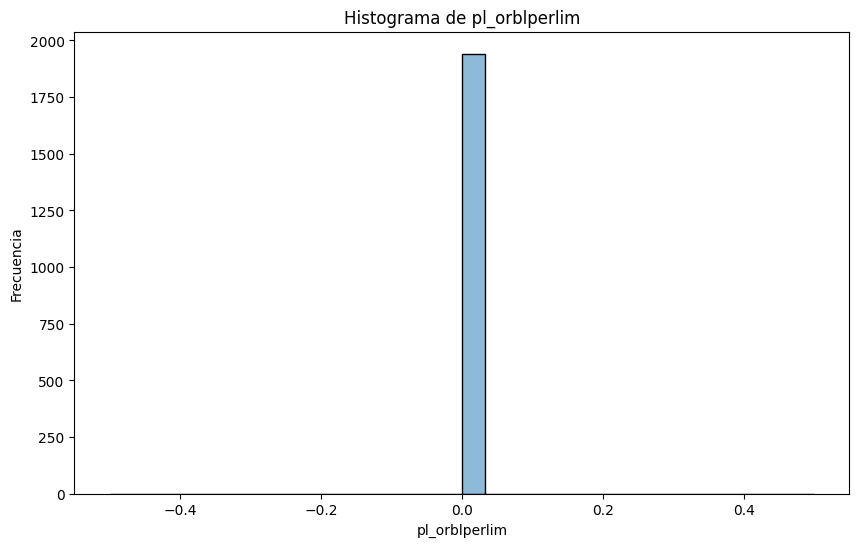

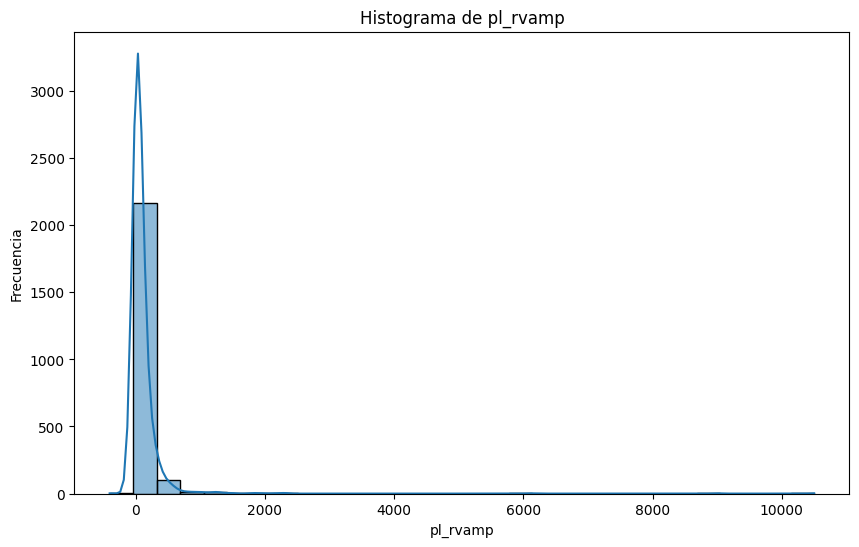

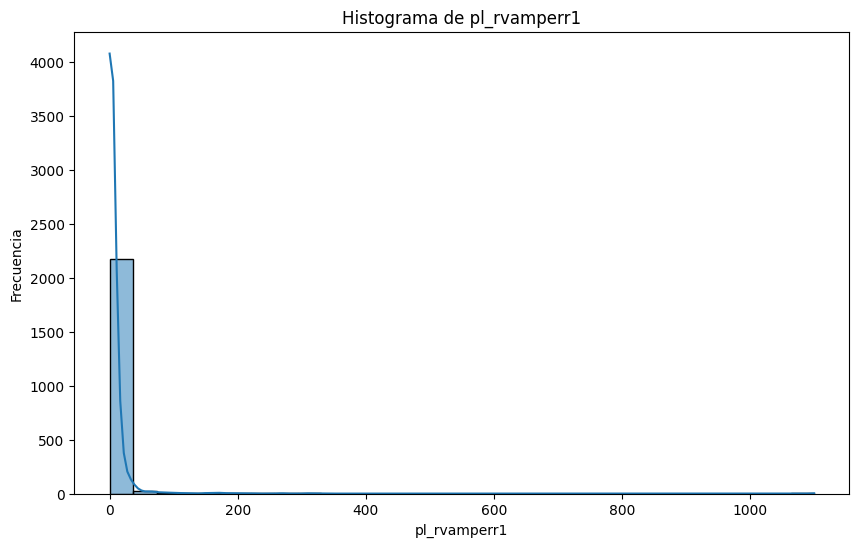

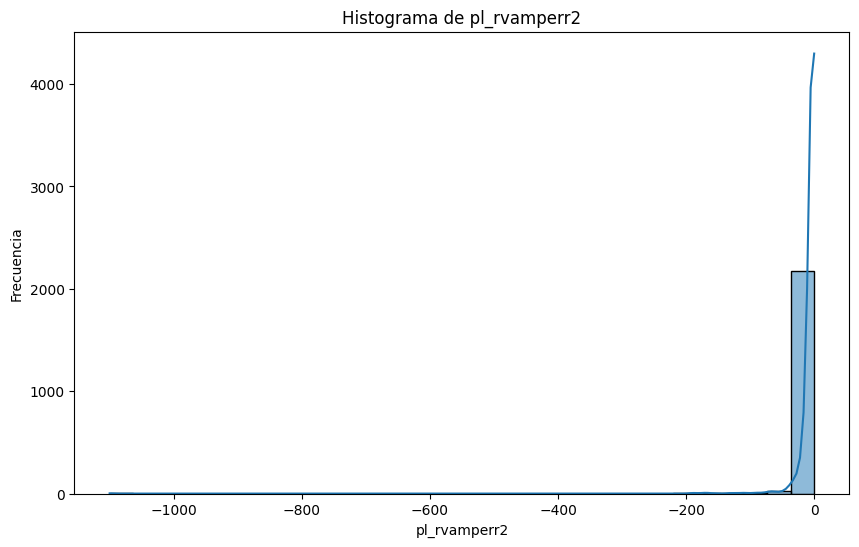

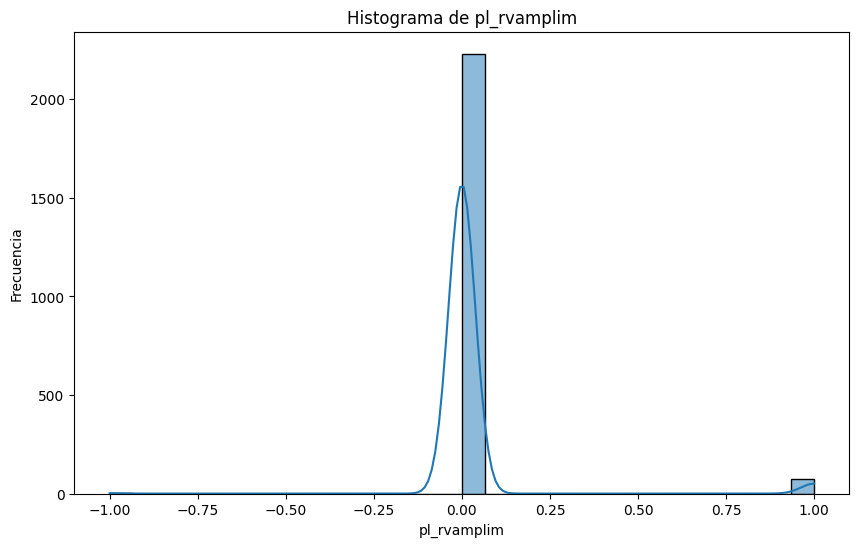

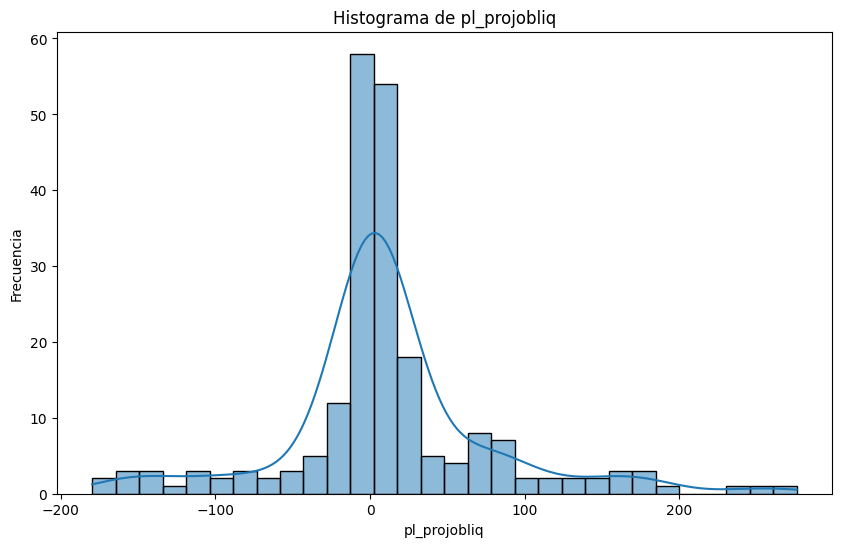

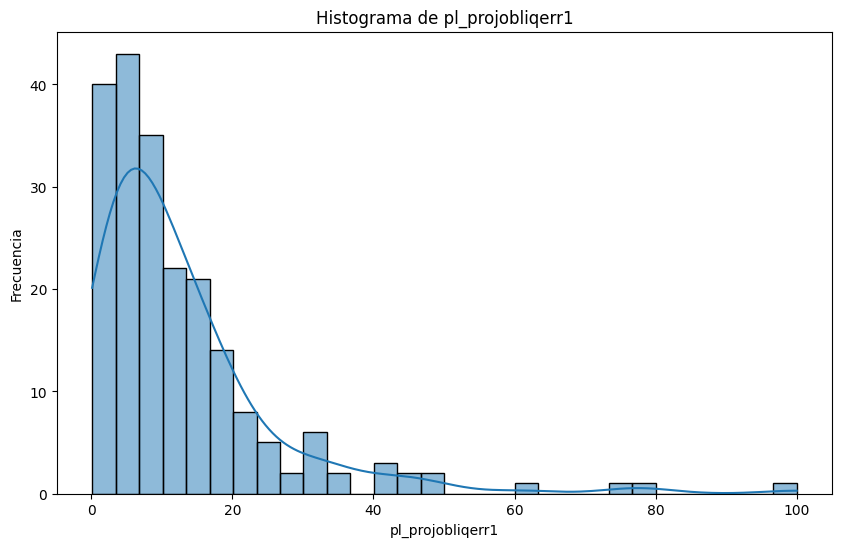

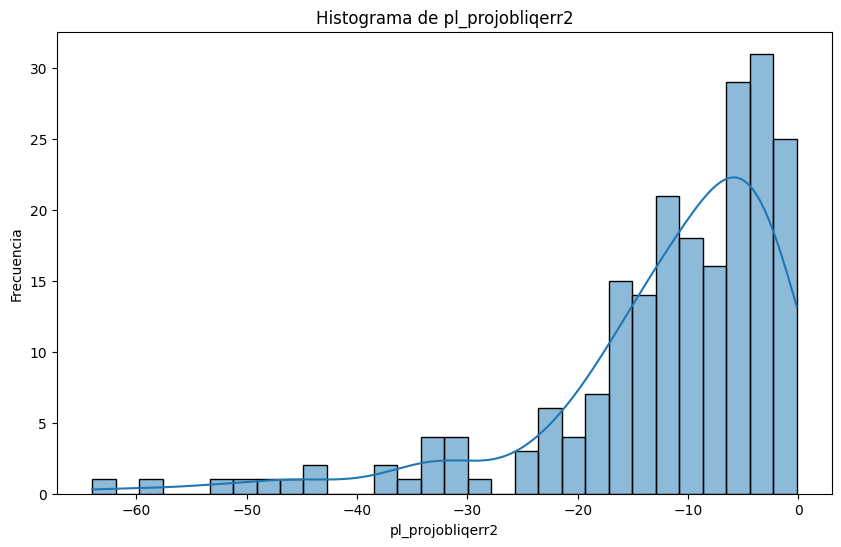

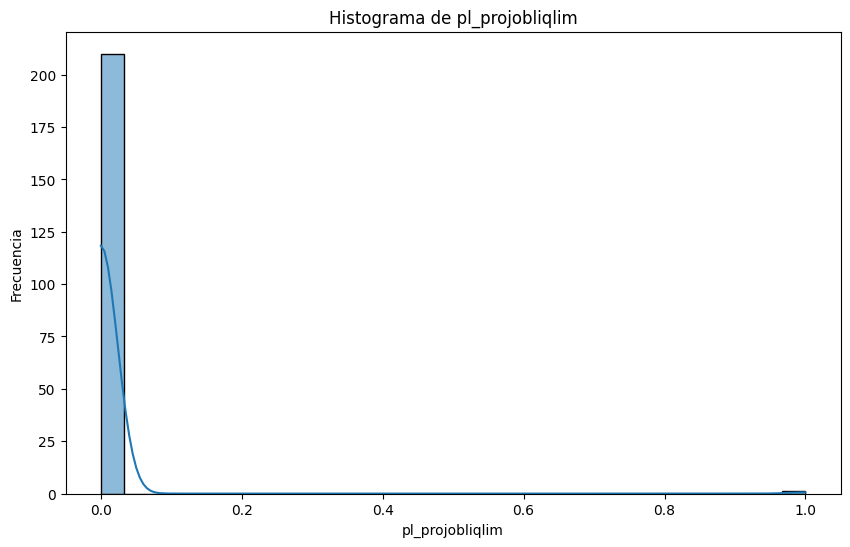

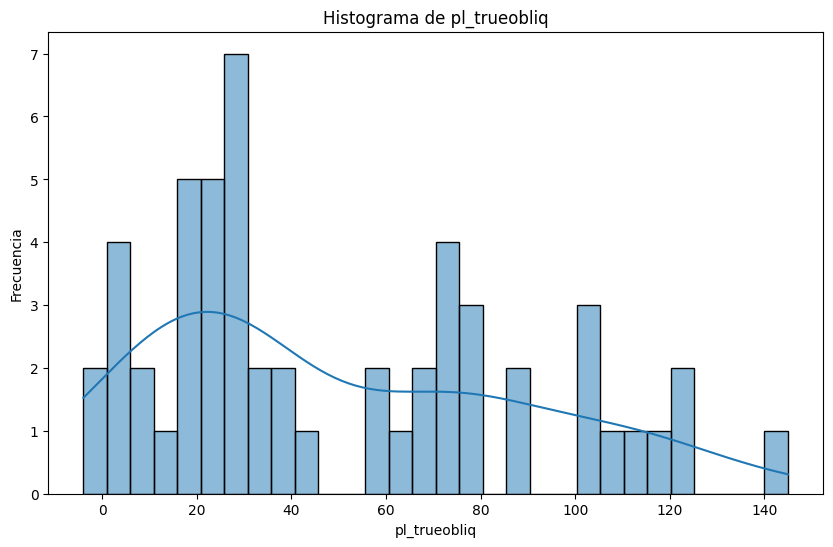

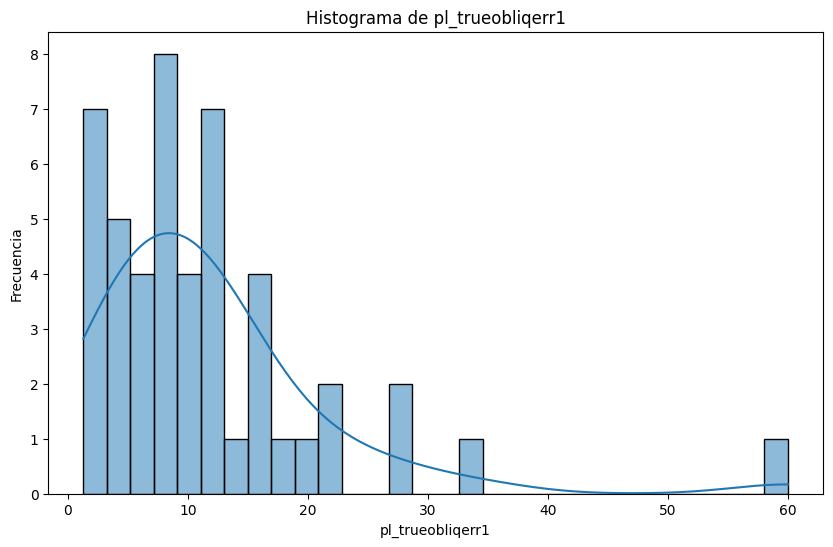

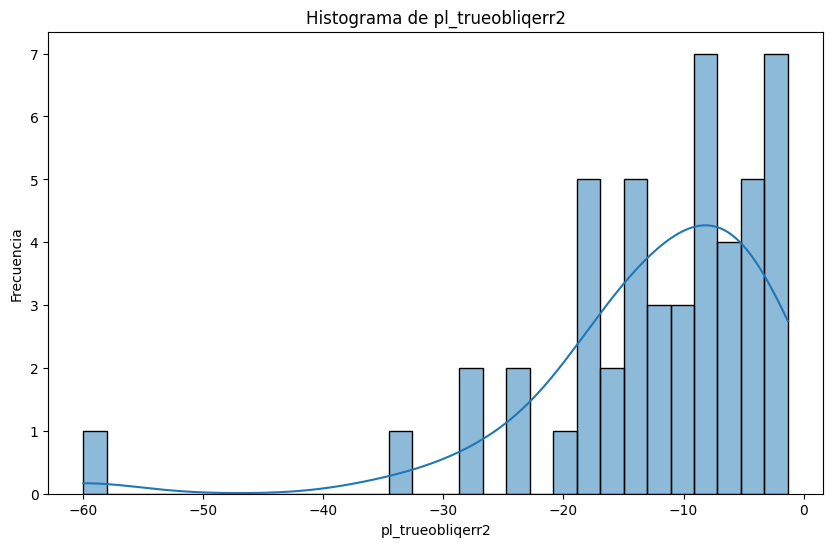

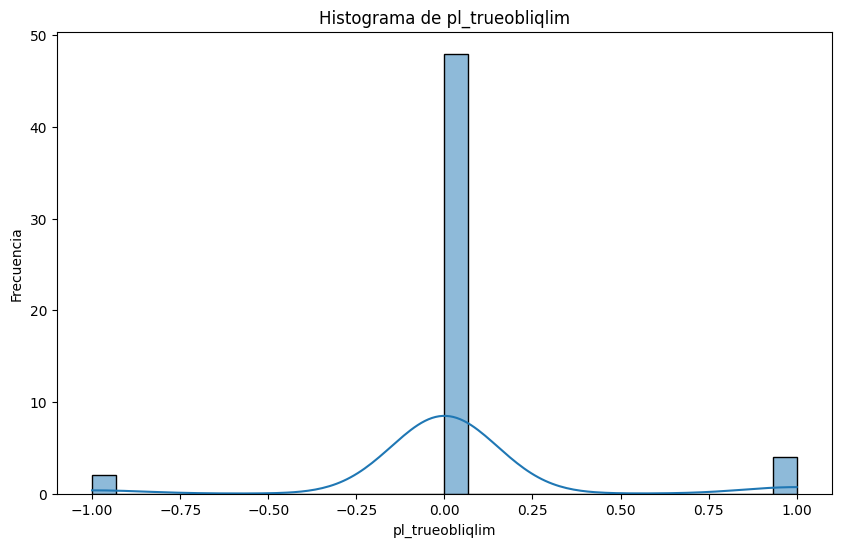

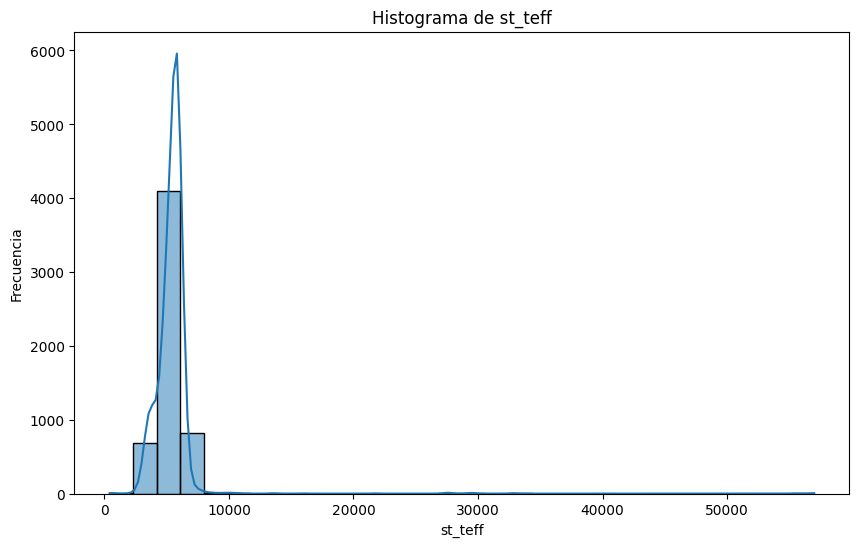

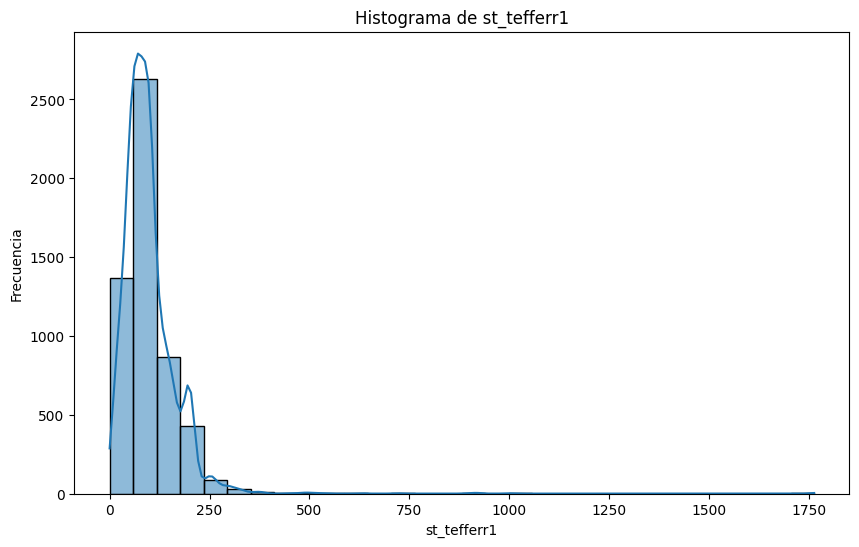

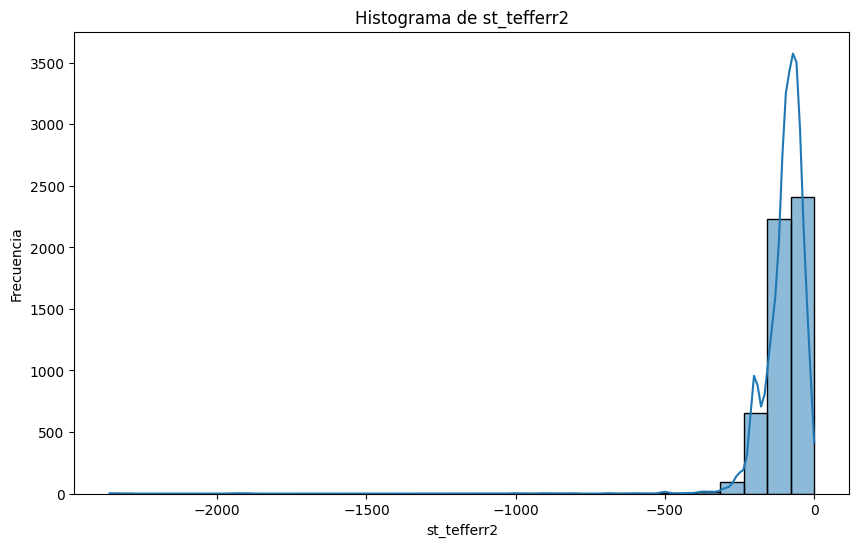

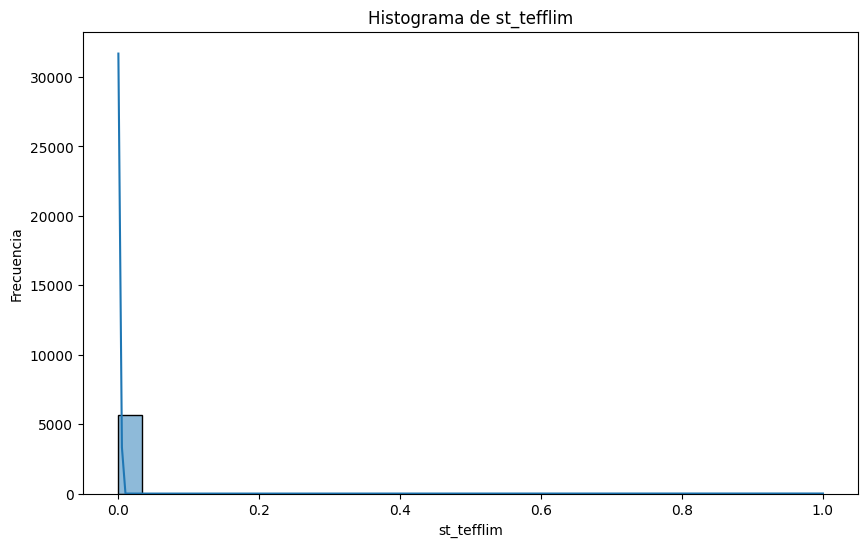

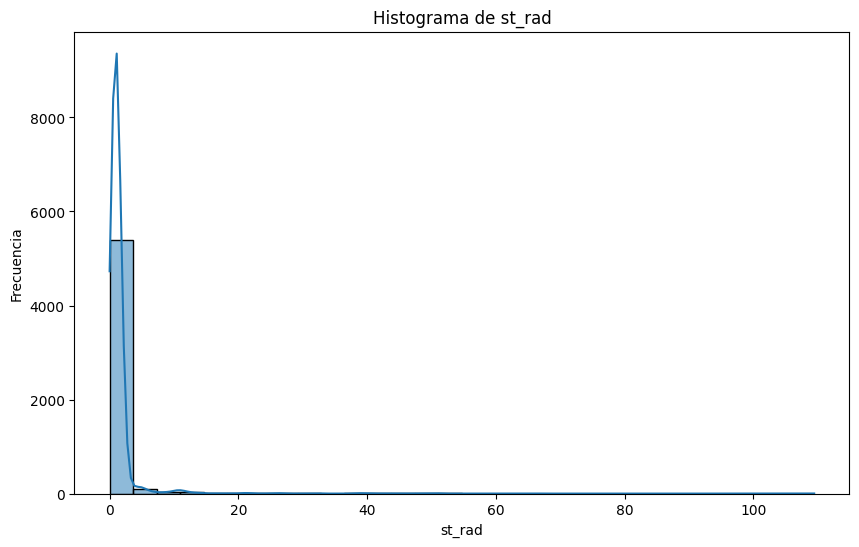

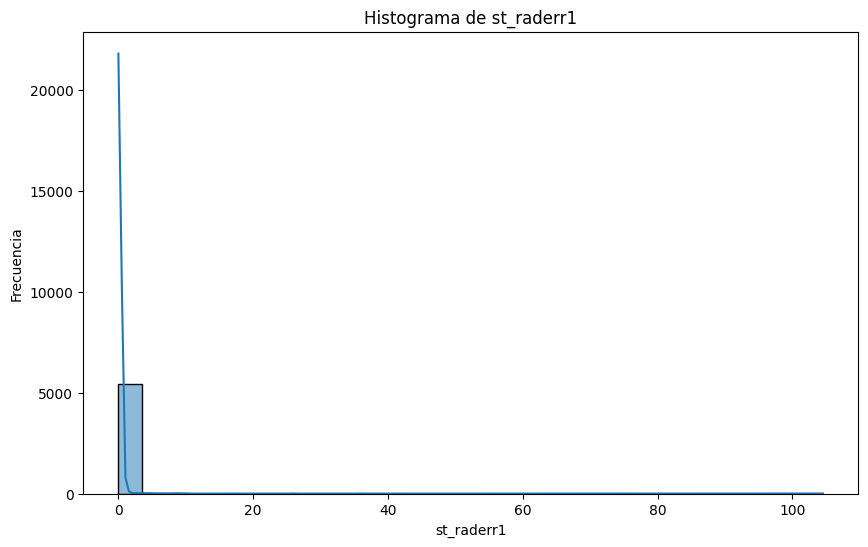

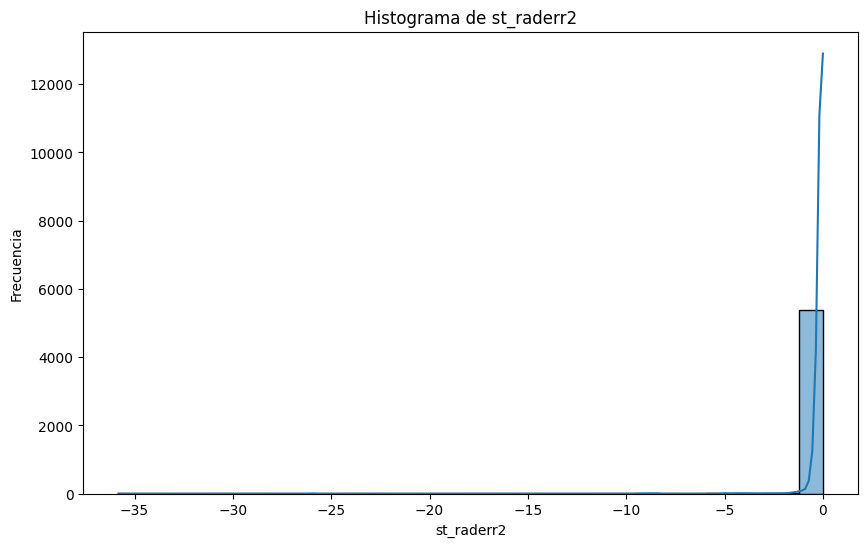

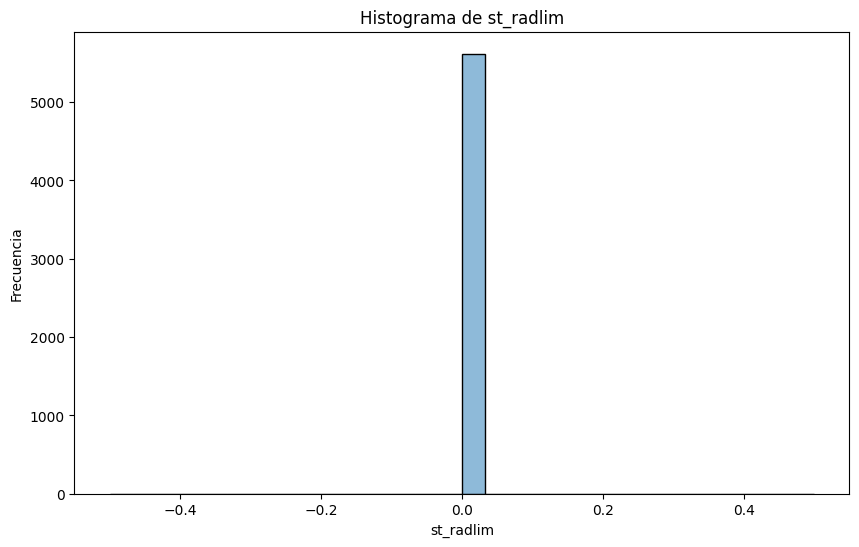

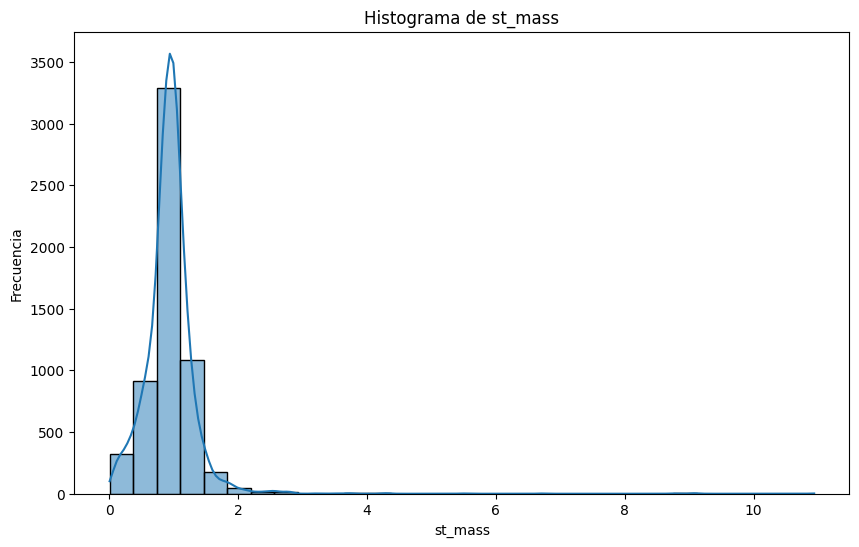

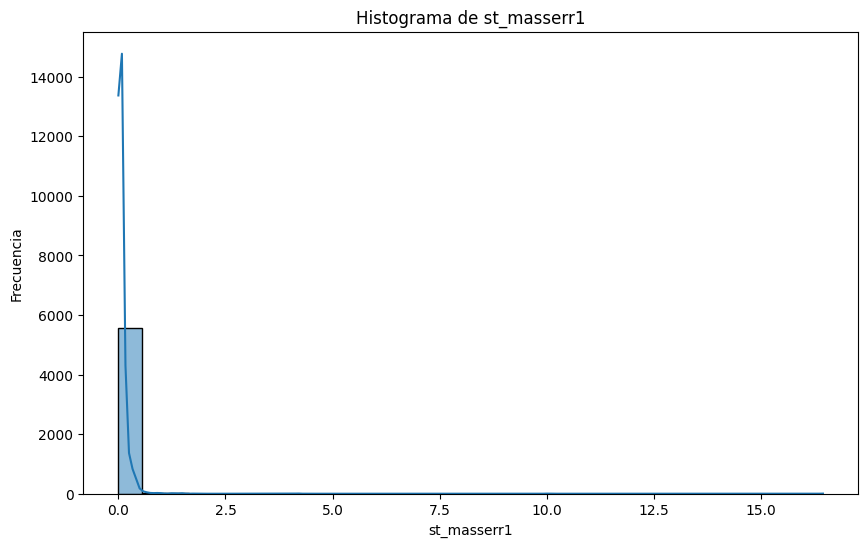

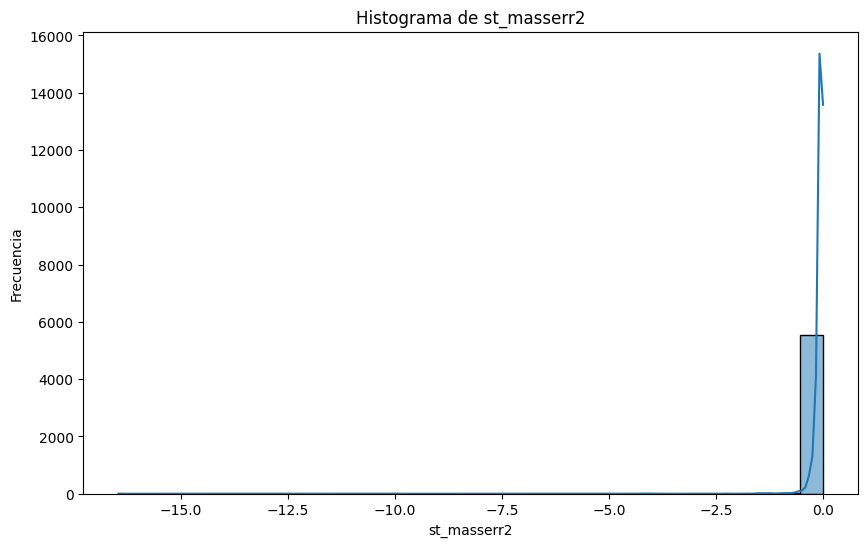

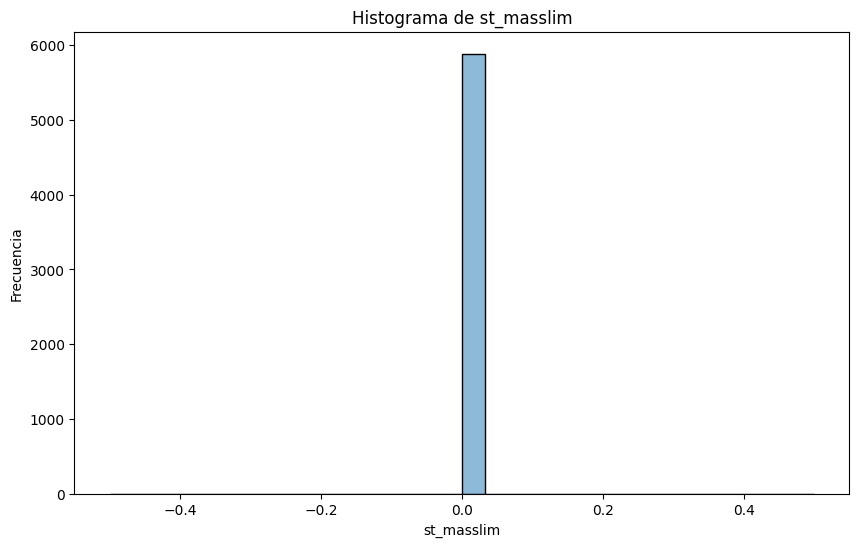

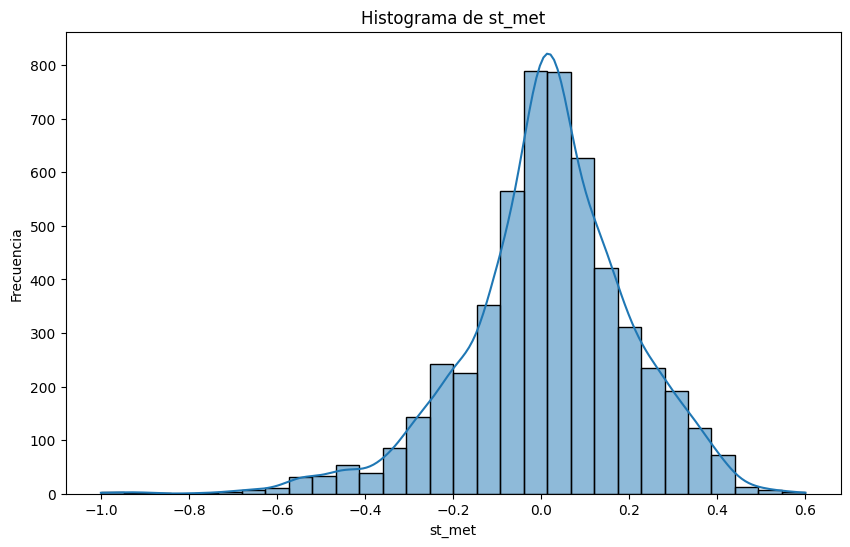

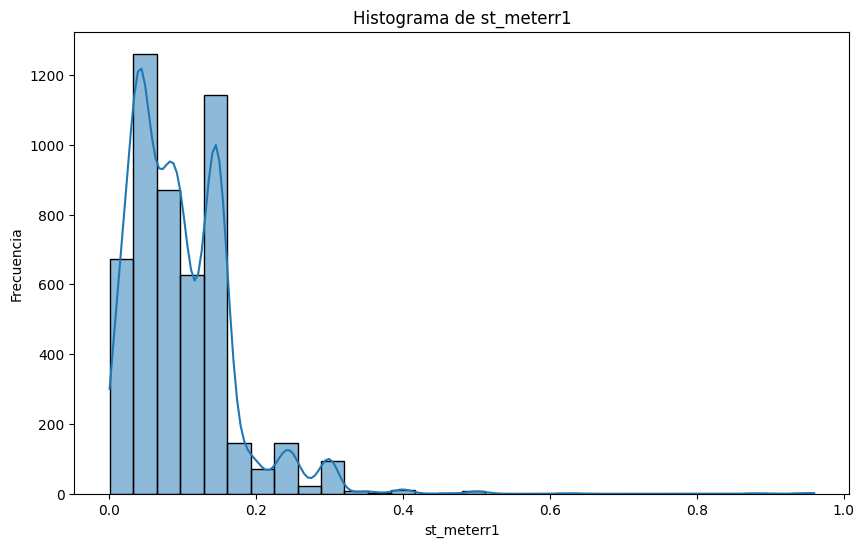

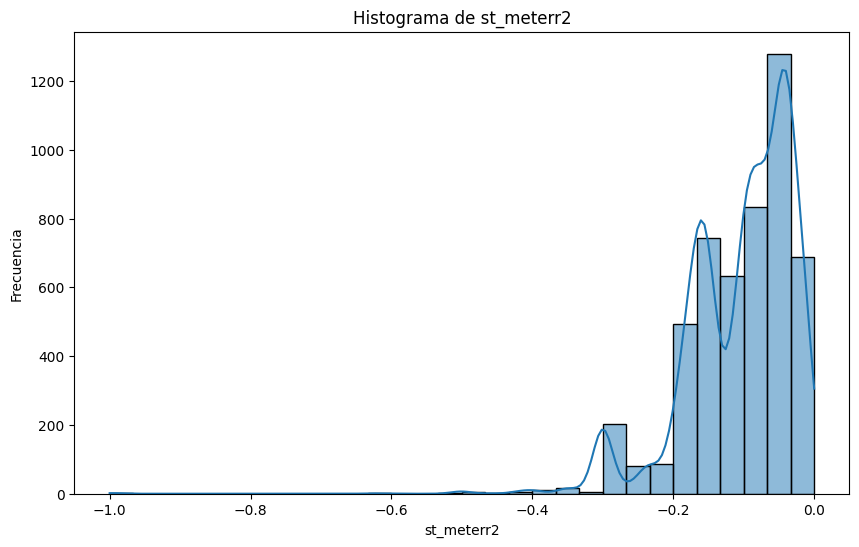

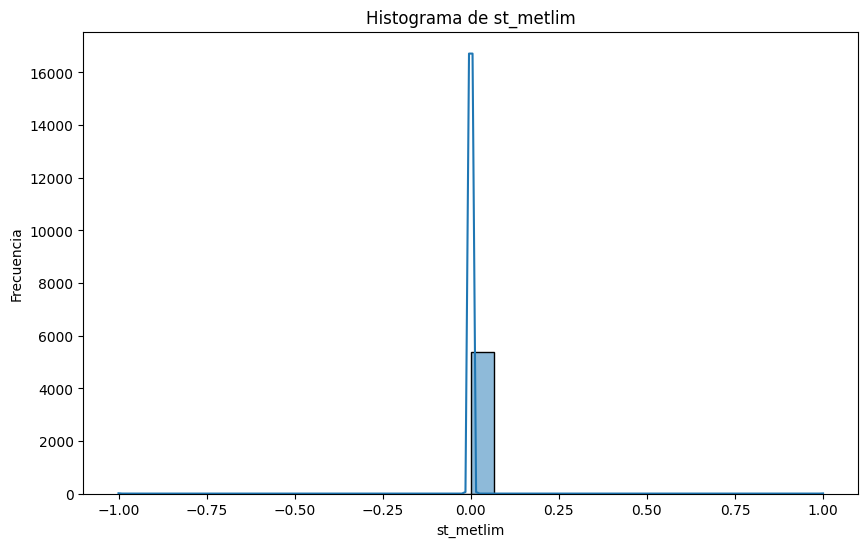

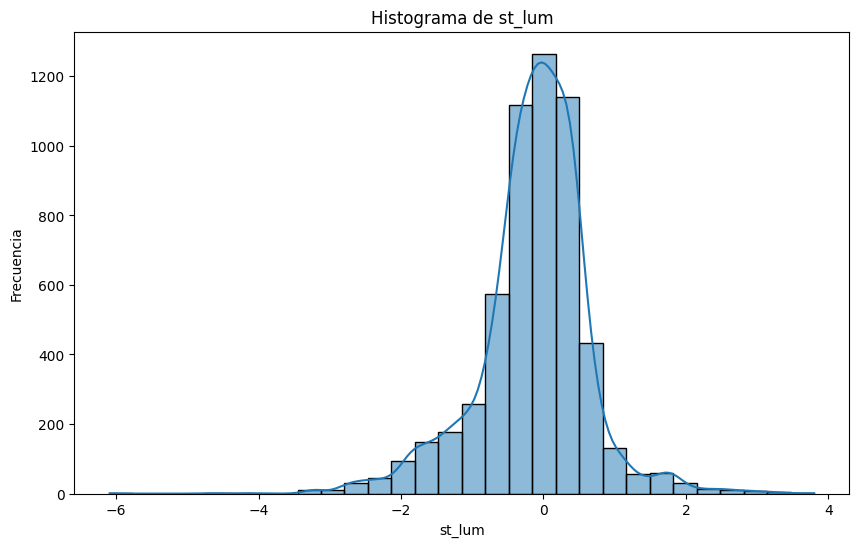

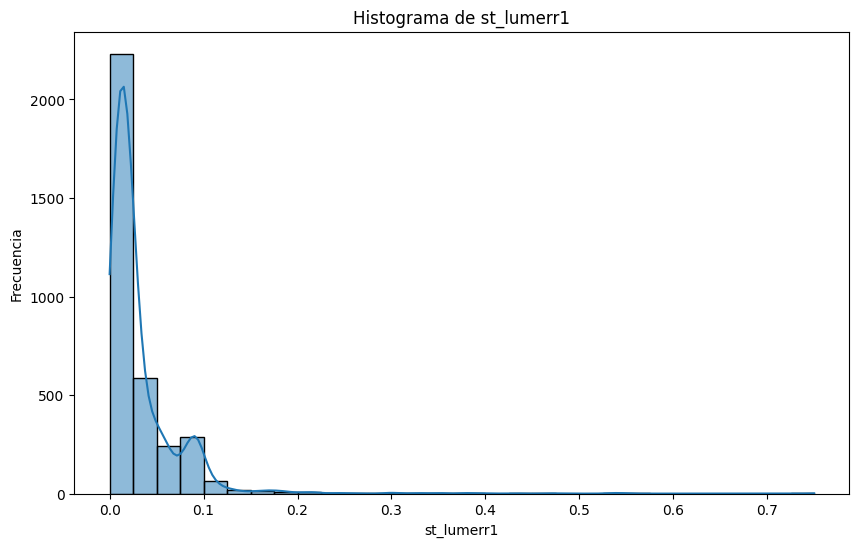

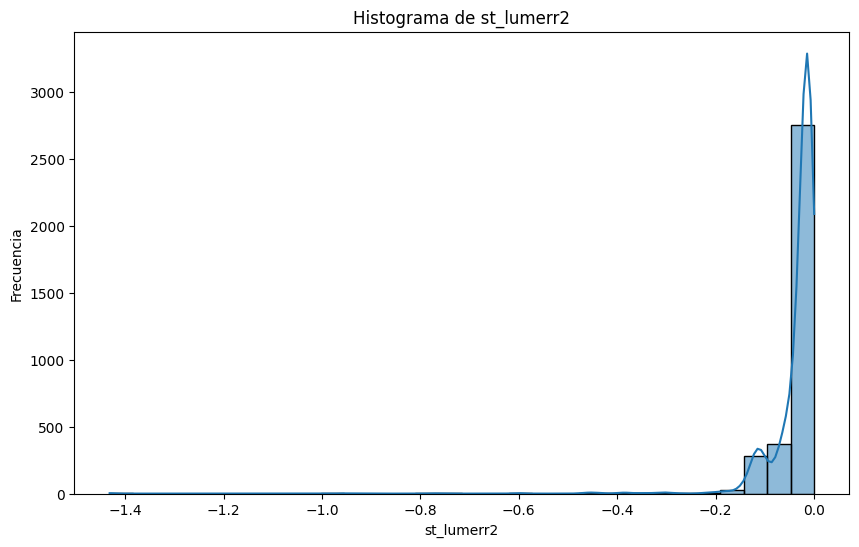

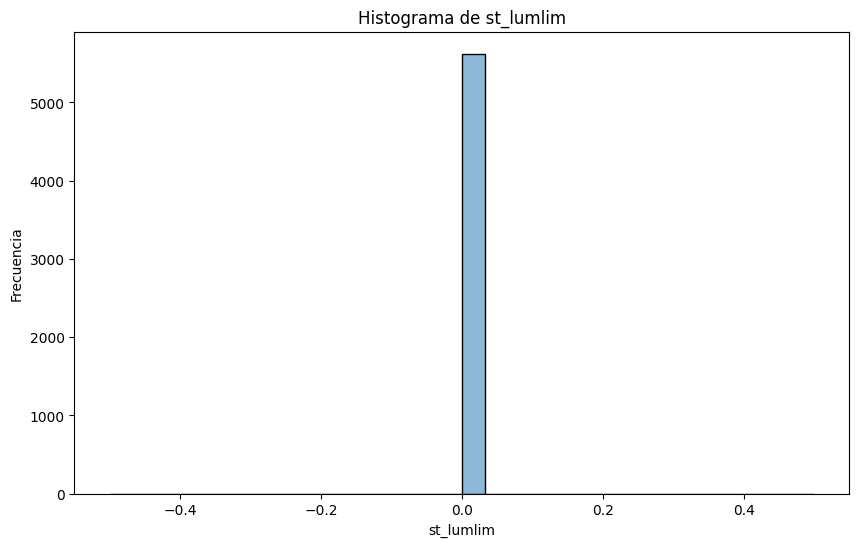

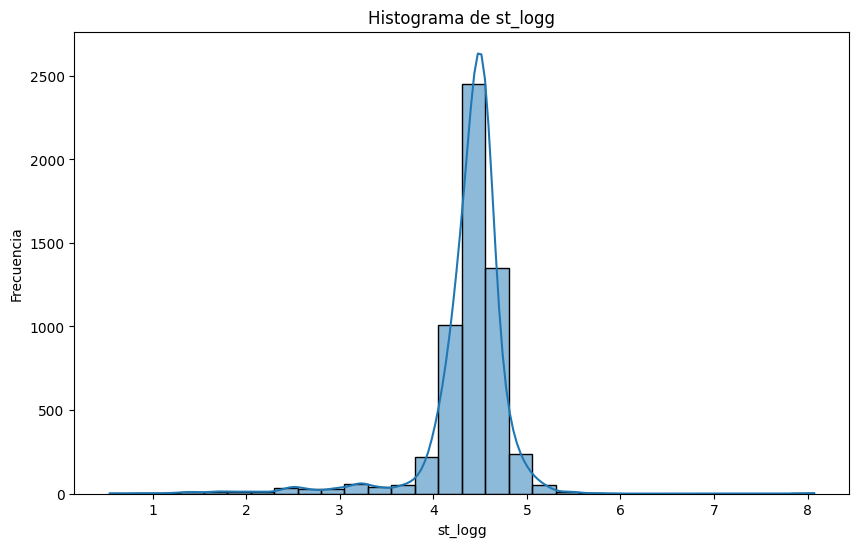

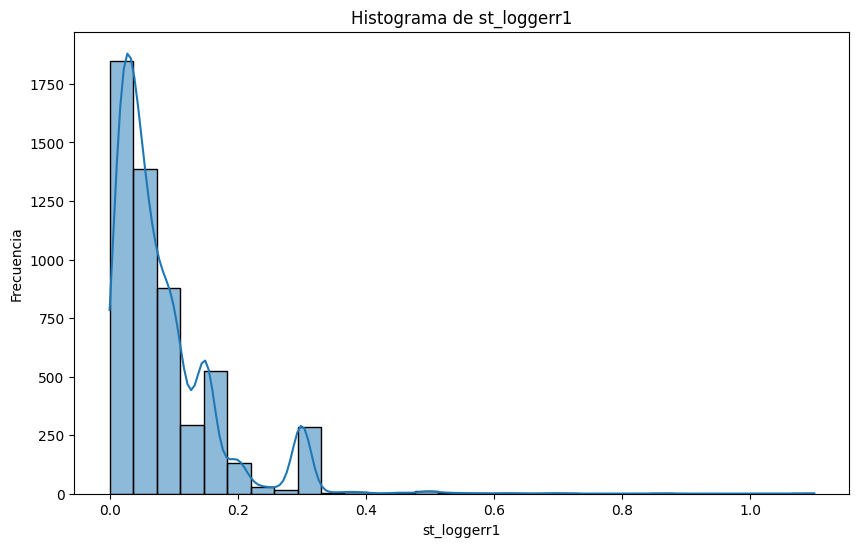

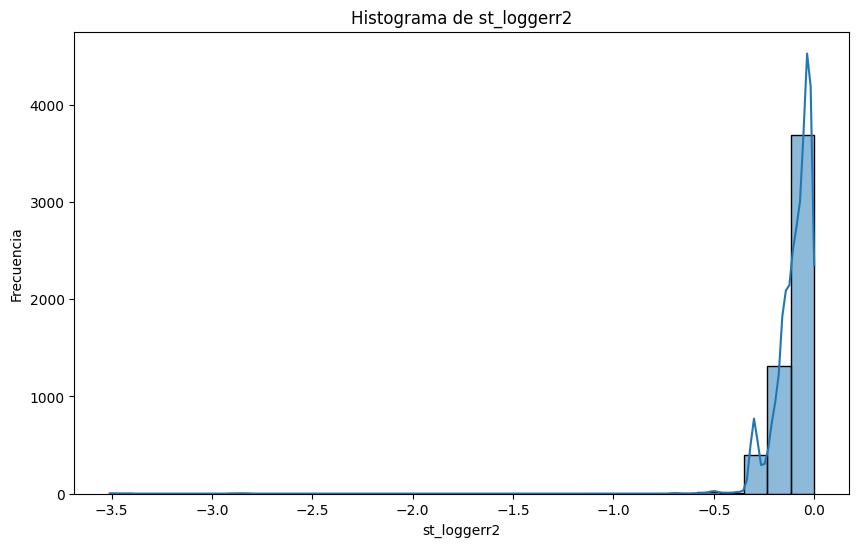

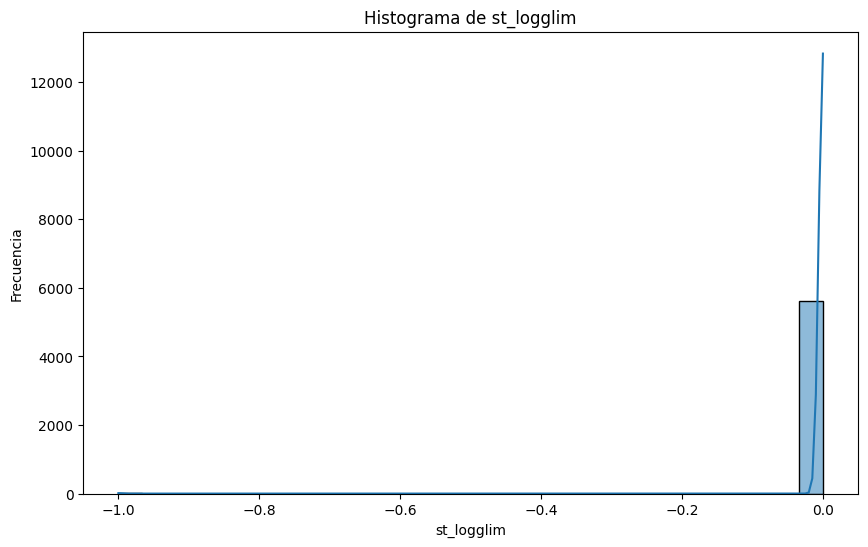

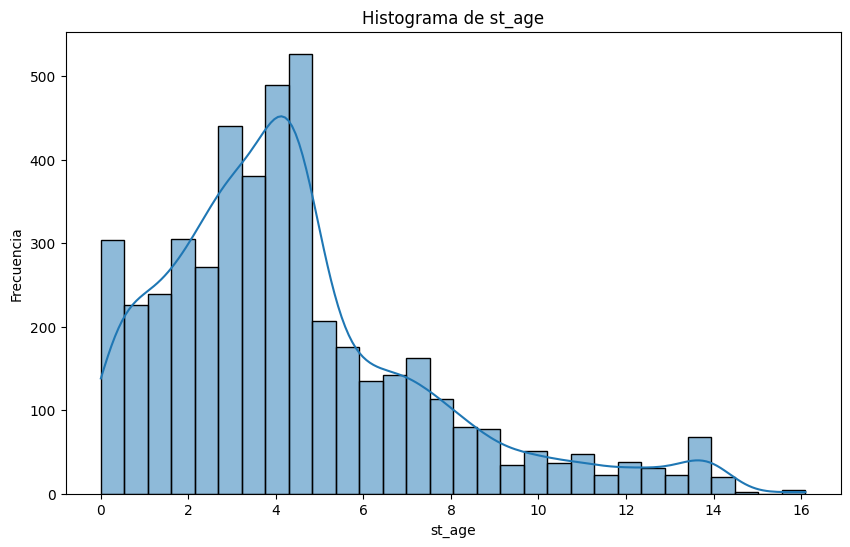

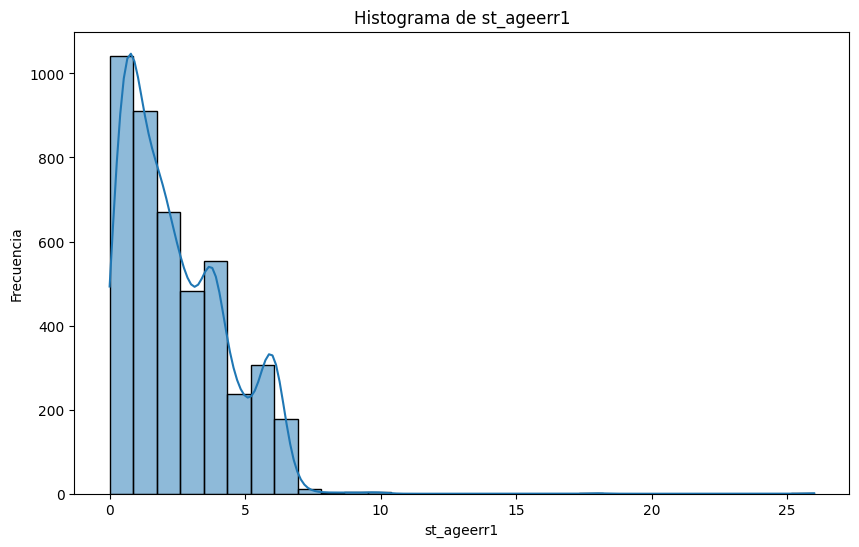

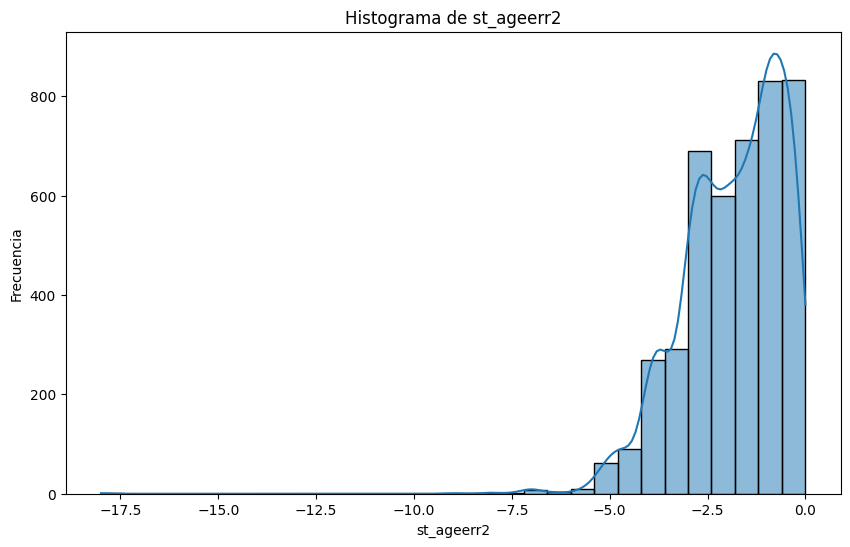

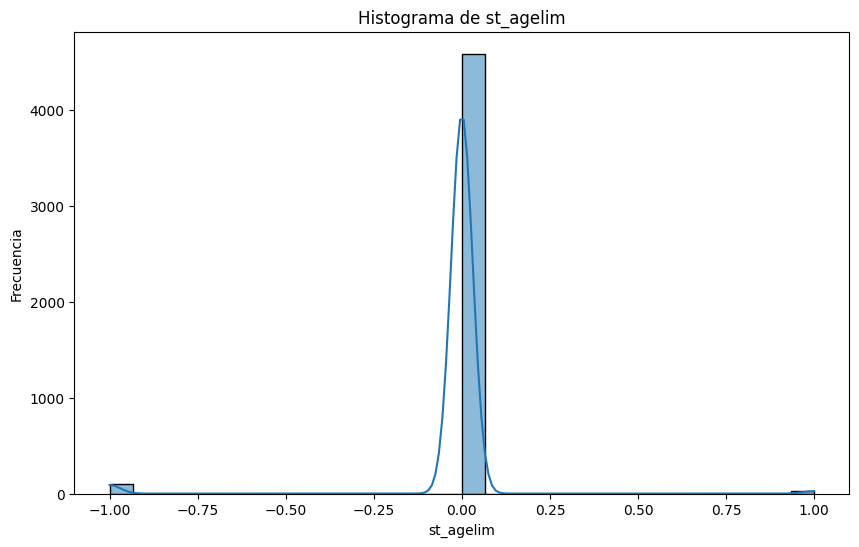

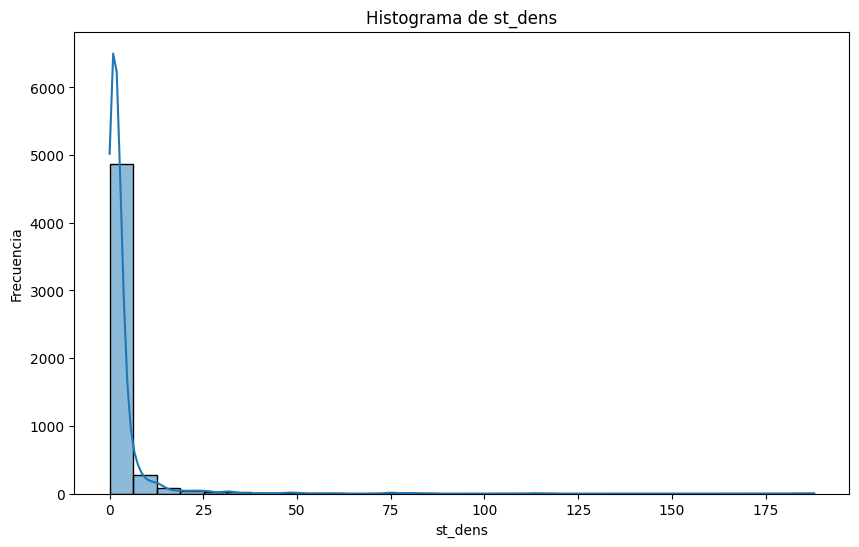

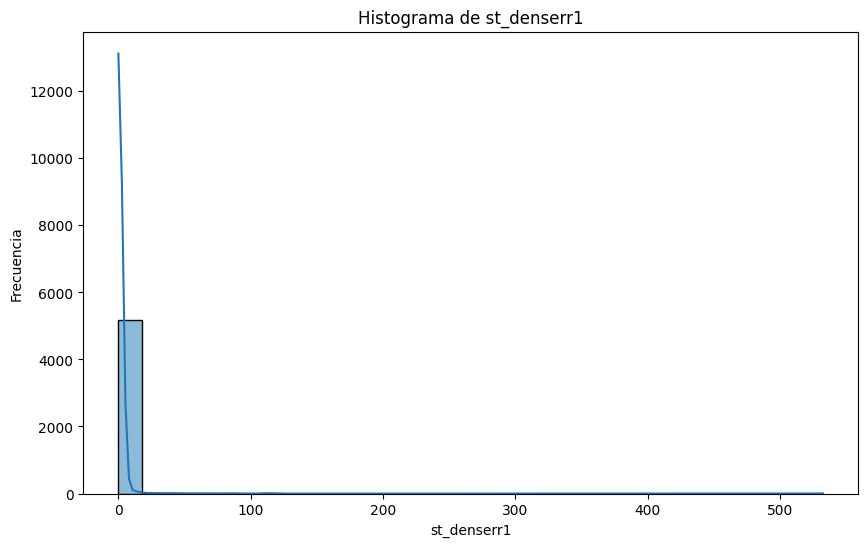

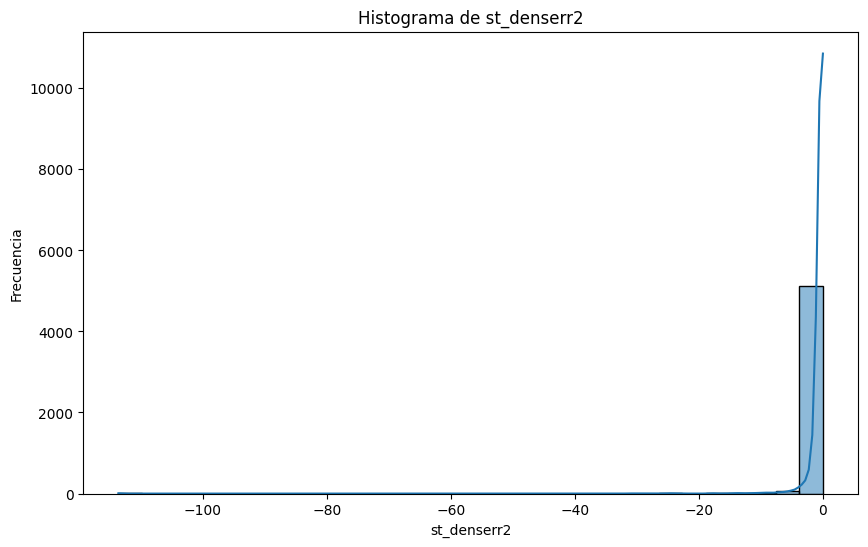

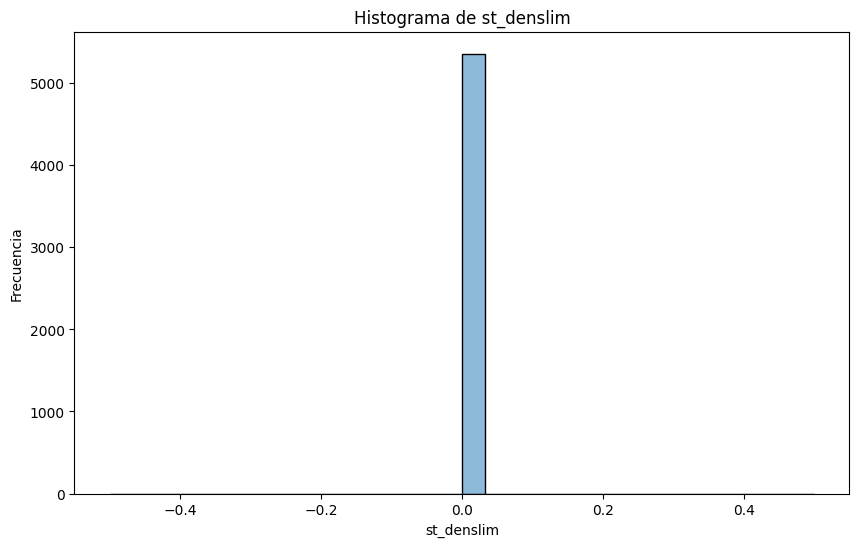

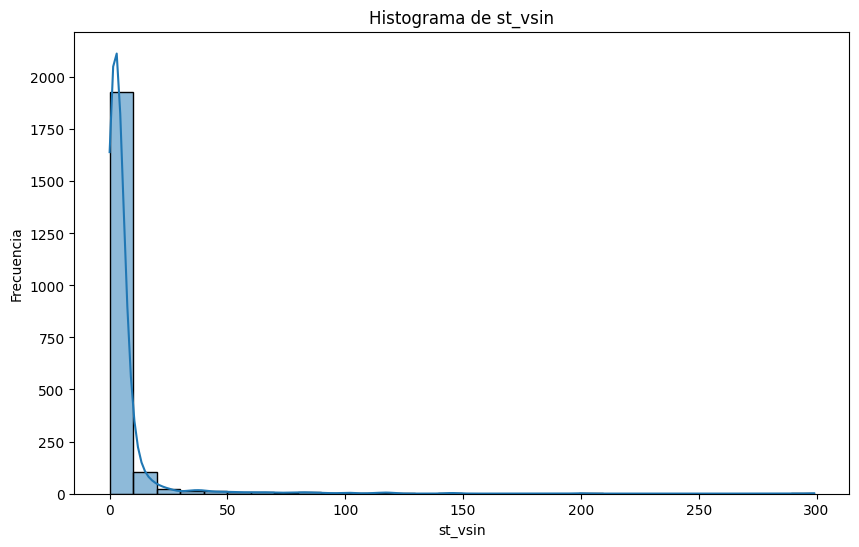

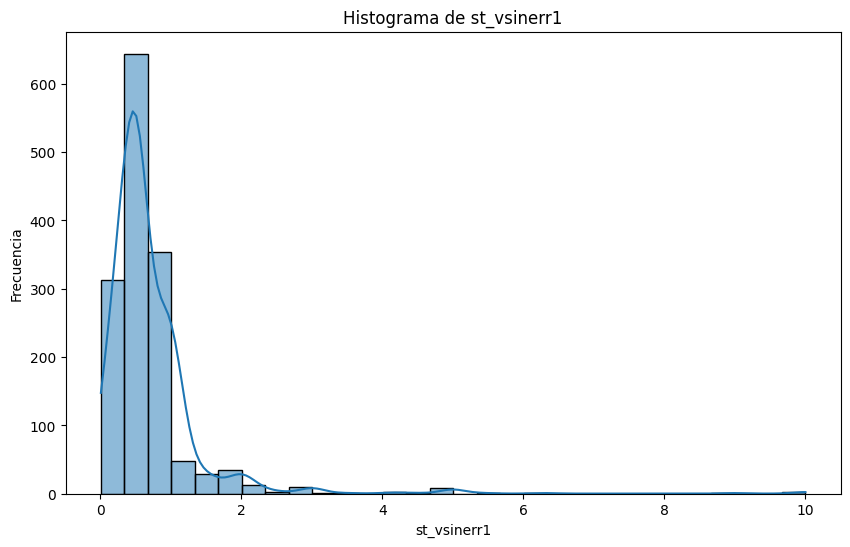

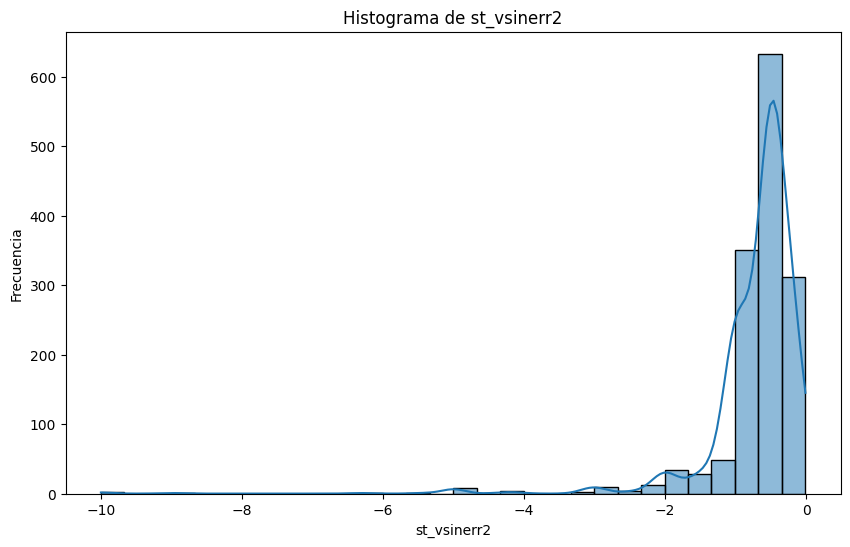

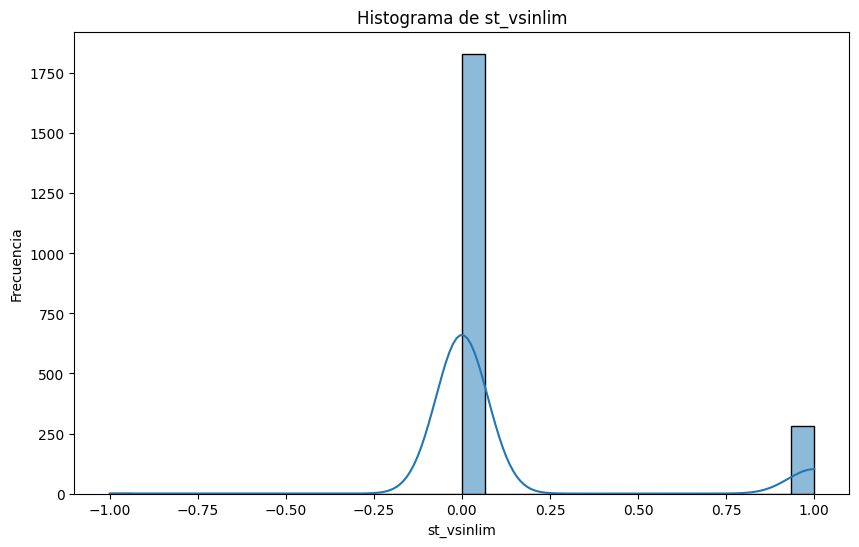

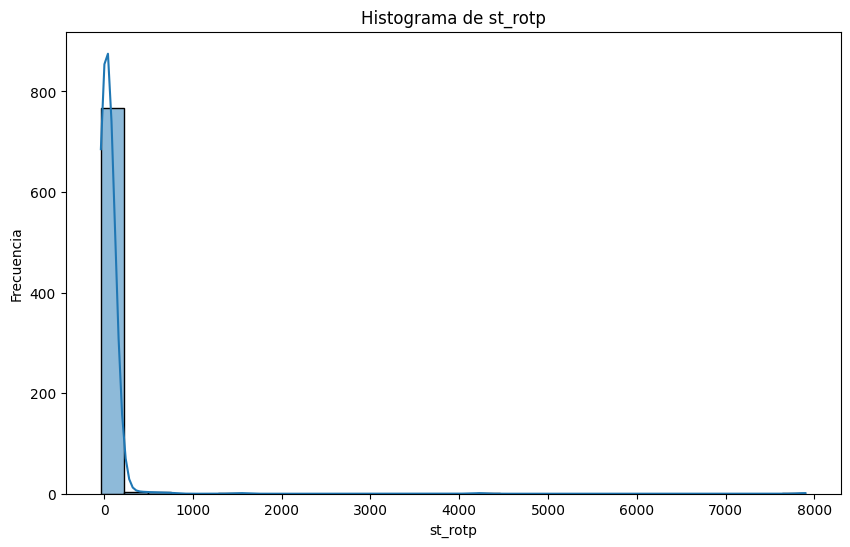

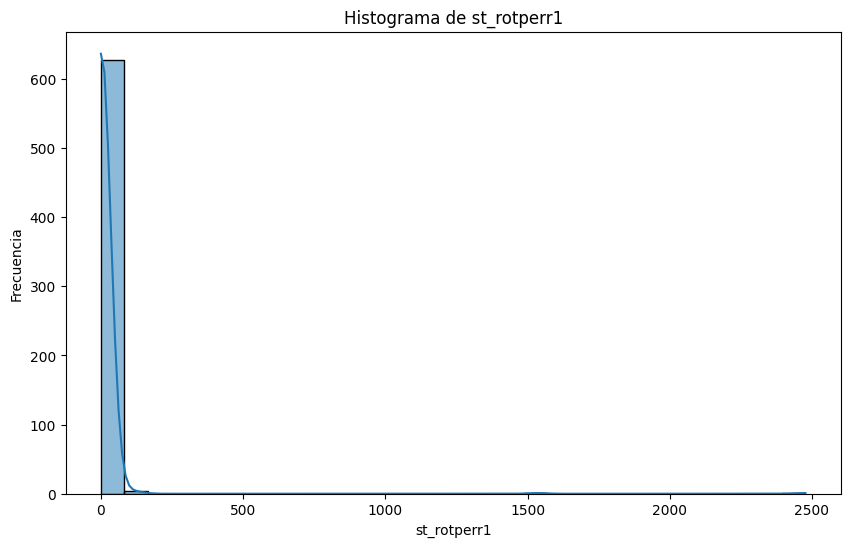

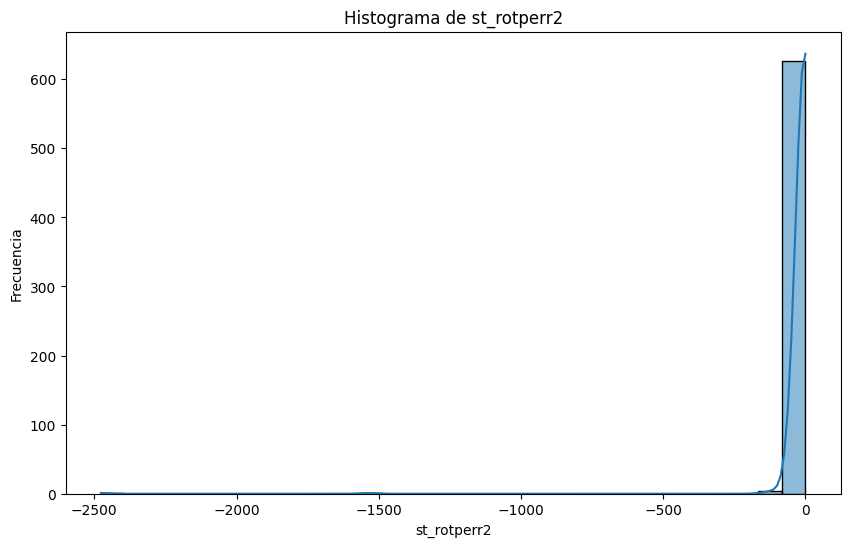

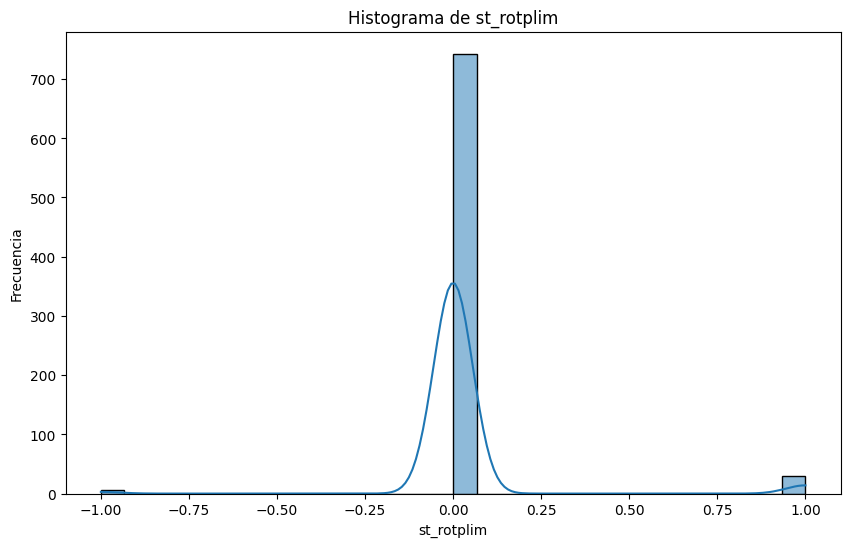

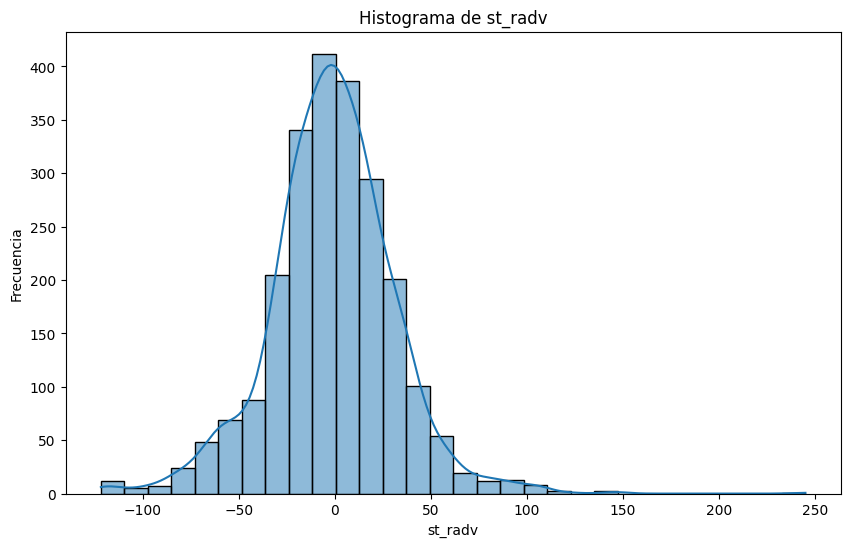

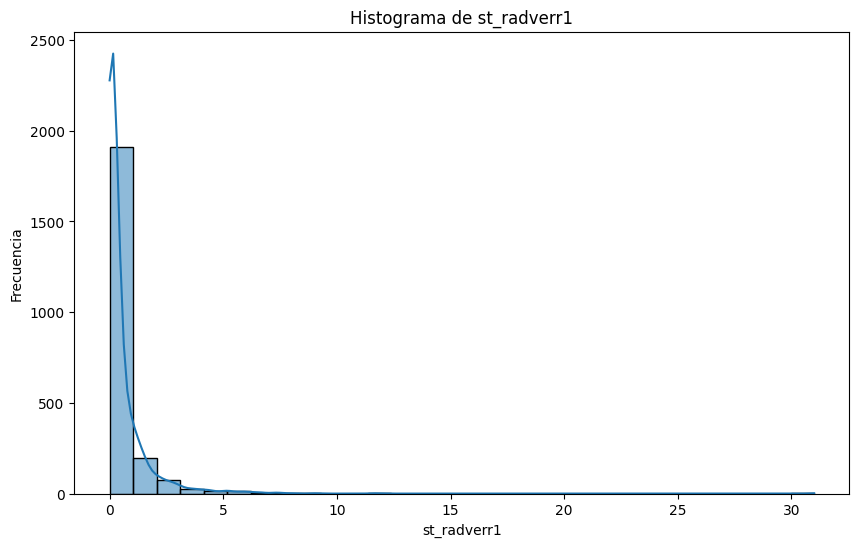

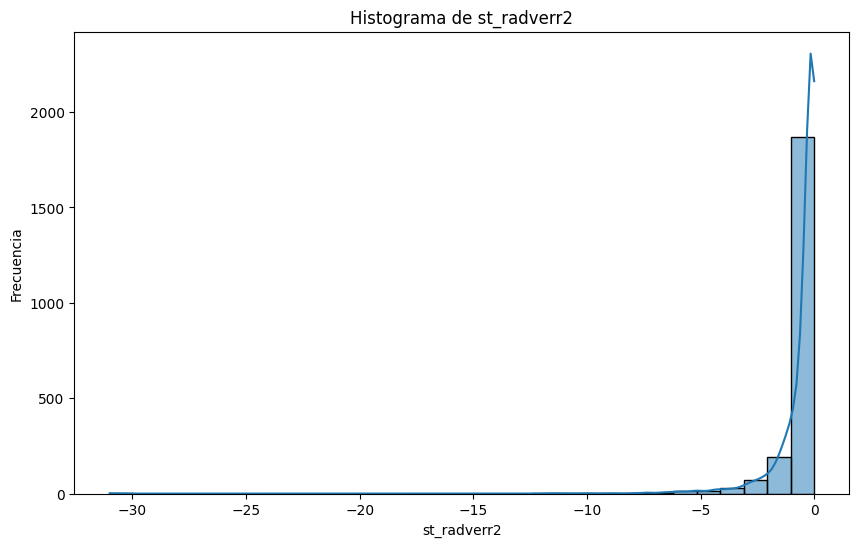

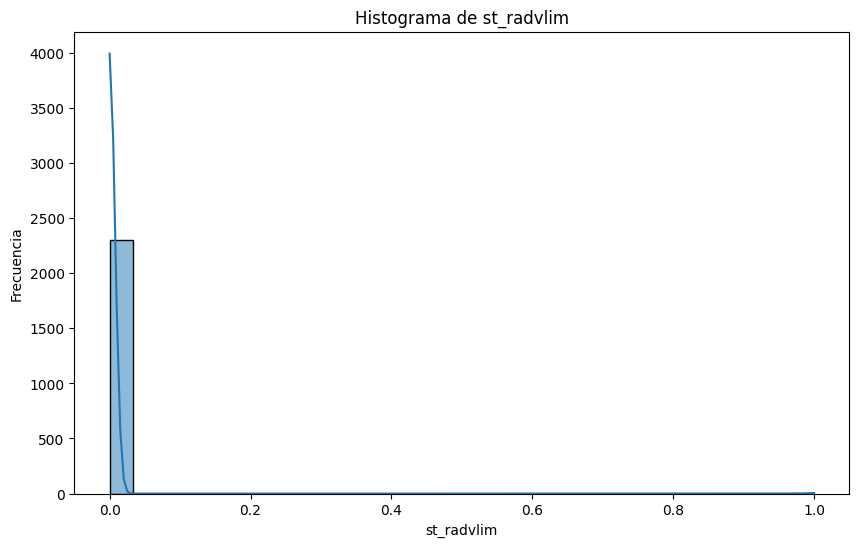

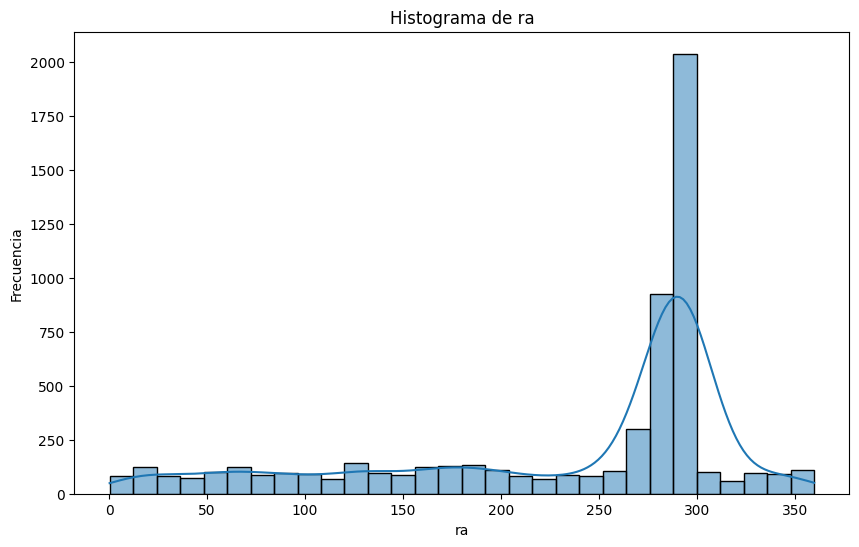

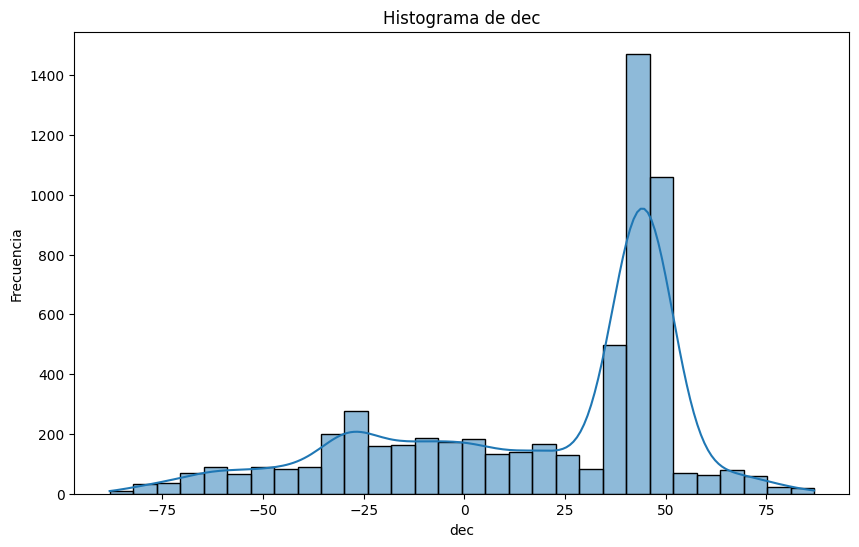

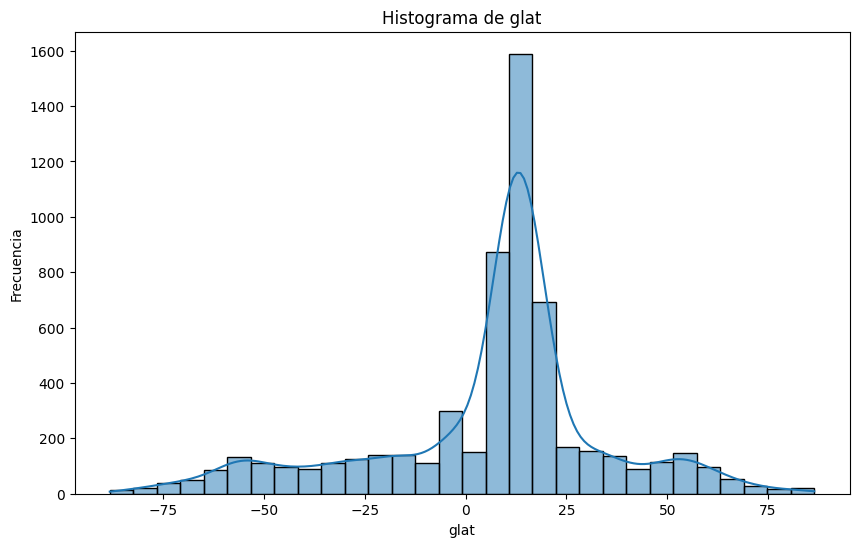

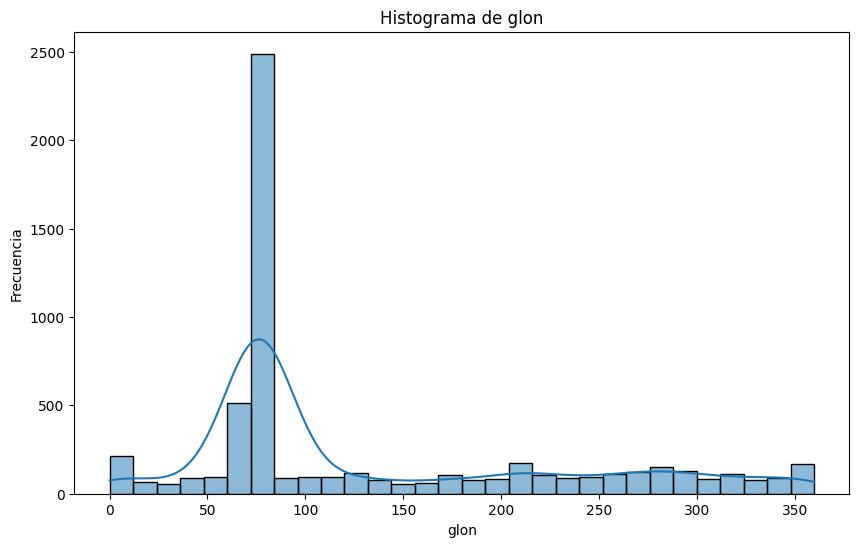

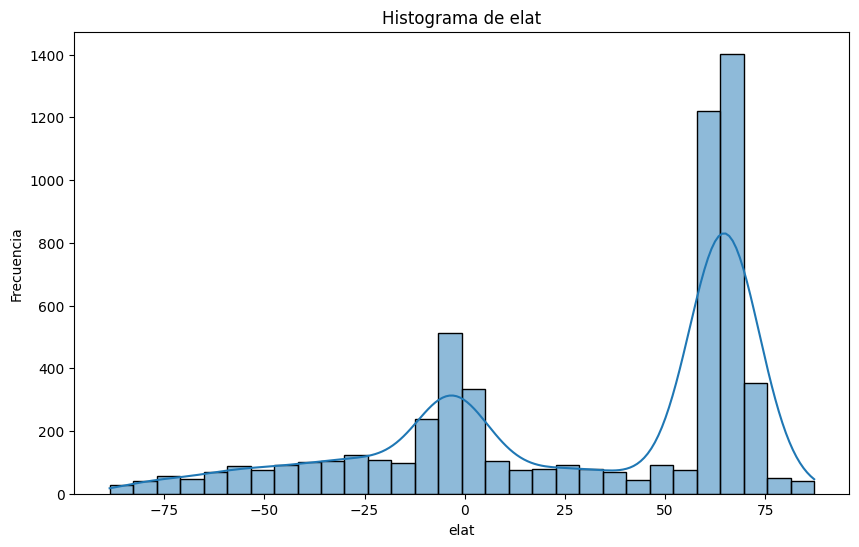

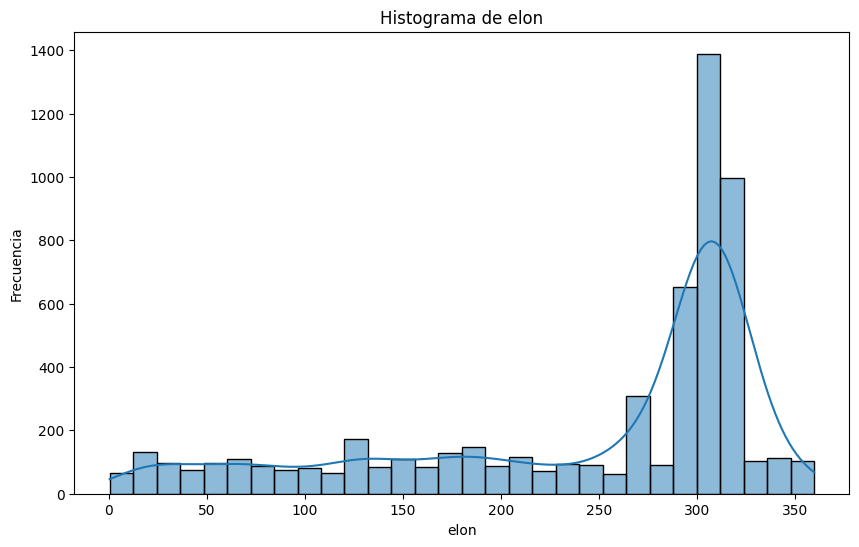

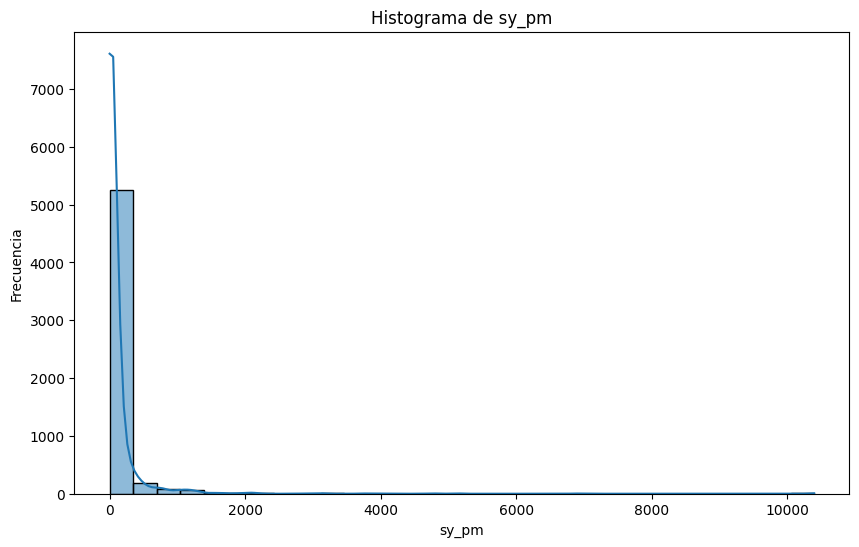

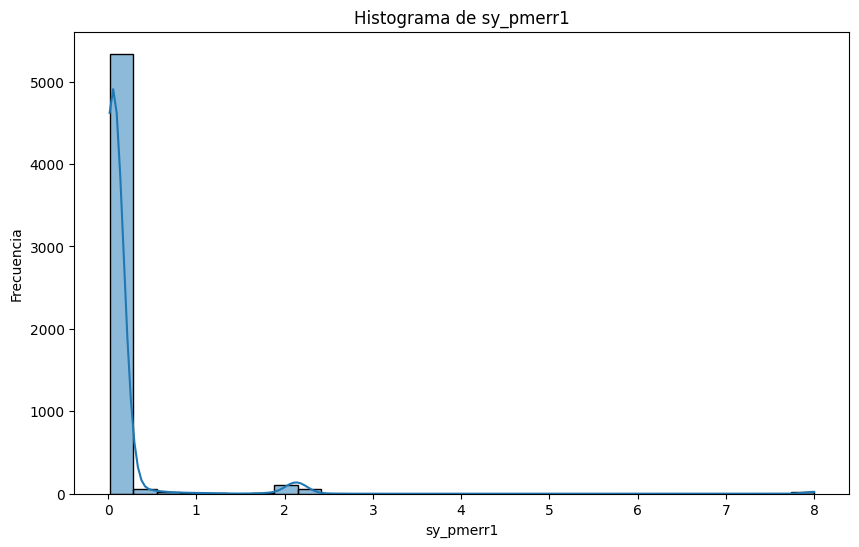

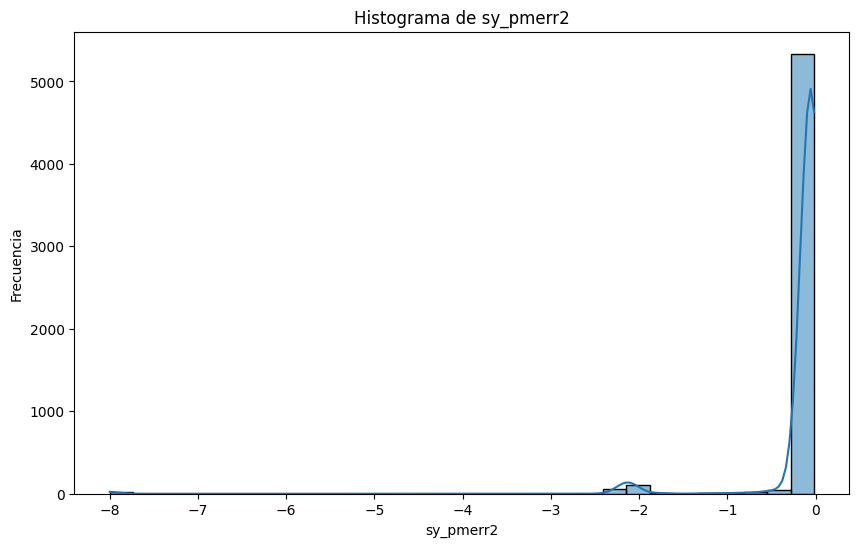

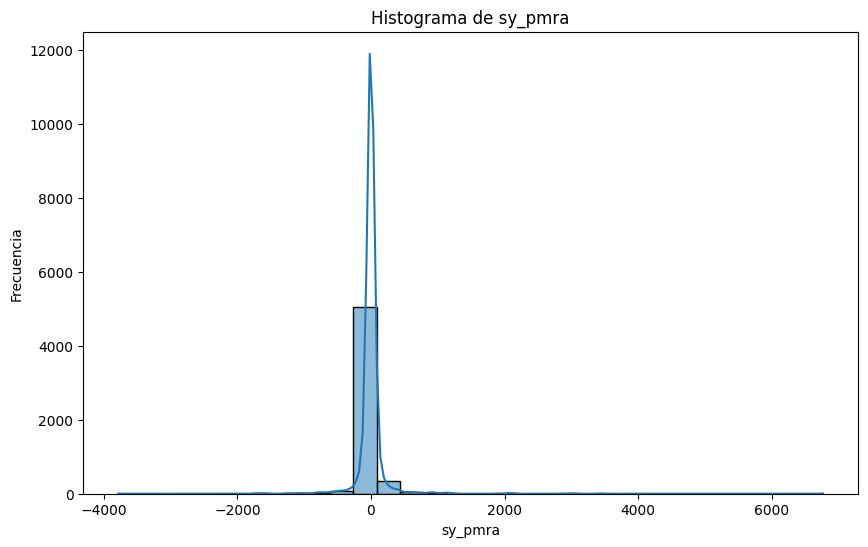

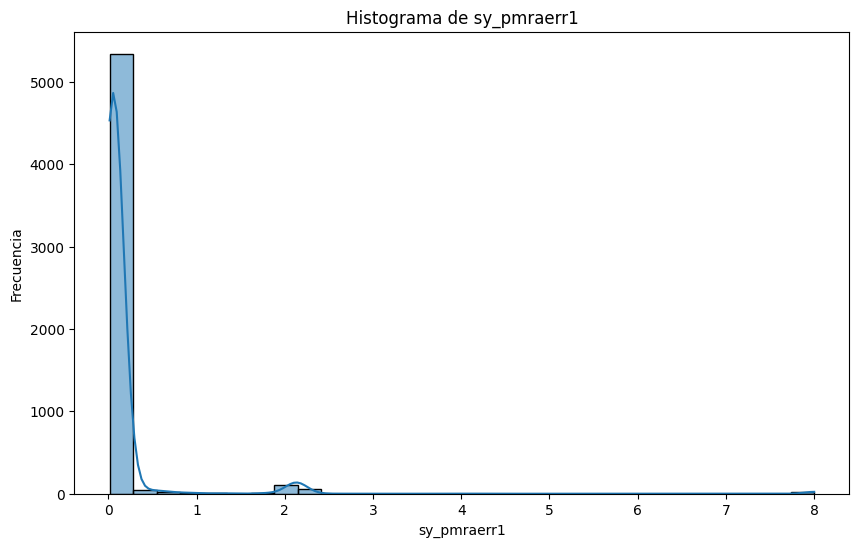

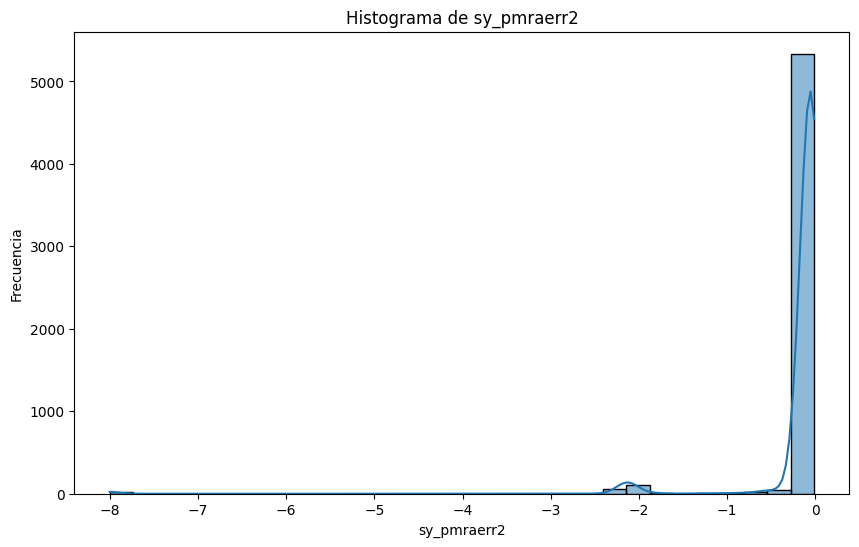

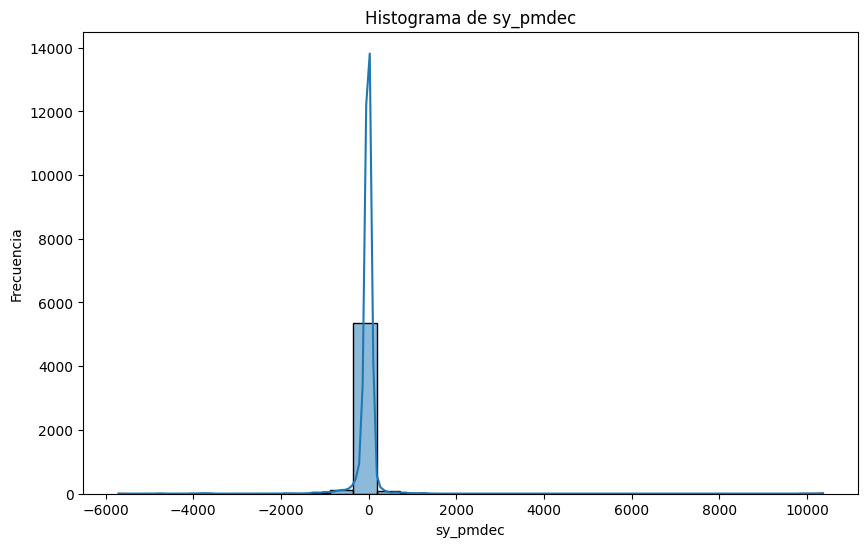

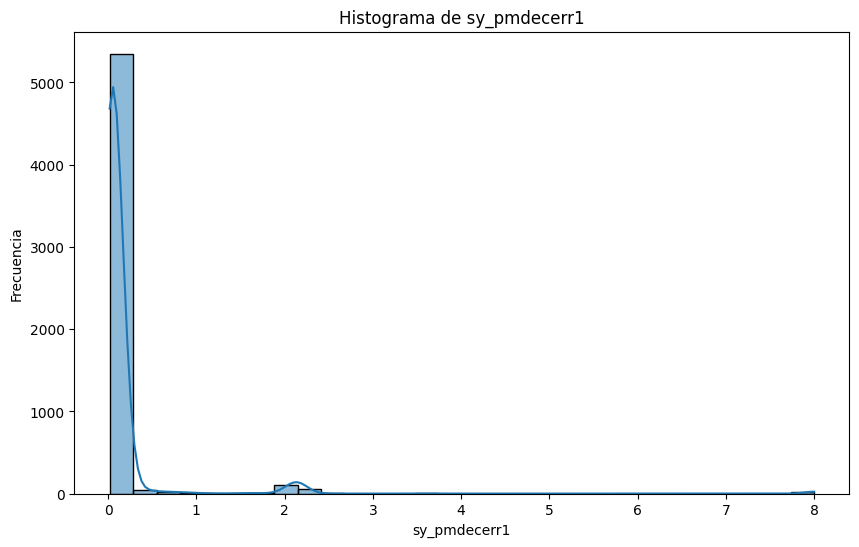

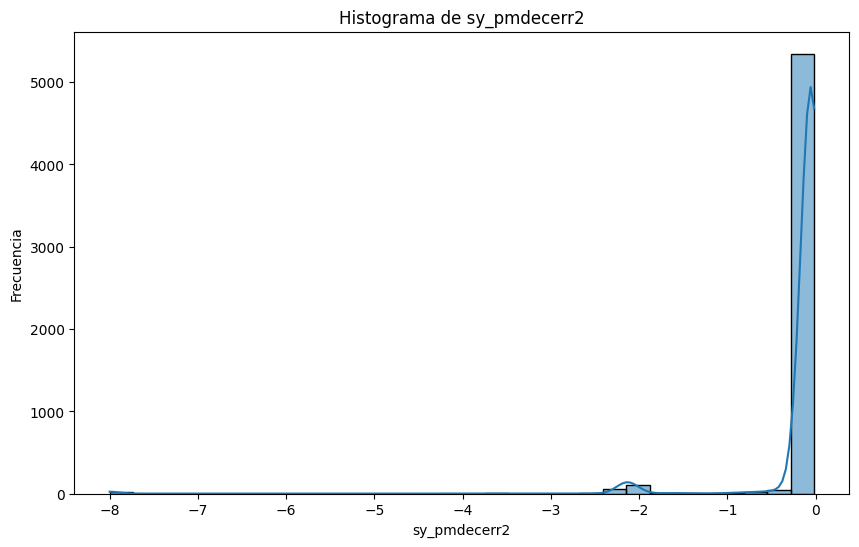

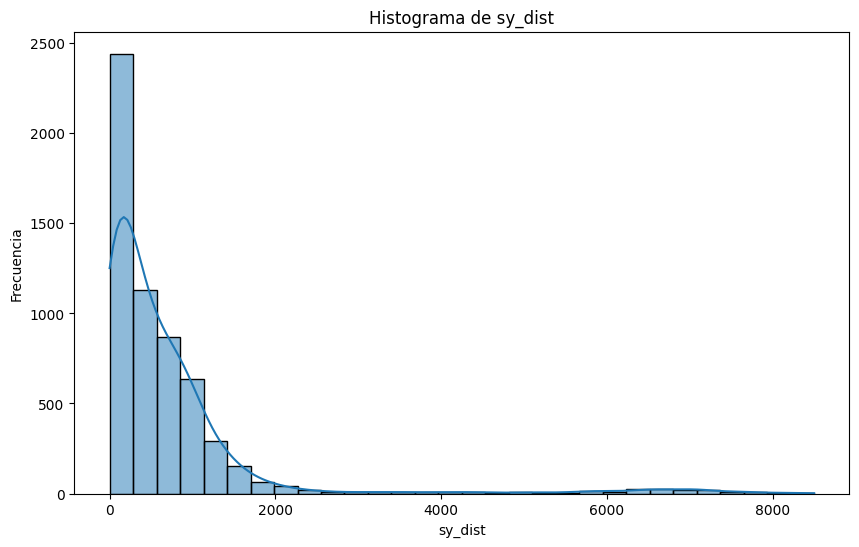

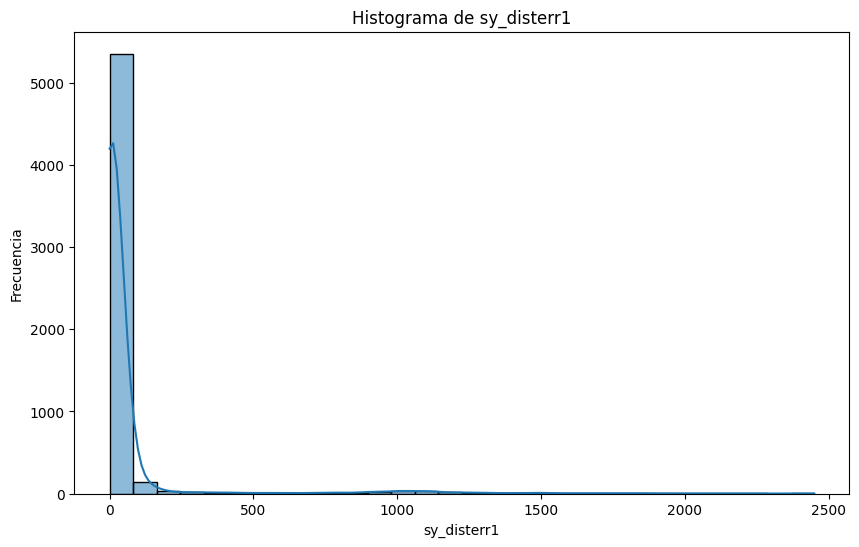

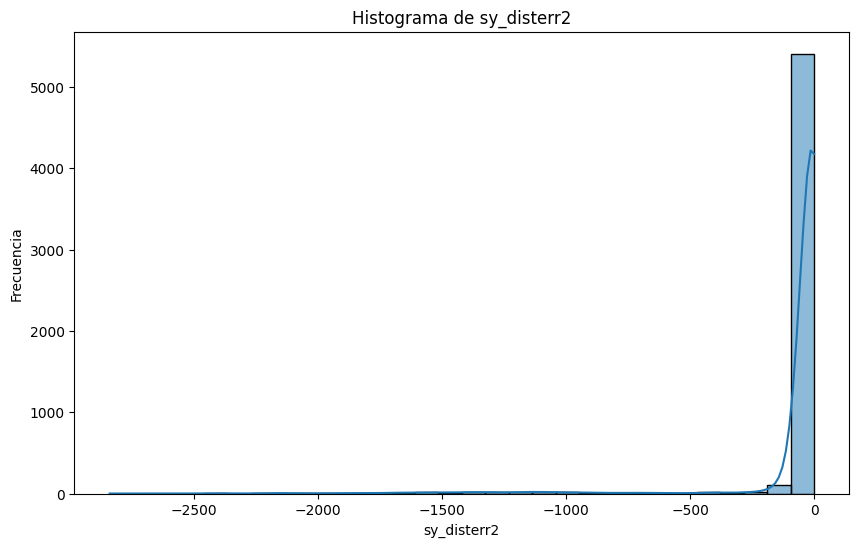

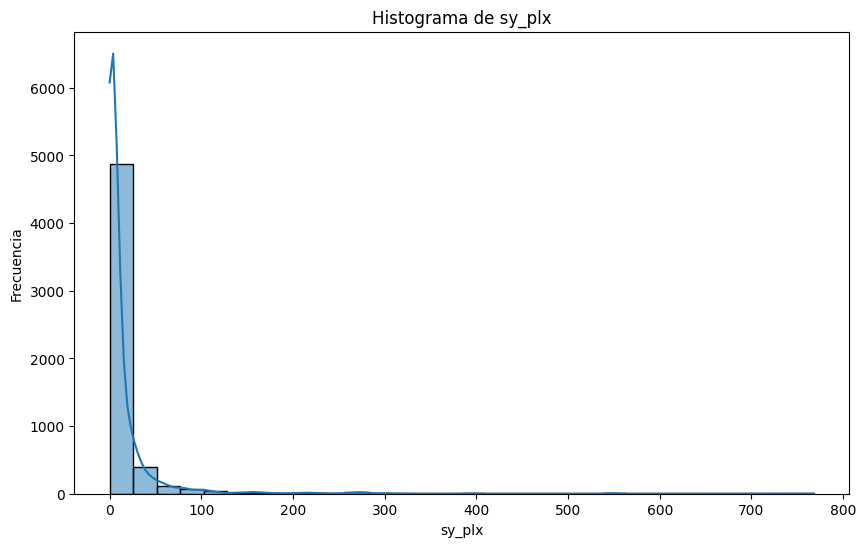

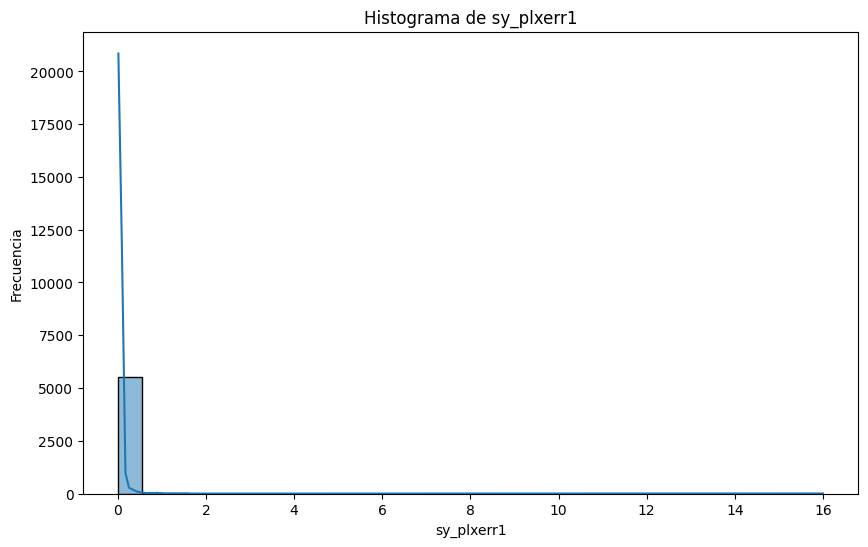

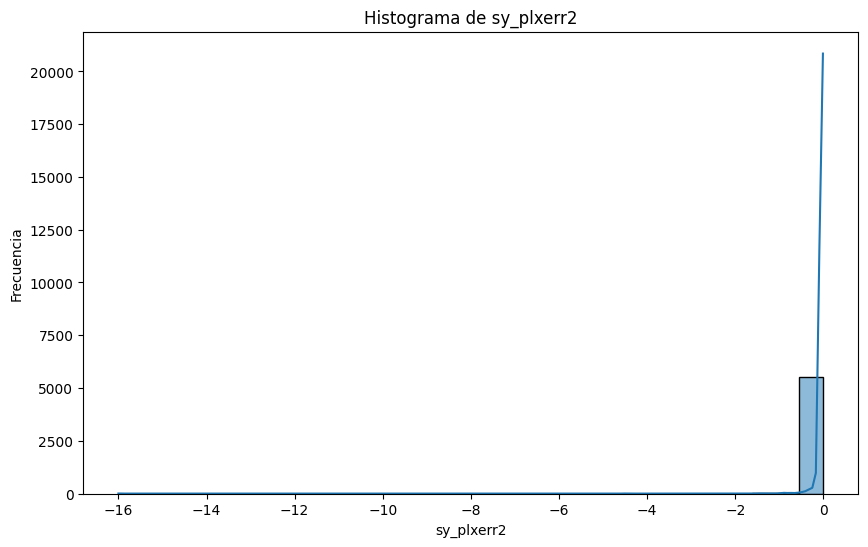

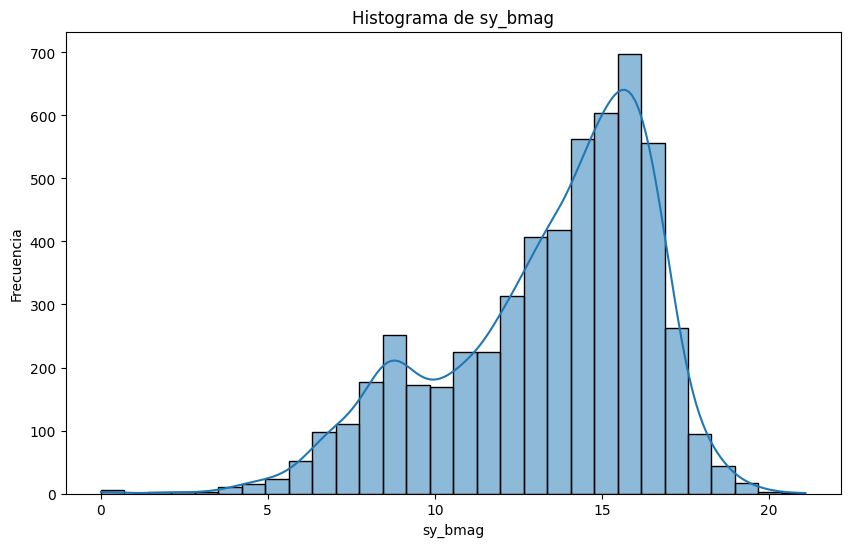

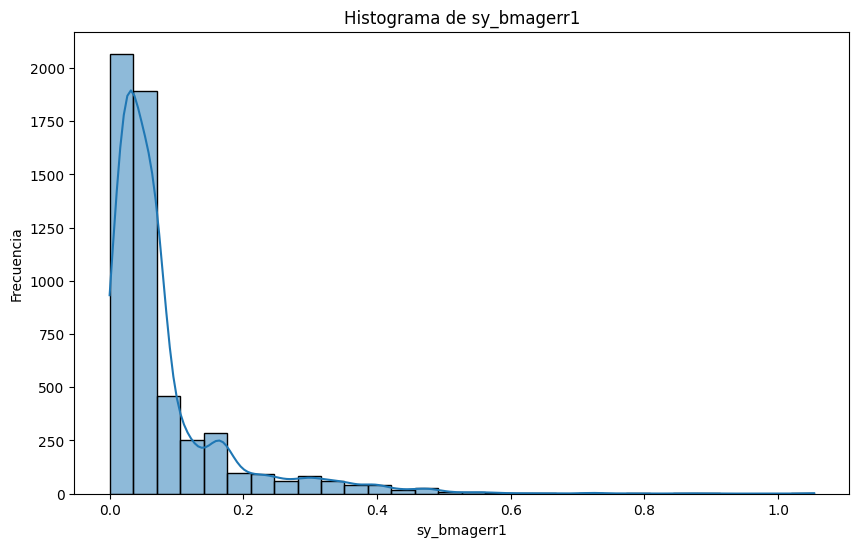

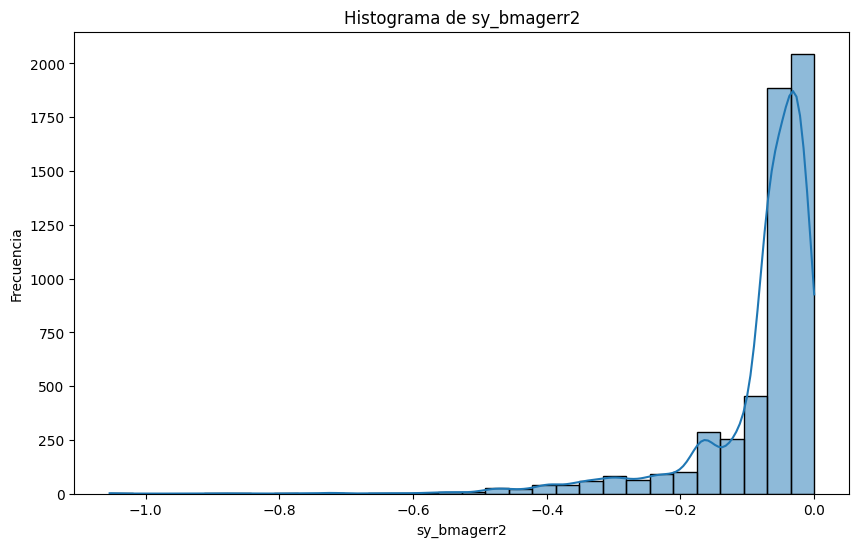

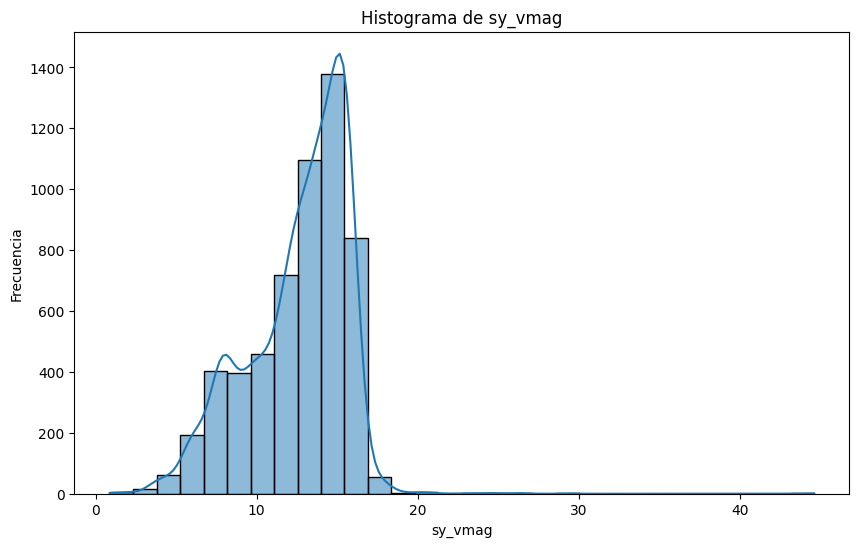

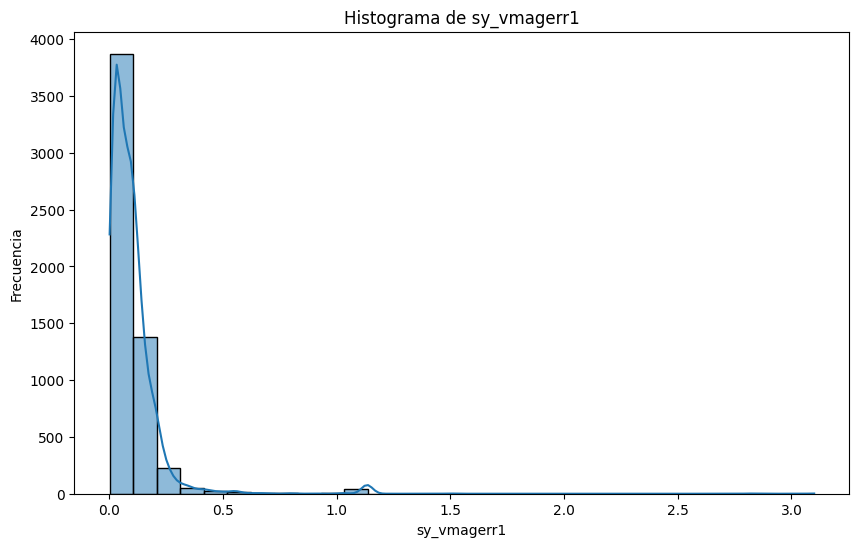

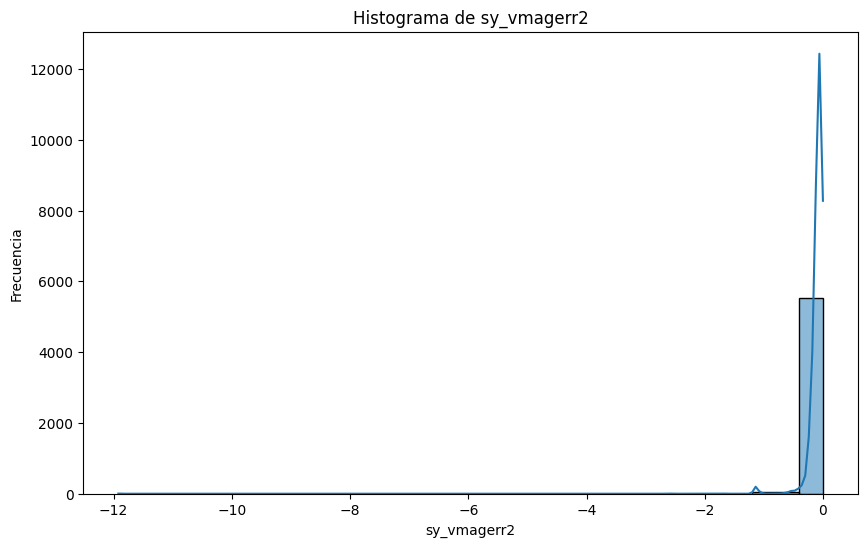

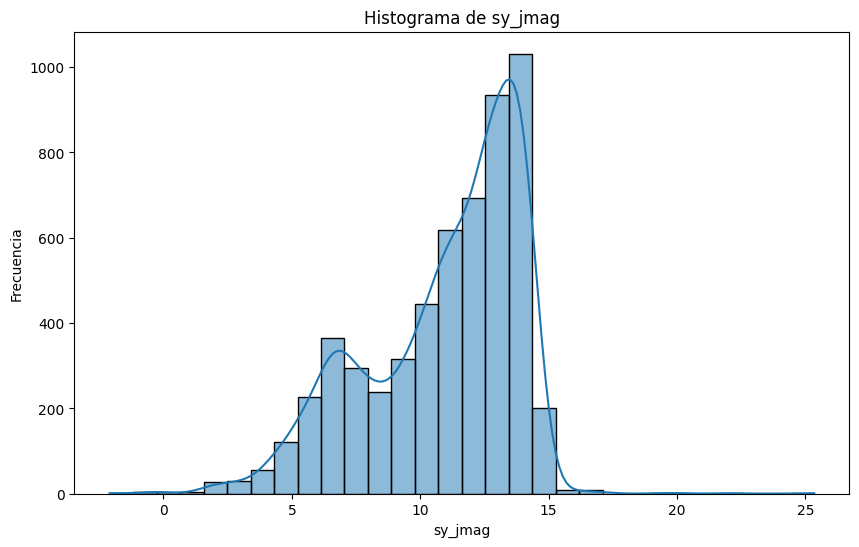

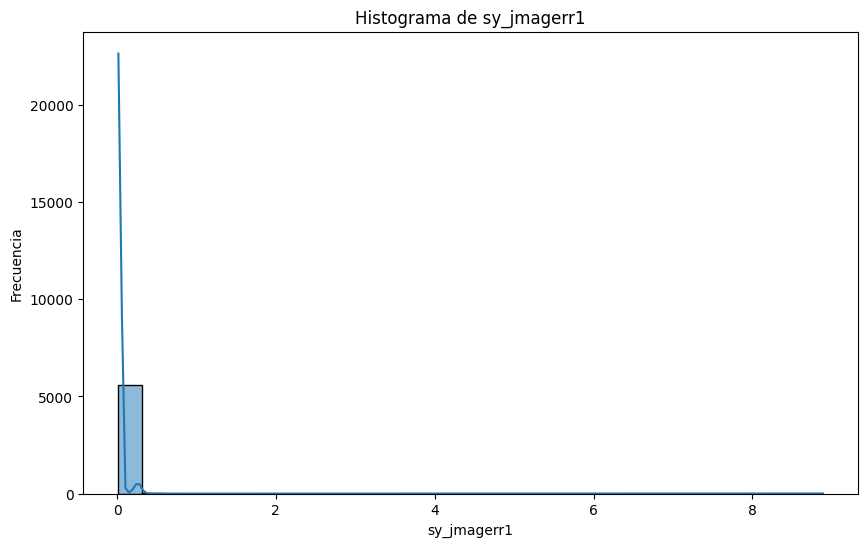

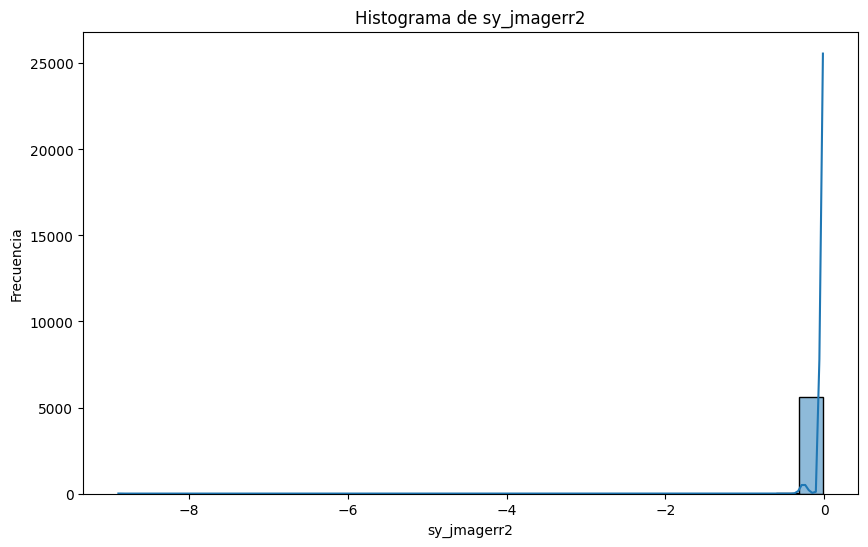

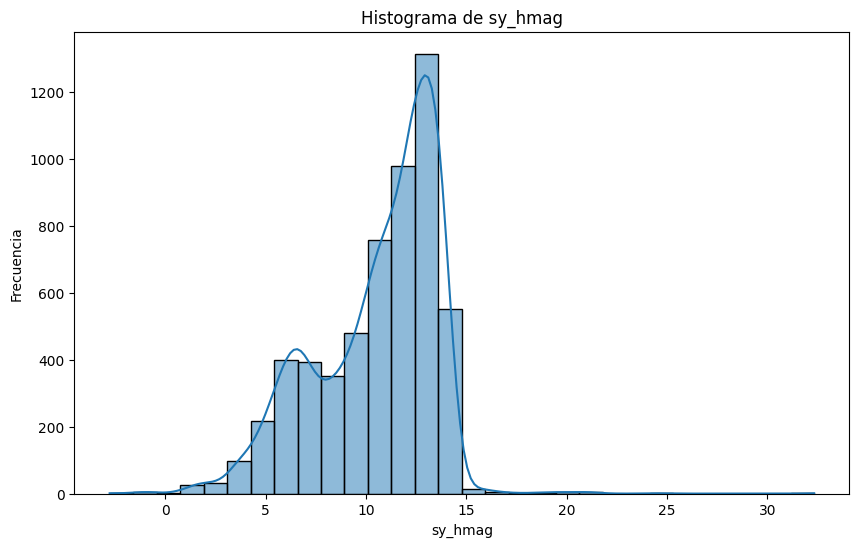

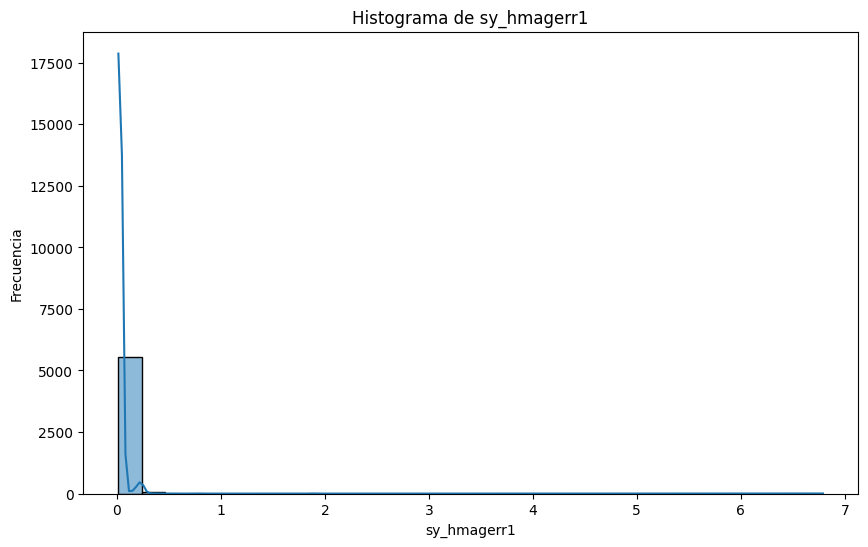

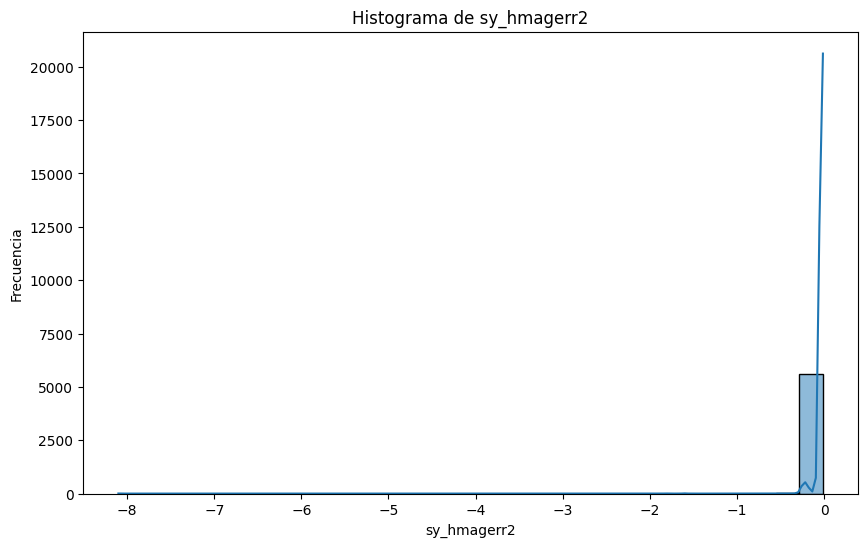

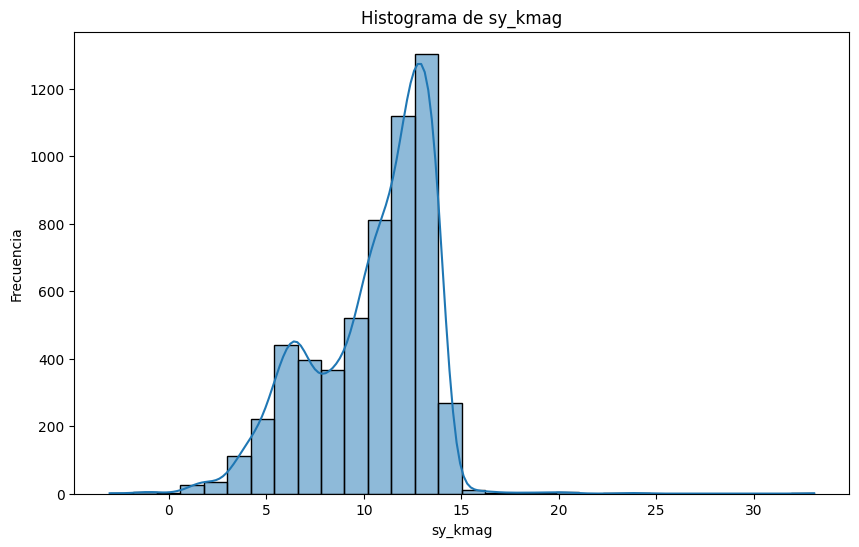

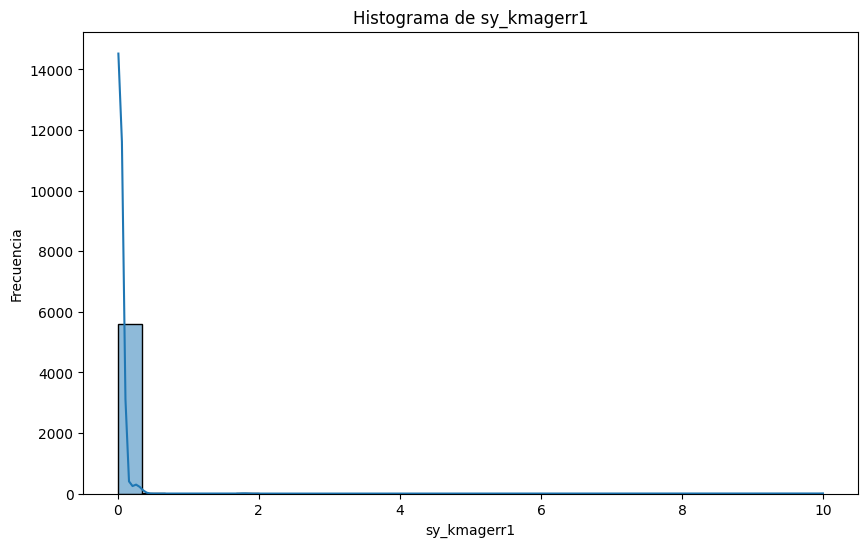

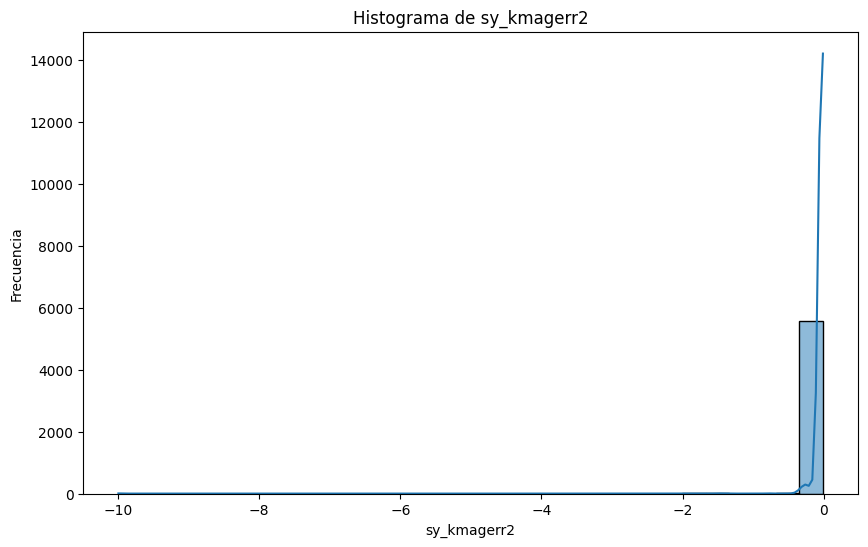

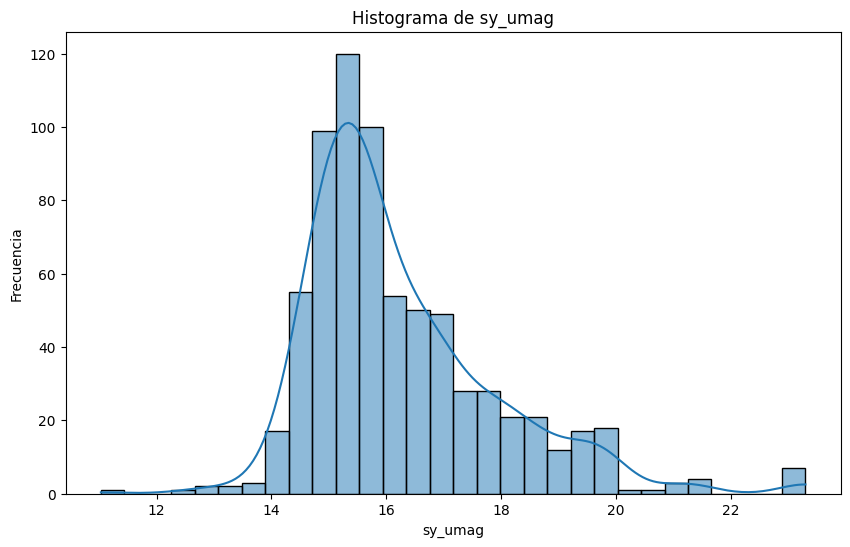

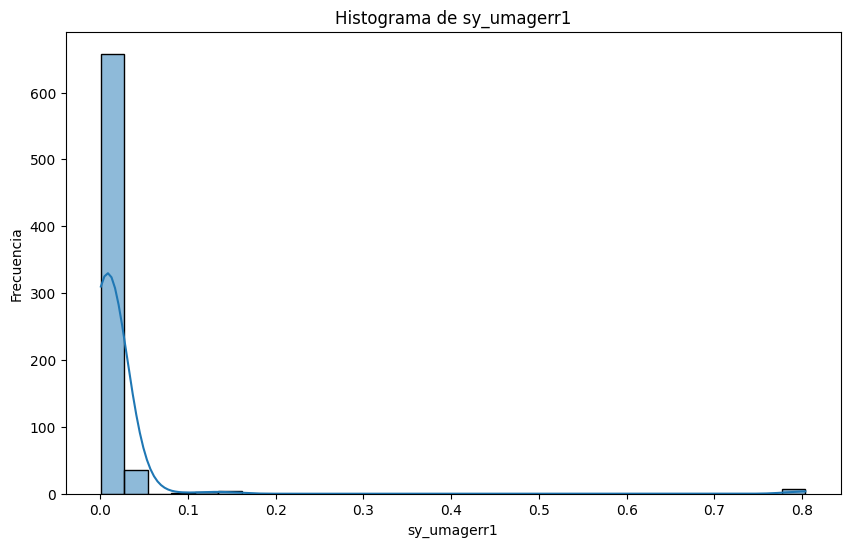

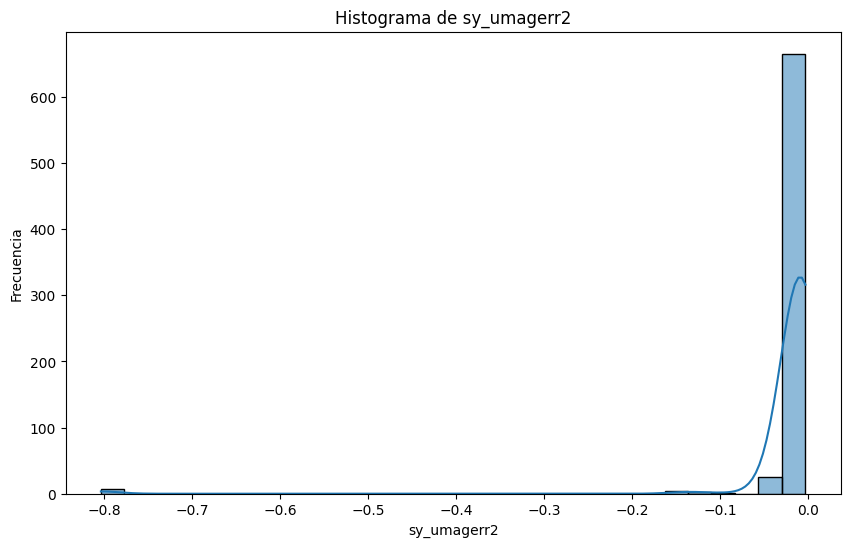

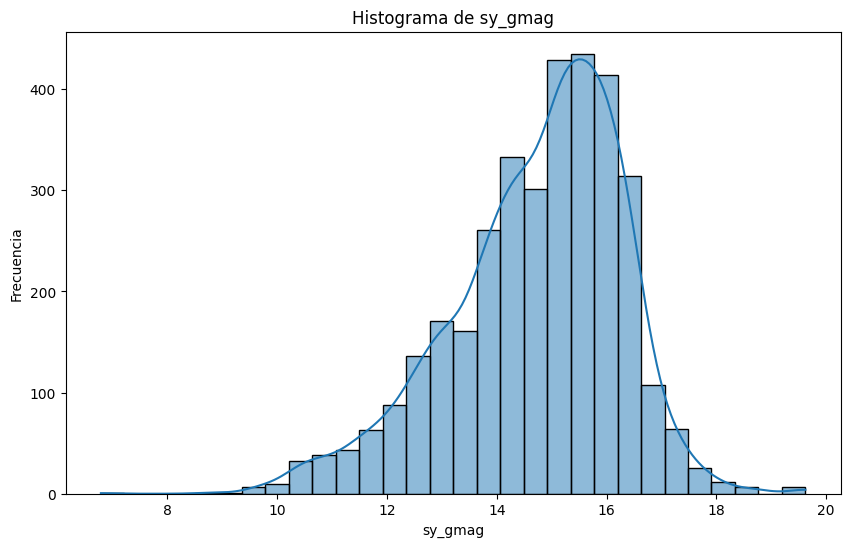

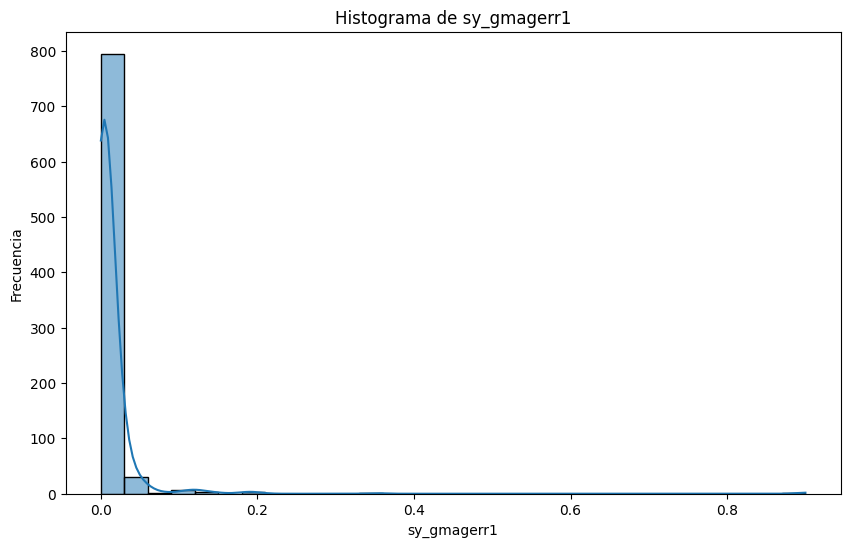

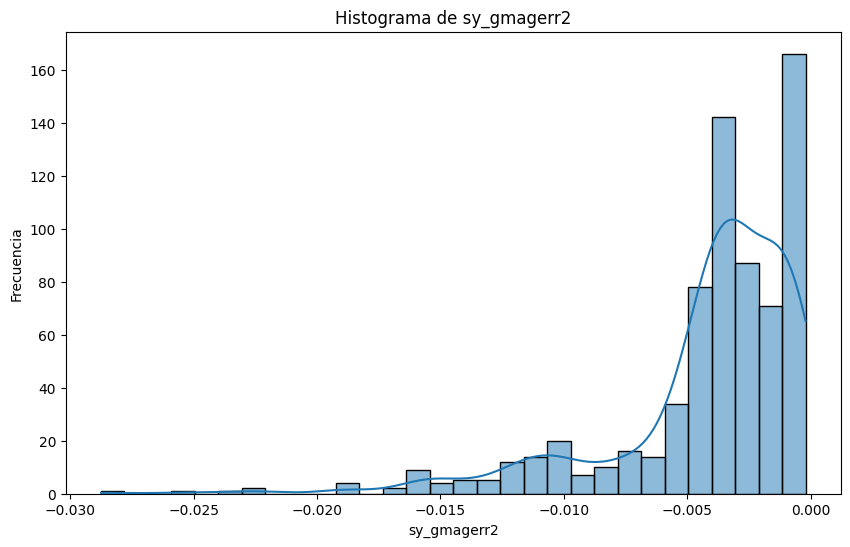

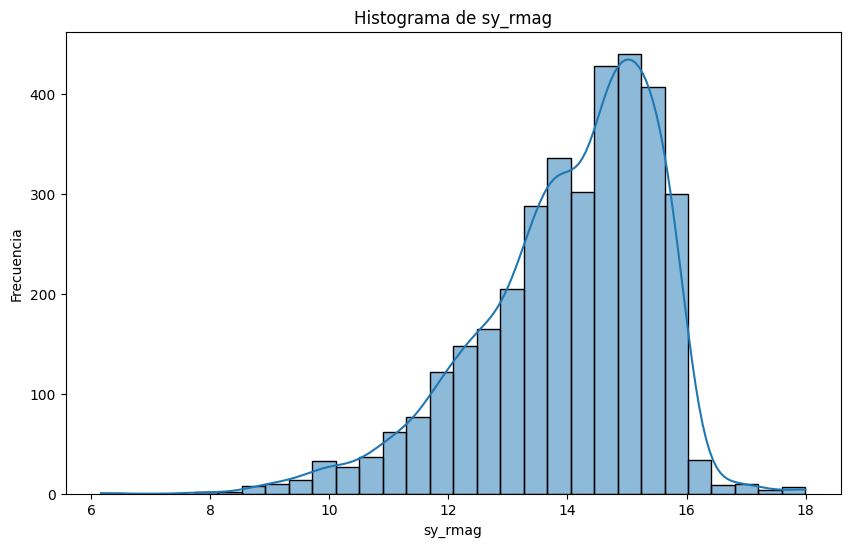

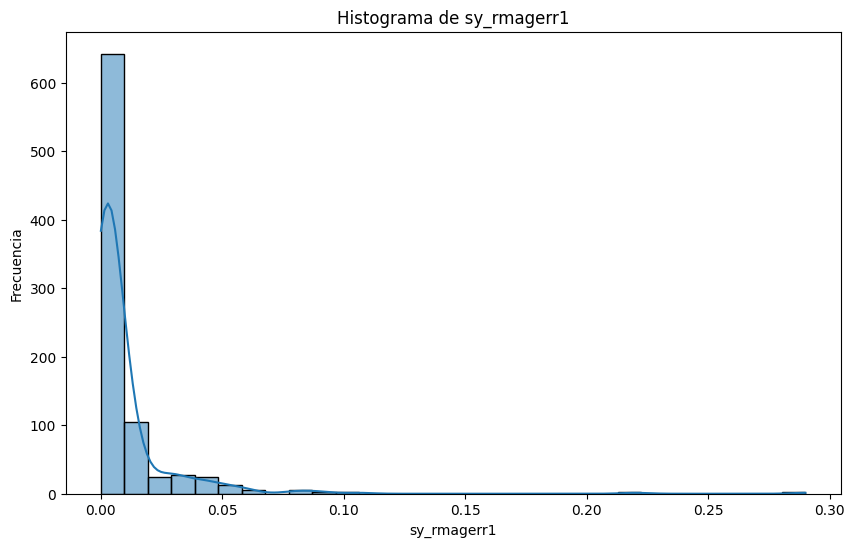

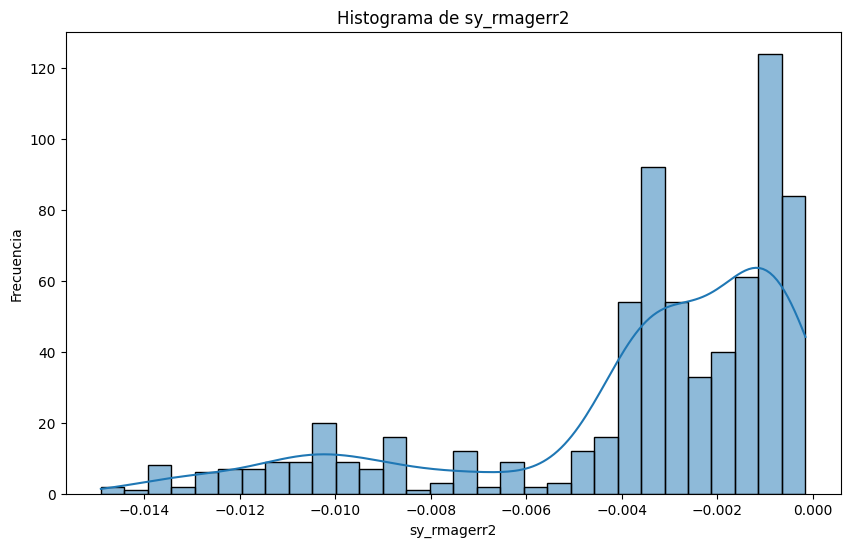

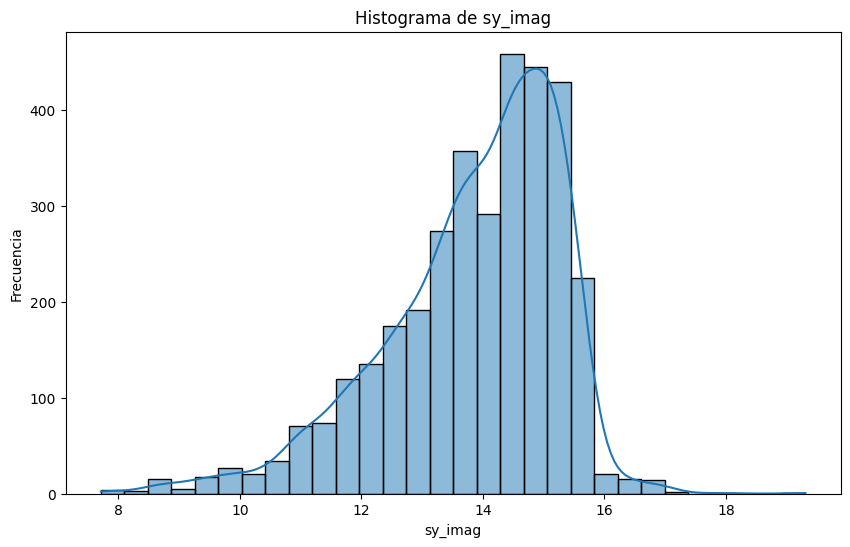

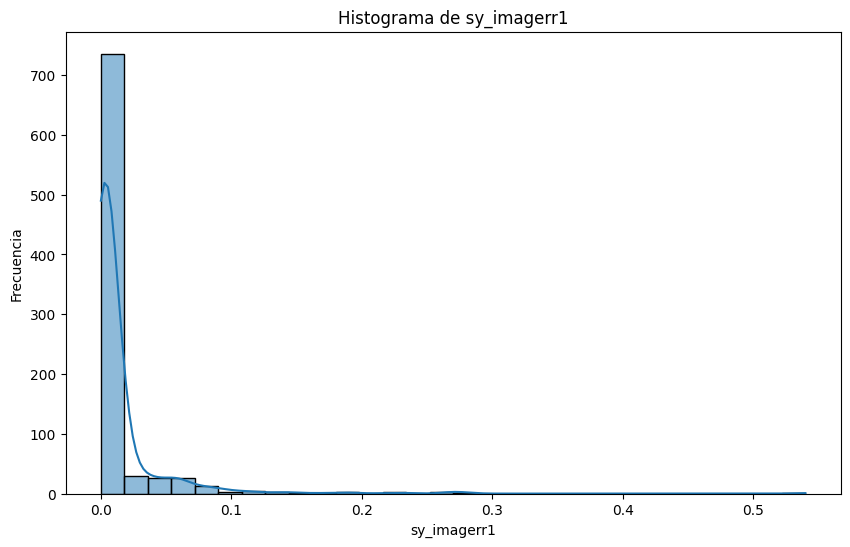

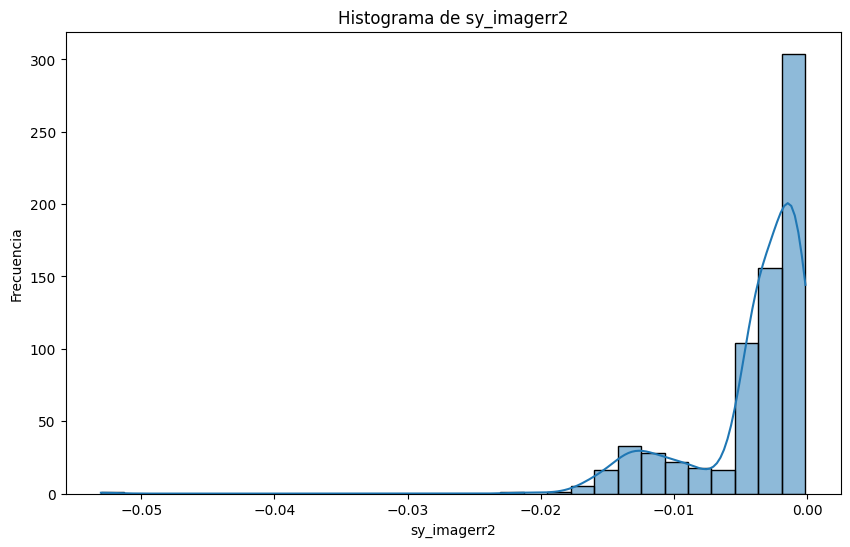

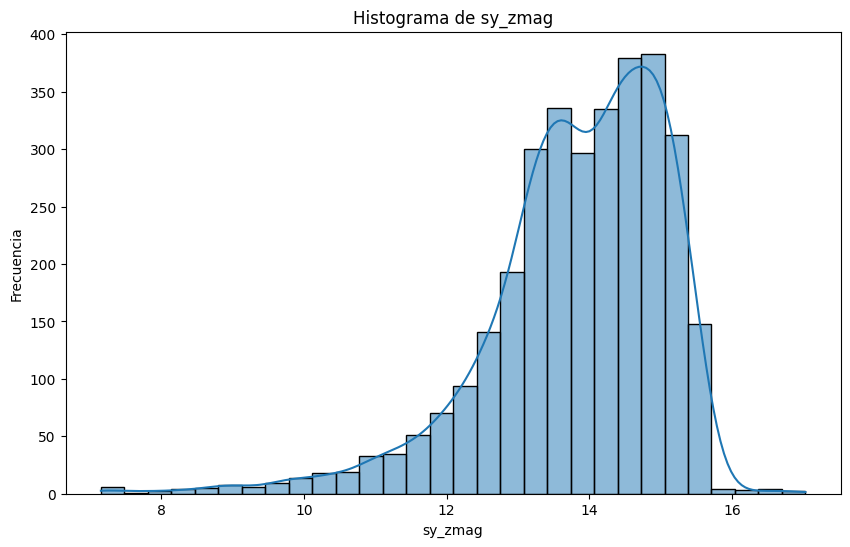

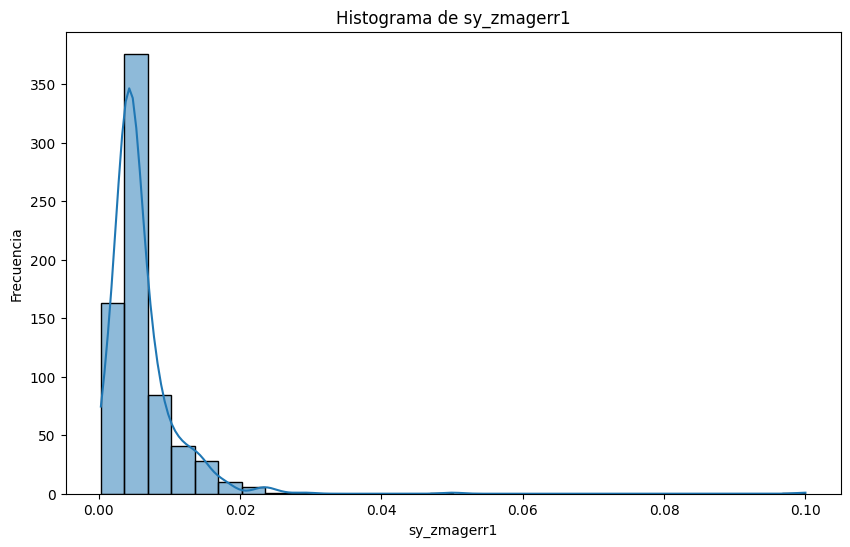

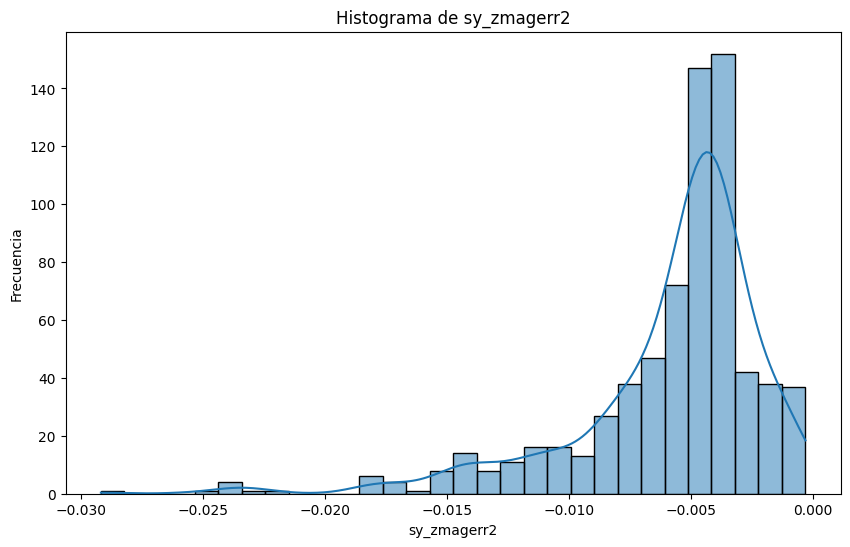

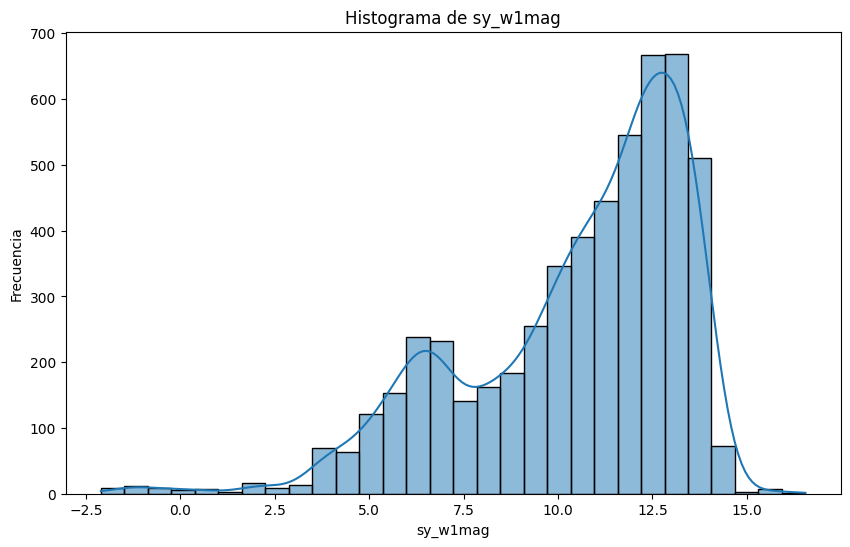

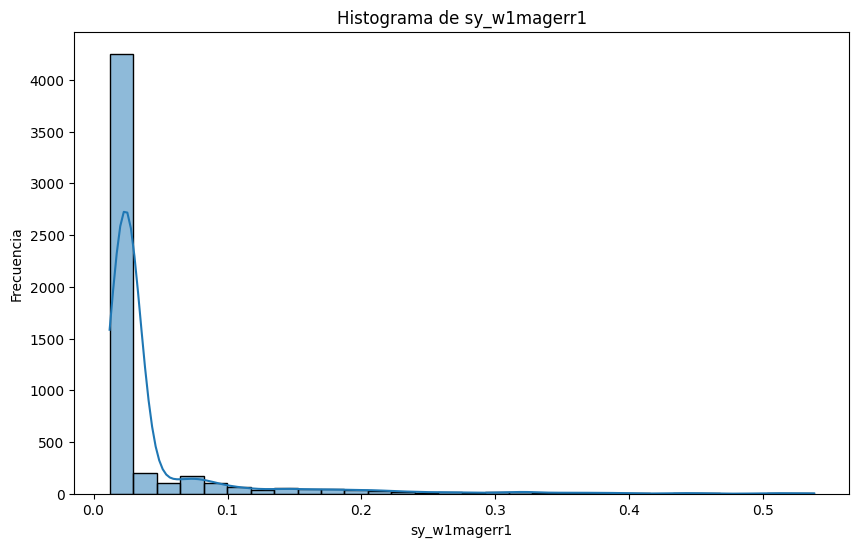

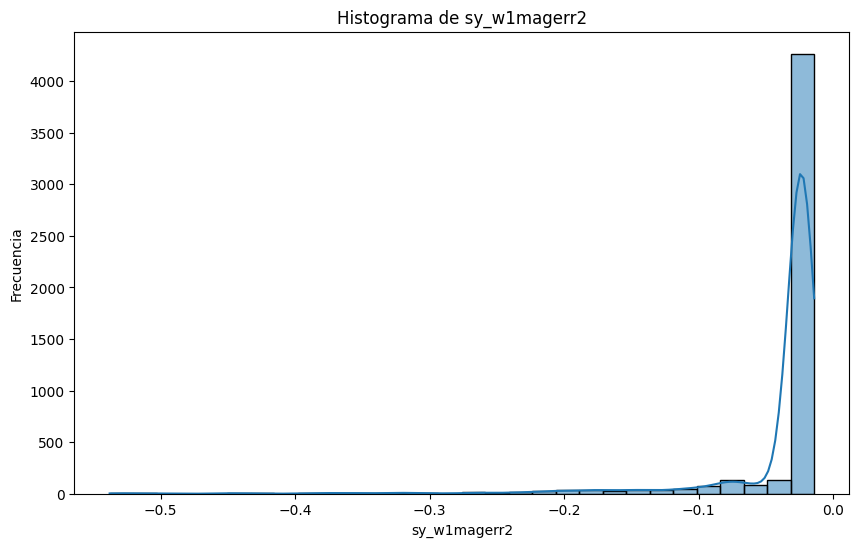

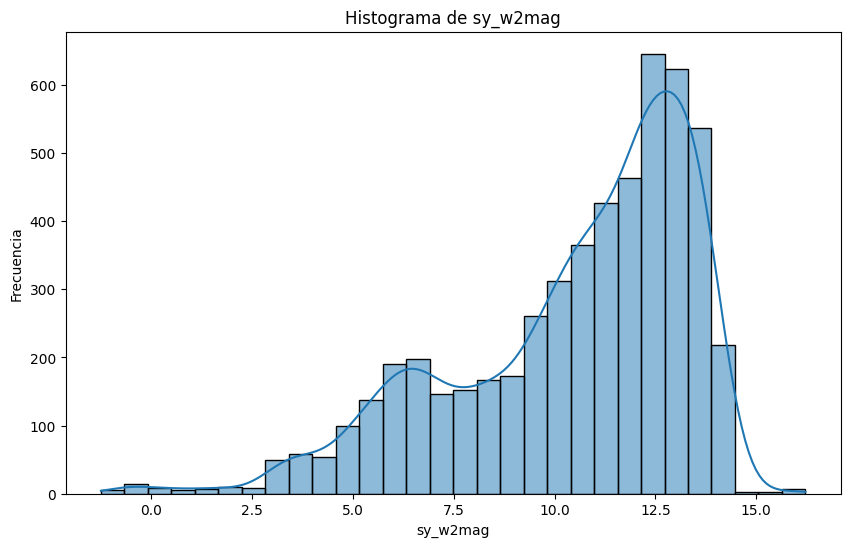

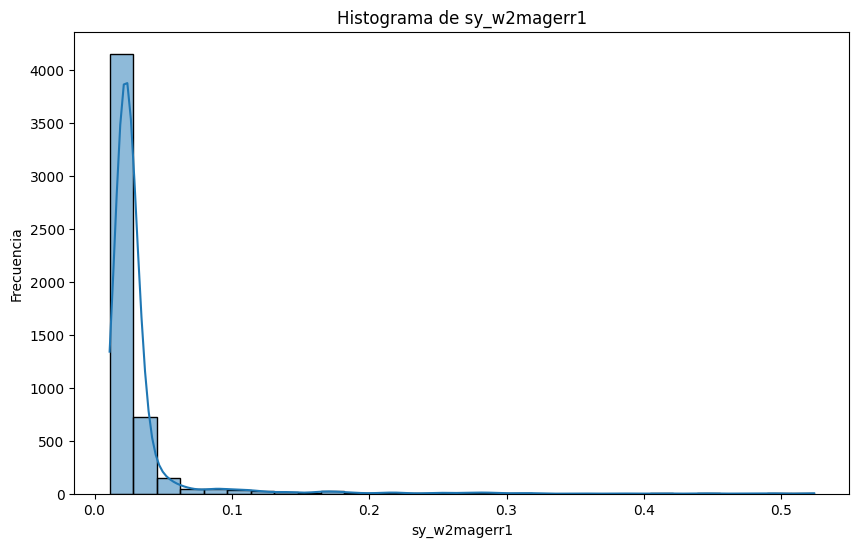

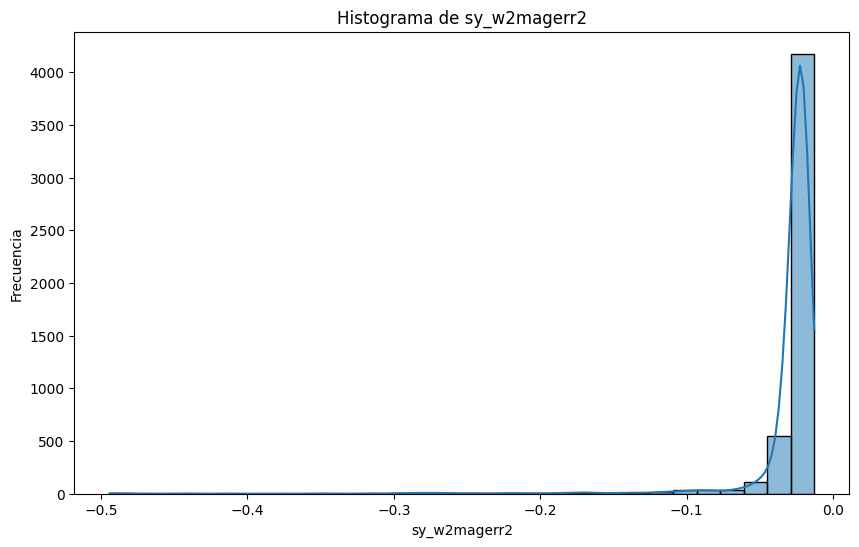

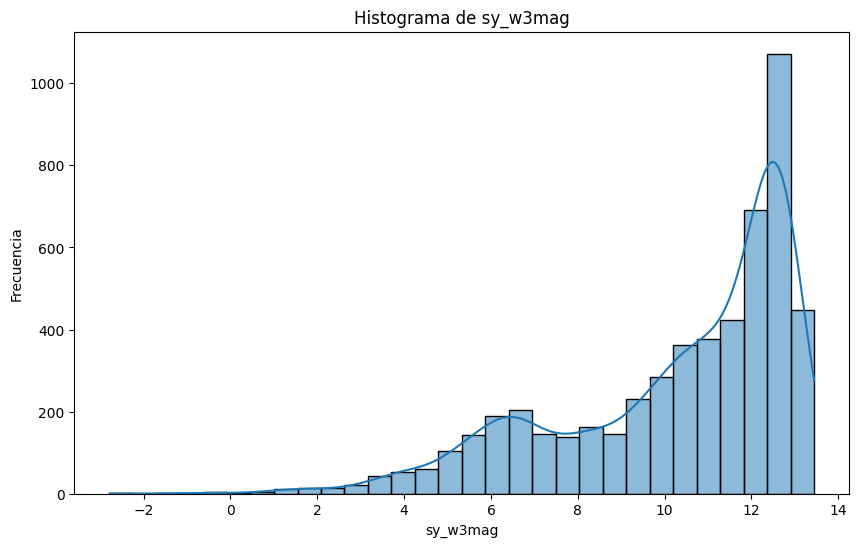

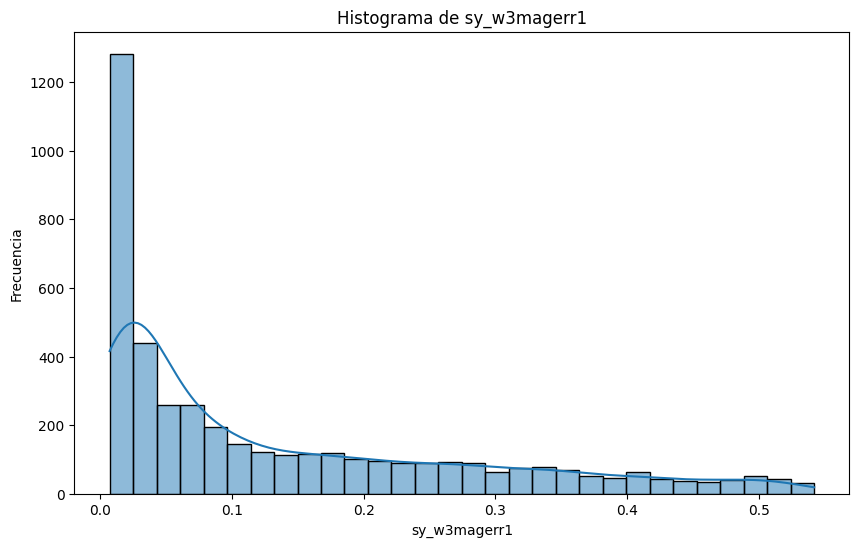

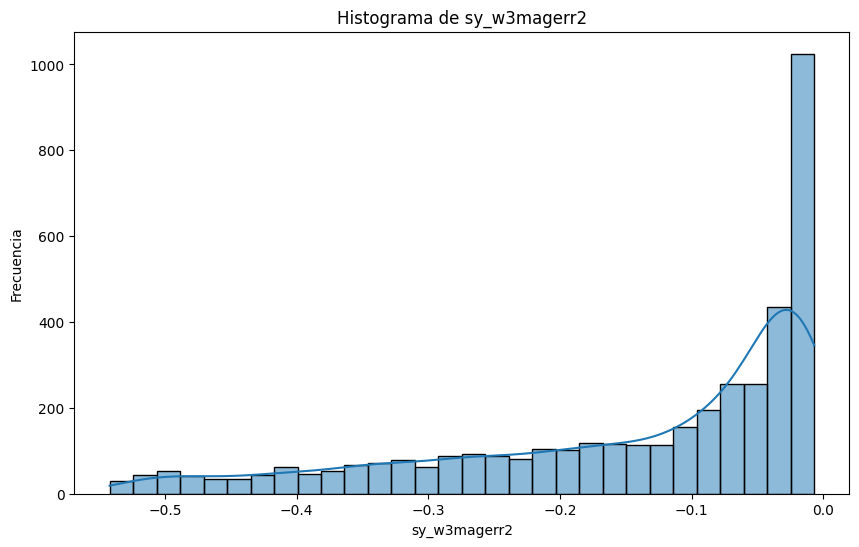

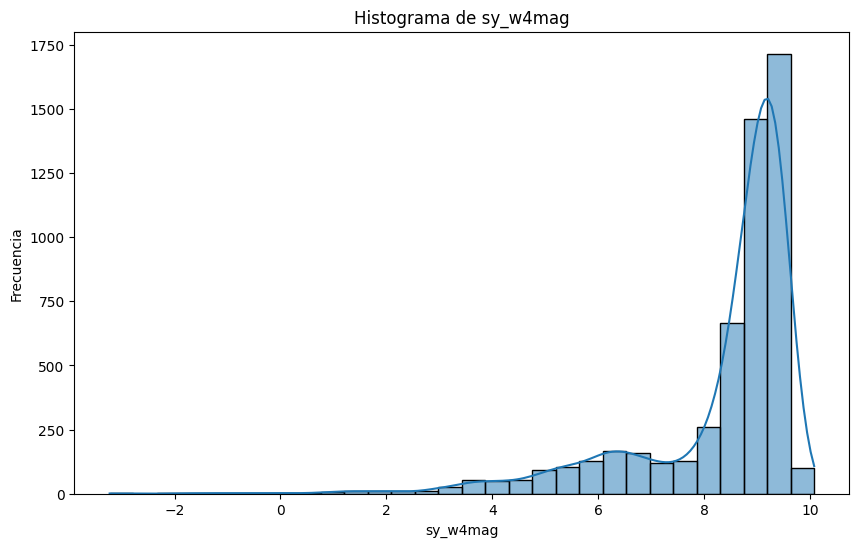

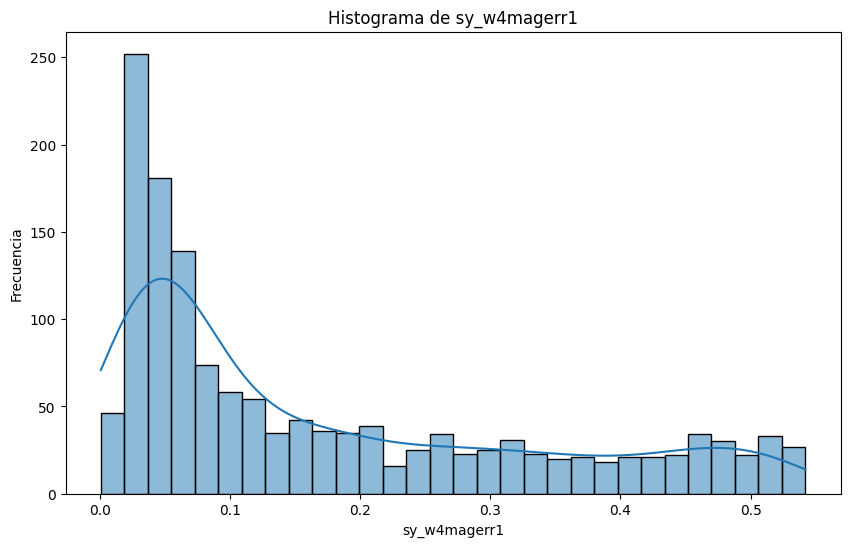

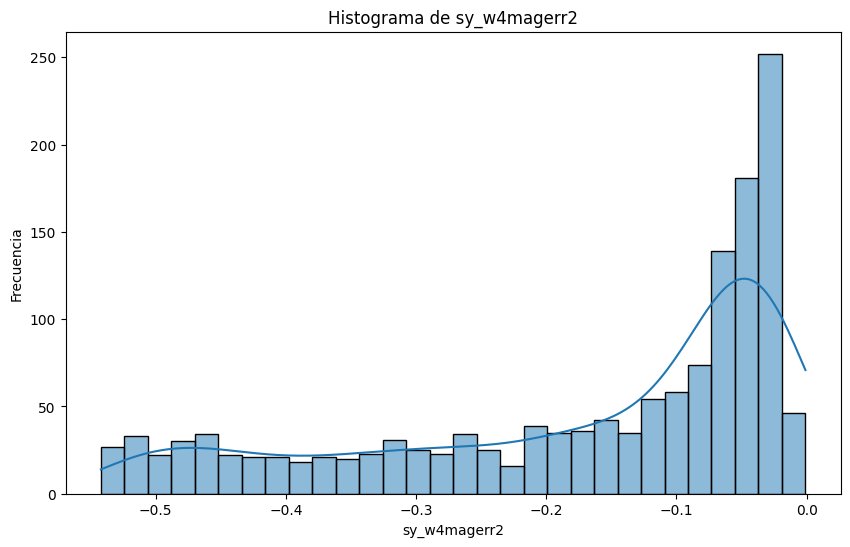

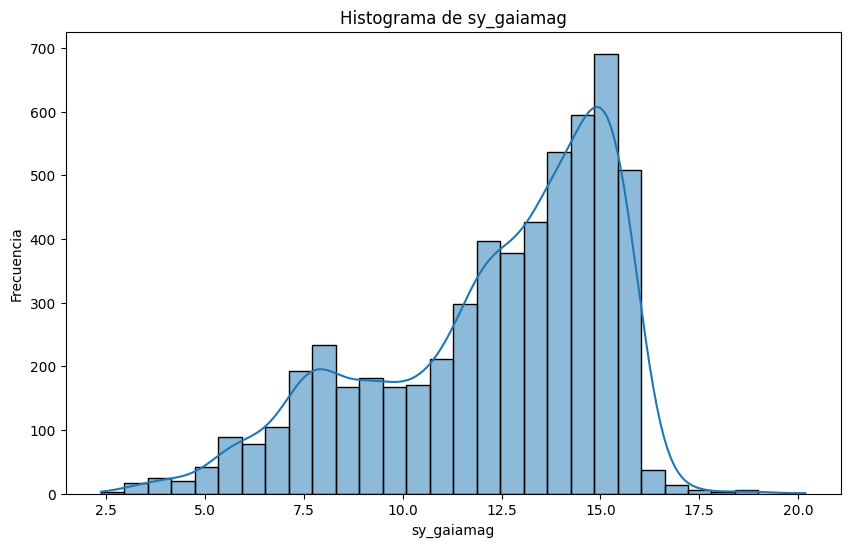

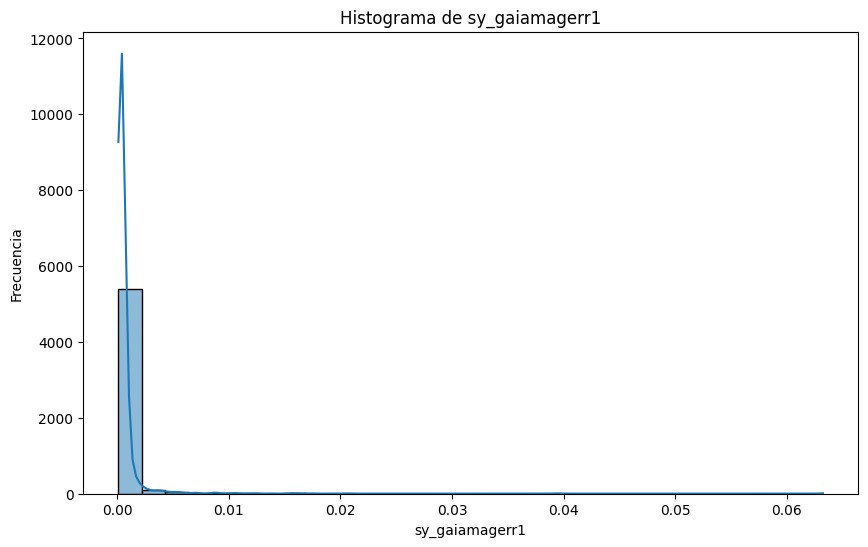

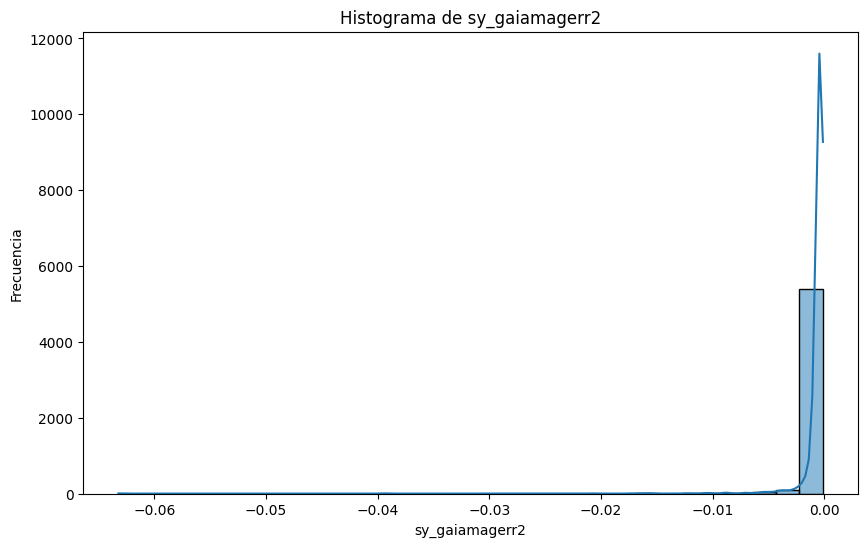

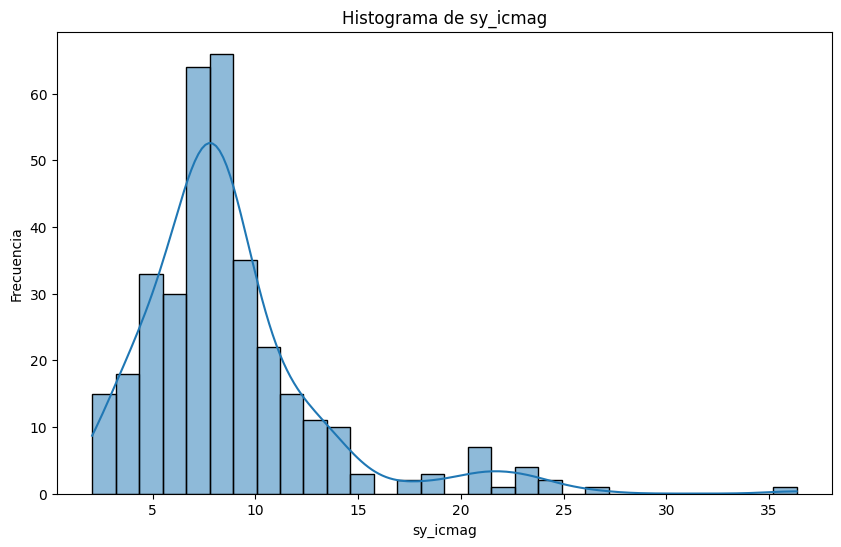

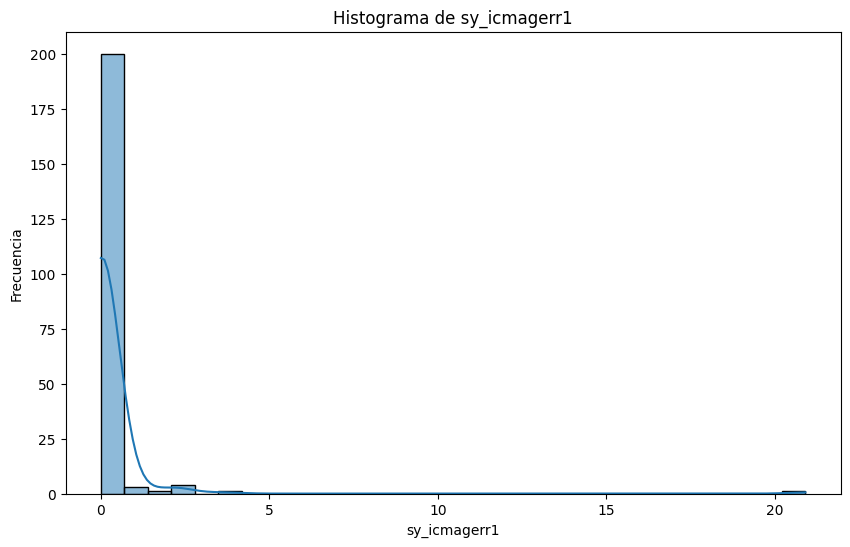

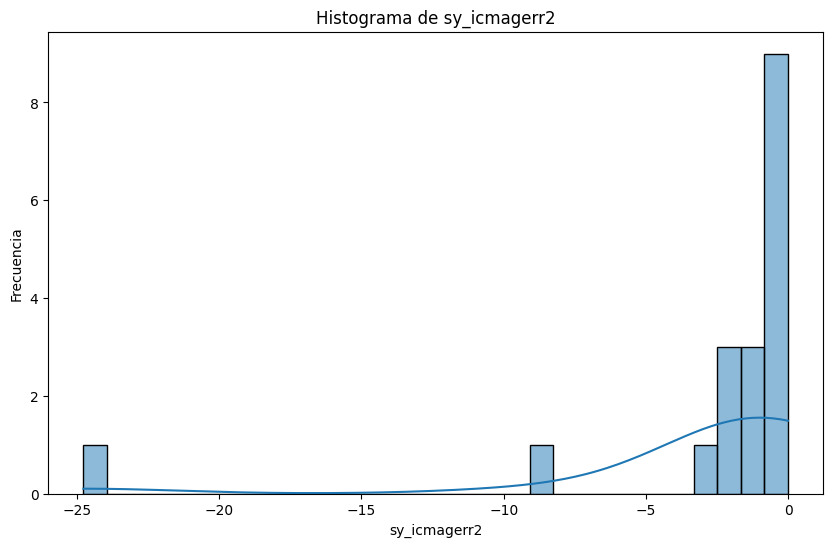

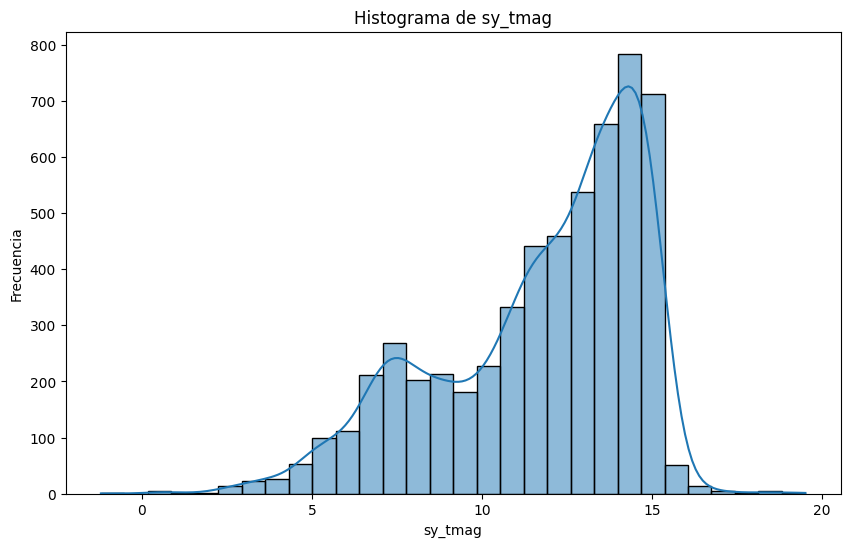

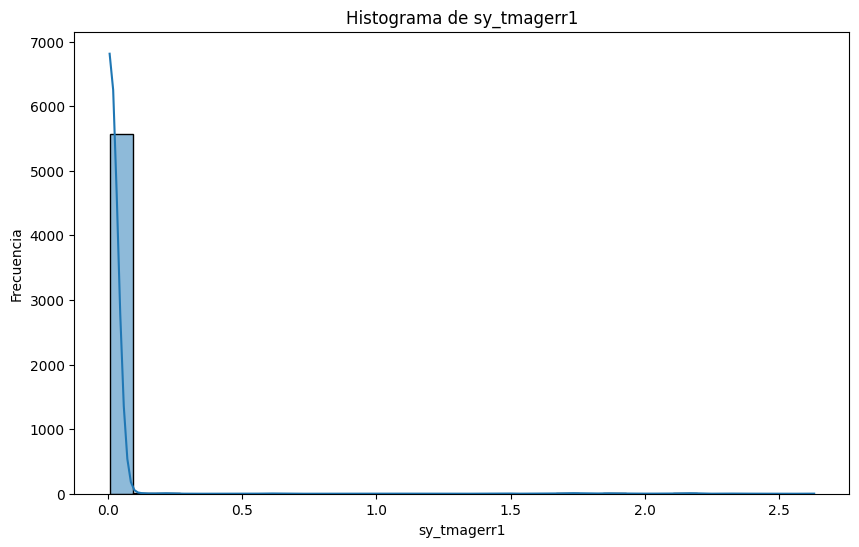

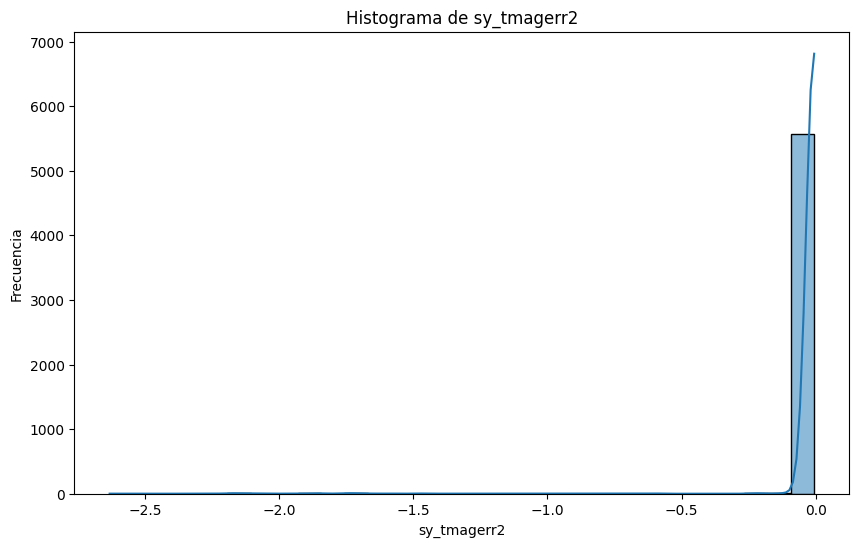

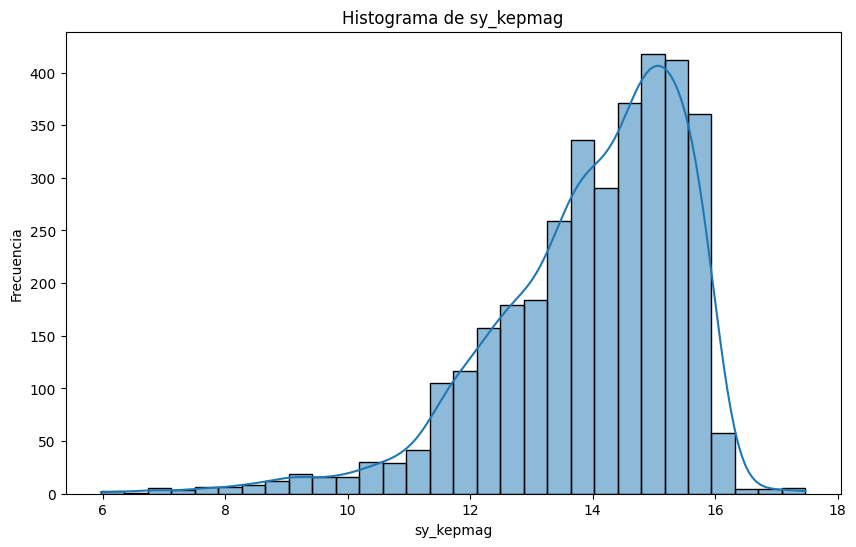

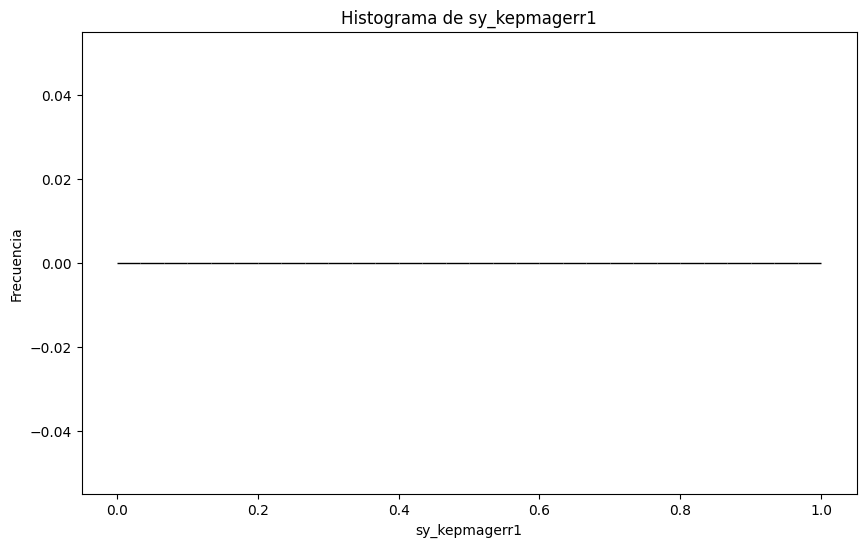

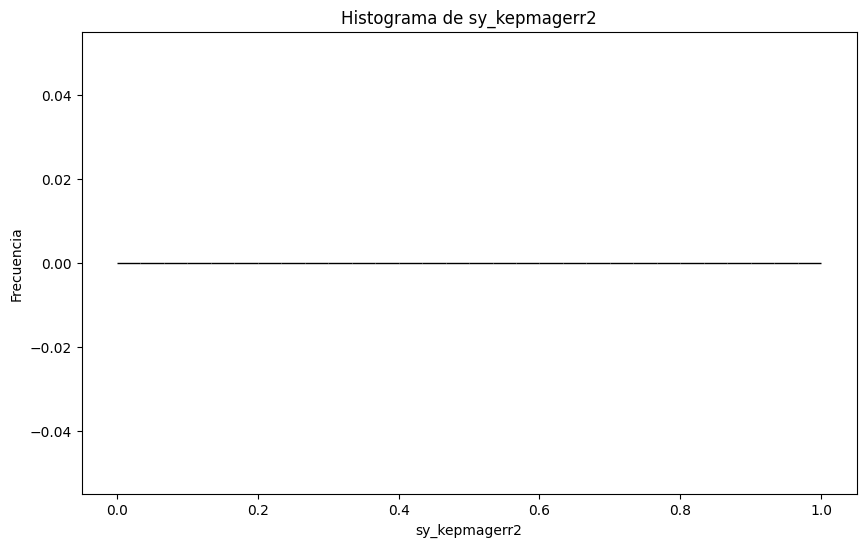

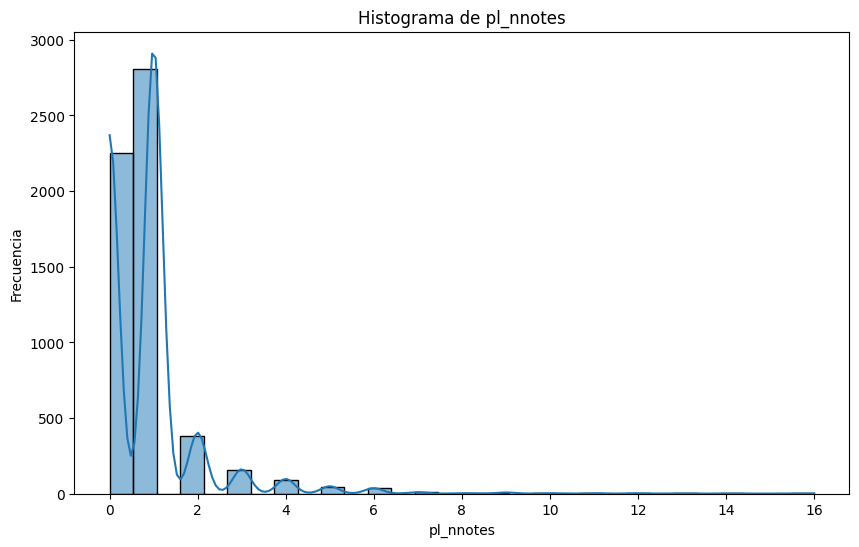

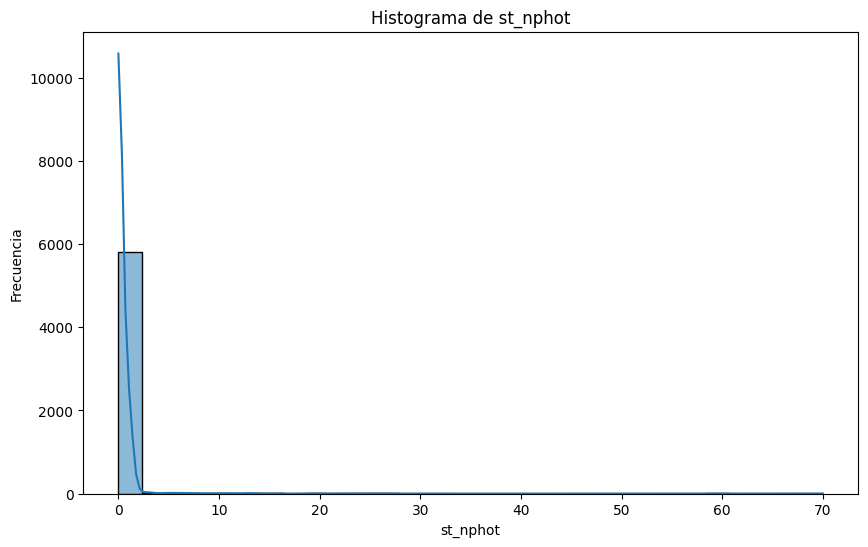

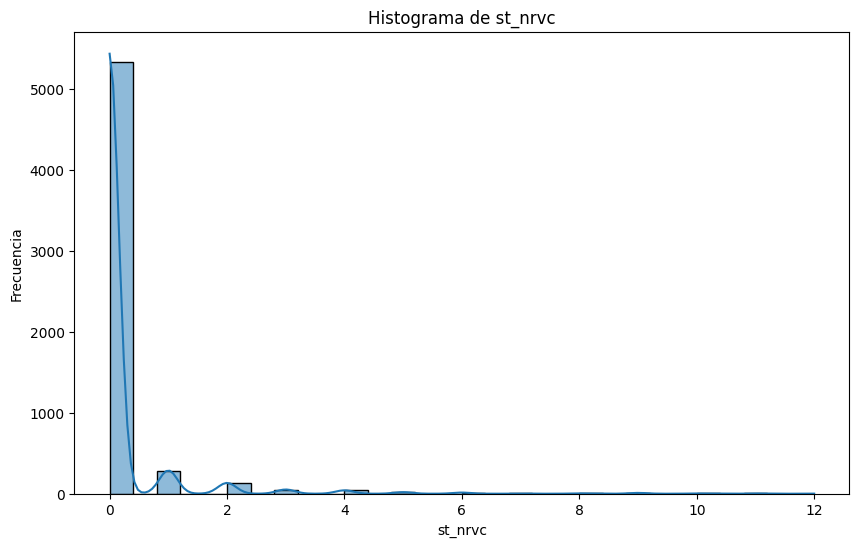

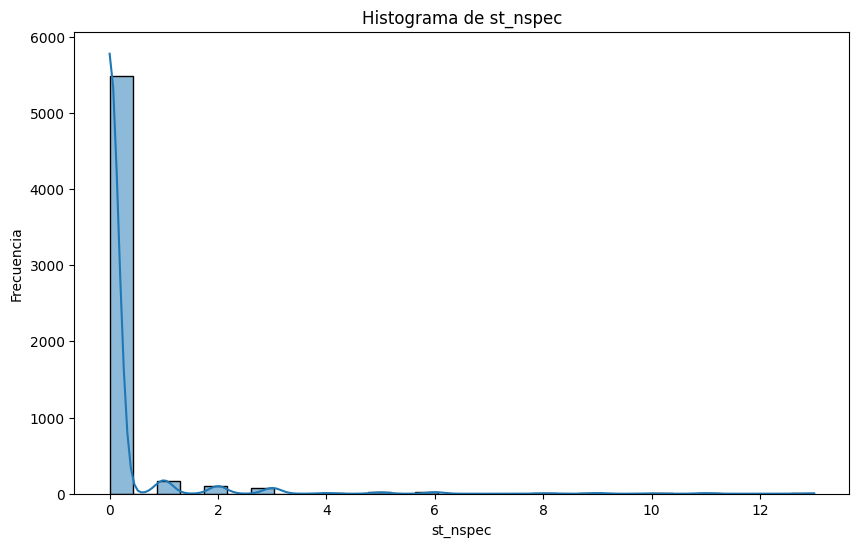

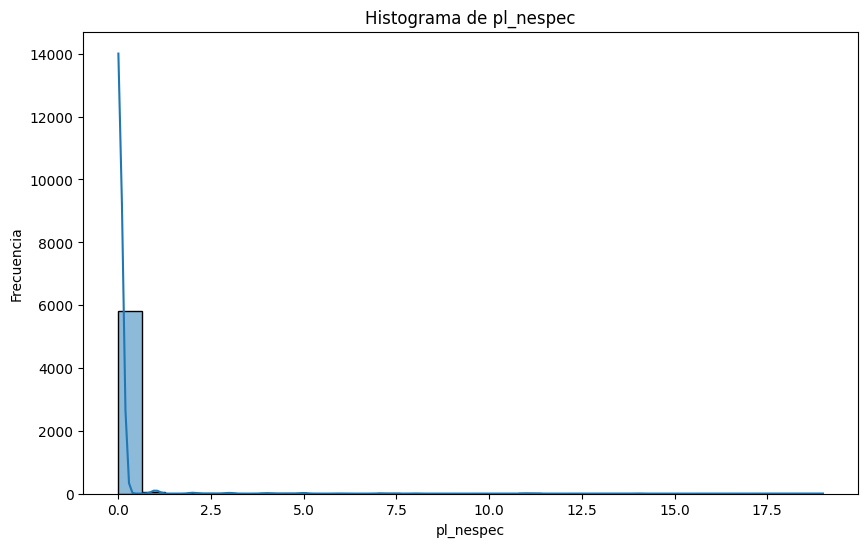

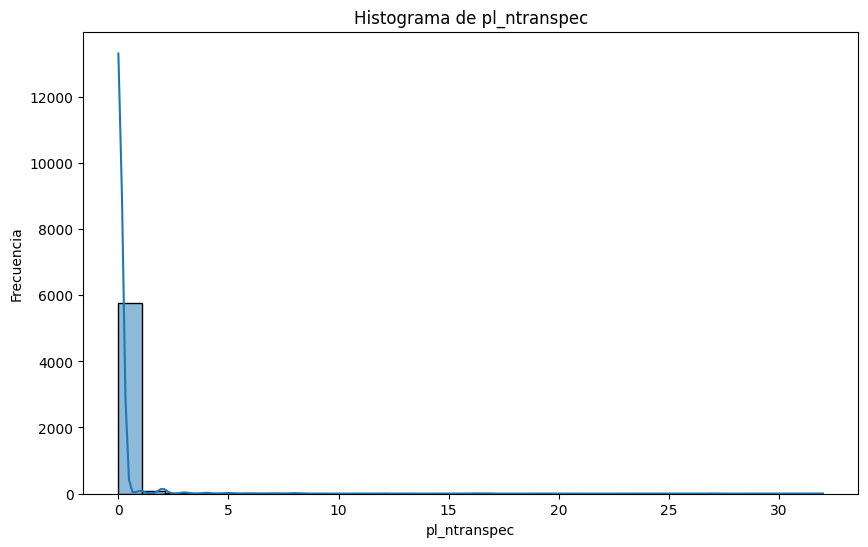

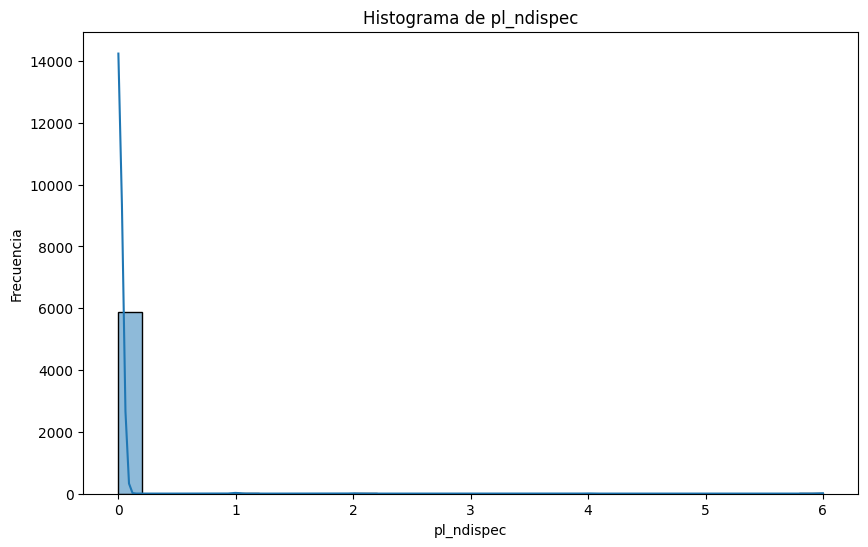

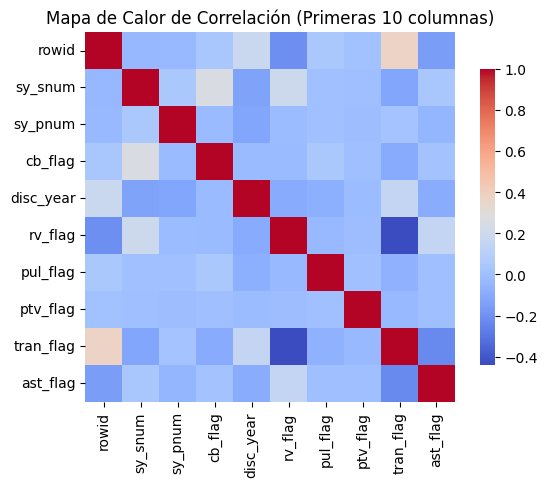

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer CSV saltando 322 filas
df = pd.read_csv('06_dataset.csv', skiprows=322)

#Elimina filas nulas 
df = df.loc[:, (df != 0).any(axis=0)]
# Solo numéricos
df_num = df.select_dtypes(include=[np.number])

display(df_num.head())
print("Tamaño del dataframe:", df_num.shape)

# Caracteristicas numéricas del dataset
display(df_num.describe().T)


df_short = df_num.iloc[:, :10]  # Primeras 10 columnas

display(df_short)
# Histograma
for col in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_num[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Heatmap, debido a la cantidad de columnas, se muestra solo una parte

df_short = df_num.iloc[:, :10]  # DataFrame con primeras 10 columnas en el DF original 
df_corr = df_short.corr()

sns.heatmap(df_corr, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de Correlación (Primeras 10 columnas)')
plt.show()
